In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder
dens = os.listdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/Align_press_CoM')
try:
    dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres = os.listdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/Interpart_press')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/BubComp2')
try:
    pres2.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres3 = os.listdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/PhaseComp2')
try:
    pres3.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres4 = os.listdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/radial')
try:
    pres4.remove('.DS_Store')
except:
    print(".DS_Store not in directory")    
    
# Grab the MCS data
pres5 = os.listdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/lat')
try:
    pres5.remove('.DS_Store')
except:
    print(".DS_Store not in directory")    
    

/Users/nicklauersdorf/klotsa/ABPs/post_proc/Jupyter
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/Align_press_CoM')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0     0.0  5.016308       16910  2972.876099    982.794344   1990.081755
1     0.1  5.016308       16792  2566.980399    813.236404   1753.743994
2     0.2  5.016308       16980  1958.738537    610.605248   1348.133289
3     0.3  5.016308       17342  1535.432674    464.180409   1071.252265
4     0.4  5.016308       17644  1191.271251    358.274619    832.996632
..    ...       ...         ...          ...           ...           ...
994  99.4  5.016308       23365   261.038031      0.584445    260.453586
995  99.5  5.016308       23341   279.449975     17.487966    261.962008
996  99.6  5.016308       23384   306.146907     29.403563    276.743344
997  99.7  5.016308       23576   262.381695     14.818778    247.562917
998  99.8  5.016308       23144   251.696701     13.426985    238.269716

[999 rows x 6 columns]

In [5]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  100  50.0  1.0  60.0   0.000001
1   0   50  150  50.0  1.0  60.0   0.000001
2   0   50  200  50.0  1.0  60.0   0.000001
3   0   50  250  50.0  1.0  60.0   0.000001
4   0   50  350  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
22  0  250  450  50.0  1.0  60.0   0.000001
23  0  250  250  50.0  1.0  60.0   0.000001
24  0  350  450  50.0  1.0  60.0   0.000001
25  0  350  350  50.0  1.0  60.0   0.000001
26  0  450  450  50.0  1.0  60.0   0.000001

[27 rows x 7 columns]

In [6]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0     0.0  5.016308       16910  2972.876099    982.794344   1990.081755
1     0.1  5.016308       16792  2566.980399    813.236404   1753.743994
2     0.2  5.016308       16980  1958.738537    610.605248   1348.133289
3     0.3  5.016308       17342  1535.432674    464.180409   1071.252265
4     0.4  5.016308       17644  1191.271251    358.274619    832.996632
..    ...       ...         ...          ...           ...           ...
994  99.4  5.016308       23365   261.038031      0.584445    260.453586
995  99.5  5.016308       23341   279.449975     17.487966    261.962008
996  99.6  5.016308       23384   306.146907     29.403563    276.743344
997  99.7  5.016308       23576   262.381695     14.818778    247.562917
998  99.8  5.016308       23144   251.696701     13.426985    238.269716

[999 rows x 6 columns]

5.016308
16910


In [7]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/Interpart_press')
for i in pres:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

Timestep    gasArea    gasSigXX  gasSigXY  gasSigYX    gasSigYY  \
0         0.0  38074.198    2787.258   -15.281   -15.281    2655.332   
1         0.1  44440.220   82725.638  3478.630  3478.630   78766.971   
2         0.2  43573.973   59630.574  -912.580  -912.580   62658.976   
3         0.3  42907.141   53716.100  4849.500  4849.500   53927.399   
4         0.4  42222.527   62334.110  1491.124  1491.124   71254.617   
..        ...        ...         ...       ...       ...         ...   
995      99.5  41348.660  204121.848  -314.618  -314.618  207056.351   
996      99.6  41343.579  236354.923 -5874.142 -5874.142  234281.748   
997      99.7  41645.877  248952.384 -2226.072 -2226.072  245703.071   
998      99.8  41769.082  241817.189 -1770.017 -1770.017  243029.985   
999      99.9  42048.516  278423.374 -5877.172 -5877.172  284014.438   

       gasTrace   bulkArea     bulkSigXX    bulkSigXY    bulkSigYX  \
0      2706.014  25057.639  7.126121e+07     7803.929     7803.929   
1     84224.935  18850.386  4.888558e+08  -483915.062  -483915.062   
2     60232.195  19590.887  4.101972e+08   464662.105   464662.105   
3     58671.250  20250.098  3.315763e+08  2106511.159  2106511.159   
4     68285.487  20789.914  2.705703e+08  1715026.362  1715026.362   
..          ...        ...           ...          ...          ...   
995  205274.482  21240.820  1.360596e+08   269912.606   269912.606   
996  229444.193  21140.477  1.352674e+08    49171.528    49171.528   
997  245101.656  21060.457  1.358593e+08   746301.206   746301.206   
998  240653.571  20906.769  1.393873e+08   -27844.585   -27844.585   
999  275341.734  20670.520  1.405391e+08  -323850.400  -323850.400   

        bulkSigYY     bulkTrace  Length  NDense  
0    7.122899e+07  7.125291e+07   530.8   45735  
1    4.912737e+08  4.895808e+08   489.1   46064  
2    4.105237e+08  4.108251e+08   515.0   46455  
3    3.364872e+08  3.361383e+08   515.0   46539  
4    2.745611e+08  2.742808e+08   566.9   46422  
..            ...           ...     ...     ...  
995  1.339763e+08  1.352879e+08   667.2   43528  
996  1.337399e+08  1.345528e+08   701.0   43360  
997  1.371588e+08  1.372554e+08   637.9   43132  
998  1.375896e+08  1.384606e+08   652.5   42921  
999  1.397105e+08  1.398010e+08   641.3   42661  

[1000 rows x 15 columns]

In [8]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  100  50.0  1.0  60.0   0.000001
1   0   50  150  50.0  1.0  60.0   0.000001
2   0   50  200  50.0  1.0  60.0   0.000001
3   0   50  250  50.0  1.0  60.0   0.000001
4   0   50  350  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
22  0  250  250  50.0  1.0  60.0   0.000001
23  0  250  450  50.0  1.0  60.0   0.000001
24  0  350  350  50.0  1.0  60.0   0.000001
25  0  350  450  50.0  1.0  60.0   0.000001
26  0  450  450  50.0  1.0  60.0   0.000001

[27 rows x 7 columns]

In [9]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres)):
    # Ger rid of NaN in favor of 0
    all_pres[i].fillna(0, inplace=True)

headers=list(all_pres[0])
display(all_pres[0])
print(all_pres[0][headers[1]][0])
print(all_pres[0][headers[2]][0])

Timestep    gasArea     gasSigXX   gasSigXY   gasSigYX     gasSigYY  \
0         0.0  52355.832   246037.594    251.171    251.171   249224.997   
1         0.1  53924.475  1628706.123   -386.732   -386.732  1642320.769   
2         0.2  54178.506  1652095.410  -1097.992  -1097.992  1660369.218   
3         0.3  53829.213  1647216.303 -12446.088 -12446.088  1654966.935   
4         0.4  53399.901  1664046.127  -2398.500  -2398.500  1646495.046   
..        ...        ...          ...        ...        ...          ...   
995      99.5  46063.479  1163294.102  -5895.874  -5895.874  1196037.883   
996      99.6  46030.455  1178830.020   4963.619   4963.619  1178476.604   
997      99.7  45803.097  1151975.652  -2067.782  -2067.782  1153628.562   
998      99.8  46408.962  1223602.261   1801.089   1801.089  1223614.287   
999      99.9  46130.798  1176405.510   4597.108   4597.108  1179256.017   

        gasTrace   bulkArea     bulkSigXX   bulkSigXY   bulkSigYX  \
0     247882.466  11338.683  5.281350e+06    1199.537    1199.537   
1    1635126.714   9871.653  1.621873e+07  265800.392  265800.392   
2    1655134.321   9561.735  2.150412e+07  388196.273  388196.273   
3    1638645.531   9820.847  2.085475e+07  279365.861  279365.861   
4    1652872.087  10161.248  1.854722e+07  166949.115  166949.115   
..           ...        ...           ...         ...         ...   
995  1173770.118  14843.044  8.323441e+06   44409.825   44409.825   
996  1183616.930  14849.394  8.352238e+06   73868.490   73868.490   
997  1150734.325  14952.277  8.322590e+06   72076.795   72076.795   
998  1225409.363  14897.660  8.207329e+06   74060.523   74060.523   
999  1182427.871  14882.418  8.058548e+06   51822.885   51822.885   

        bulkSigYY     bulkTrace  Length  NDense  
0    5.277936e+06  5.280843e+06   404.6   16910  
1    1.639661e+07  1.657347e+07   384.3   16792  
2    2.113883e+07  2.170967e+07   404.6   16980  
3    1.978228e+07  2.059788e+07   421.5   17342  
4    1.765897e+07  1.827004e+07   451.9   17644  
..            ...           ...     ...     ...  
995  8.220060e+06  8.316160e+06  1183.4   23341  
996  8.261318e+06  8.380647e+06  1164.2   23384  
997  8.393053e+06  8.429898e+06  1171.0   23576  
998  8.265858e+06  8.310654e+06  1058.3   23144  
999  8.116030e+06  8.139112e+06  1121.4   23336  

[1000 rows x 15 columns]

52355.832
246037.59399999998


In [10]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/BubComp2')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

tauB   sizeBin  clust_size  int_id  bub_id     Na     Nb     radius  \
0      0.0  5.016308       45735       1       1  16223  14846  94.392267   
1      0.1  5.016308       46064       1       1  14781  14647  82.907511   
2      0.2  5.016308       46455       1       1  14660  14769  84.253851   
3      0.3  5.016308       46539       1       1  14660  14682  84.612220   
4      0.4  5.016308       46422       1       1  14314  14402  85.738819   
...    ...       ...         ...     ...     ...    ...    ...        ...   
1007  99.4  5.016308       43466       1       1   9761  10326  88.658694   
1008  99.5  5.016308       43528       1       1   8497   9098  87.428552   
1009  99.6  5.016308       43360       1       1   9313   9847  87.611881   
1010  99.7  5.016308       43132       2       2   9891  10365  88.391387   
1011  99.8  5.016308       42921       1       1   9600  10128  86.695504   

      radius_err      sa_ext      sa_int  edge_width  edge_width_err  \
0       2.019016  611.073930  399.379732   39.668981        4.365461   
1       1.602484  540.960020  318.932257   33.209792        2.295203   
2       1.243916  547.563091  329.397582   33.217342        1.878286   
3       1.278345  549.669599  338.257074   32.546097        2.001823   
4       1.313409  557.763196  351.810411   31.946385        1.971664   
...          ...         ...         ...         ...             ...   
1007    7.566793  629.269704  482.520788   22.382911        6.580395   
1008    7.620364  624.347783  508.846708   19.844535       11.919583   
1009    6.299283  626.208195  475.704788   21.636004       11.139413   
1010    5.118062  602.688799  475.476260   23.068702        7.391869   
1011    6.088051  591.686114  466.403001   21.258913        9.971141   

      edge_begin   edge_end  NBin  
0      54.723285  94.392267   860  
1      49.697718  82.907511   657  
2      51.036508  84.253851   671  
3      52.066122  84.612220   665  
4      53.792434  85.738819   672  
...          ...        ...   ...  
1007   66.275783  88.658694   584  
1008   69.527720  87.428552   510  
1009   66.483030  87.611881   546  
1010   65.322684  88.391387   583  
1011   65.479448  86.695504   544  

[1012 rows x 16 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 350.0, 350.0, 450.0], [100.0, 150.0, 200.0, 250.0, 350.0, 450.0, 50.0, 100.0, 150.0, 200.0, 250.0, 350.0, 450.0, 450.0, 350.0, 150.0, 200.0, 250.0, 200.0, 250.0, 350.0, 450.0, 250.0, 450.0, 350.0, 450.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0

In [11]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  100  50.0  1.0  60.0   0.000001
1   0   50  150  50.0  1.0  60.0   0.000001
2   0   50  200  50.0  1.0  60.0   0.000001
3   0   50  250  50.0  1.0  60.0   0.000001
4   0   50  350  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
22  0  250  250  50.0  1.0  60.0   0.000001
23  0  250  450  50.0  1.0  60.0   0.000001
24  0  350  350  50.0  1.0  60.0   0.000001
25  0  350  450  50.0  1.0  60.0   0.000001
26  0  450  450  50.0  1.0  60.0   0.000001

[27 rows x 7 columns]

In [12]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

tauB   sizeBin  clust_size  int_id  bub_id    Na     Nb     radius  \
0      0.0  5.016308       16910       1       1  8572   8338  67.561791   
1      0.1  5.016308       16792       1       1  7782   7819  61.351879   
2      0.2  5.016308       16980       1       1  7627   7879  60.953597   
3      0.3  5.016308       17342       1       1  8009   8189  63.974445   
4      0.4  5.016308       17644       1       1  8060   8229  64.718519   
...    ...       ...         ...     ...     ...   ...    ...        ...   
4671  99.8  5.016308       23144       6       6  8120  11132  78.811098   
4672  99.8  5.016308       23144       6      14   324    329   8.853145   
4673  99.8  5.016308       23144       6       3   292    295  13.659581   
4674  99.8  5.016308       23144       6      12   272    312  14.173457   
4675  99.8  5.016308       23144       6      16   235    255   0.000000   

      radius_err      sa_ext      sa_int  edge_width  edge_width_err  \
0      12.451707  428.952506   63.357012   58.679564       13.261668   
1       1.860355  415.016401  145.429728   38.999920        2.408536   
2       2.066479  407.624944  149.109974   37.760026        2.411984   
3       2.650589  436.397096  155.481468   39.933234        3.249127   
4       2.856458  459.742789  166.852658   39.075418        2.986058   
...          ...         ...         ...         ...             ...   
4671   12.368967  301.240514  336.128553   33.116340       12.305203   
4672    1.280234   57.821370    0.000000    0.000000        0.000000   
4673    3.948496  108.897609    0.000000    0.000000        0.000000   
4674    4.660822  110.043896    0.000000    0.000000        0.000000   
4675    0.000000    0.000000    0.000000    0.000000        0.000000   

      edge_begin   edge_end  NBin  
0       8.882226  67.561791   554  
1      22.351959  61.351879   476  
2      23.193571  60.953597   467  
3      24.041211  63.974445   513  
4      25.643101  64.718519   519  
...          ...        ...   ...  
4671   45.714454  78.811098   715  
4672    0.000000   0.000000    39  
4673    0.000000   0.000000    41  
4674    0.000000   0.000000    40  
4675    0.000000   0.000000    37  

[4676 rows x 16 columns]

5.016308
16910


In [13]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new2 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/PhaseComp2')
for i in pres3:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new2.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new2[-1])
print(storeVals)

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  Nb_gas  \
0     0.0  5.016308       45735     6906     8151        330    1871    2003   
1     0.1  5.016308       46064     8432     8470        271    1787    1883   
2     0.2  5.016308       46455     8779     8642        287    1561    1589   
3     0.3  5.016308       46539     8778     8757        299    1562    1561   
4     0.4  5.016308       46422     9092     8998        319    1594    1600   
..    ...       ...         ...      ...      ...        ...     ...     ...   
994  99.4  5.016308       43466    12467    11606        480    2772    3068   
995  99.5  5.016308       43528    13665    12826        530    2838    3076   
996  99.6  5.016308       43360    12814    12019        496    2873    3134   
997  99.7  5.016308       43132    12169    11415        469    2940    3220   
998  99.8  5.016308       42921    12307    11488        472    3093    3384   

     NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0        1411   16223   14846       860       0       0         0  
1        1673   14781   14647       657       0       0         0  
2        1643   14660   14769       671       0       0         0  
3        1637   14660   14682       665       0       0         0  
4        1610   14314   14402       672       0       0         0  
..        ...     ...     ...       ...     ...     ...       ...  
994      1537    9761   10326       584       0       0         0  
995      1561    8497    9098       510       0       0         0  
996      1559    9313    9847       546       0       0         0  
997      1549    9891   10365       583       0       0         0  
998      1585    9600   10128       544       0       0         0  

[999 rows x 15 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 350.0, 350.0, 450.0], [100.0, 150.0, 200.0, 250.0, 350.0, 450.0, 50.0, 100.0, 150.0, 200.0, 250.0, 350.0, 450.0, 350.0, 450.0, 250.0, 150.0, 200.0, 450.0, 200.0, 250.0, 350.0, 450.0, 250.0, 450.0, 350.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0

In [14]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4 = params4.append(df, ignore_index = True)
display(params4)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  100  50.0  1.0  60.0   0.000001
1   0   50  150  50.0  1.0  60.0   0.000001
2   0   50  200  50.0  1.0  60.0   0.000001
3   0   50  250  50.0  1.0  60.0   0.000001
4   0   50  350  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
22  0  250  450  50.0  1.0  60.0   0.000001
23  0  250  250  50.0  1.0  60.0   0.000001
24  0  350  450  50.0  1.0  60.0   0.000001
25  0  350  350  50.0  1.0  60.0   0.000001
26  0  450  450  50.0  1.0  60.0   0.000001

[27 rows x 7 columns]

In [15]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new2)):
    # Ger rid of NaN in favor of 0
    all_pres_new2[i].fillna(0, inplace=True)

headers=list(all_pres_new2[0])
display(all_pres_new2[0])
print(all_pres_new2[0][headers[1]][0])
print(all_pres_new2[0][headers[2]][0])

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  Nb_gas  \
0     0.0  5.016308       16910      183      461         18   16245   16201   
1     0.1  5.016308       16792     1045      962         47   16173   16219   
2     0.2  5.016308       16980     1261     1049         51   16112   16072   
3     0.3  5.016308       17342     1299     1186         55   15692   15625   
4     0.4  5.016308       17644     1402     1375         63   15538   15396   
..    ...       ...         ...      ...      ...        ...     ...     ...   
994  99.4  5.016308       23365     4497     1287        159    8897    8684   
995  99.5  5.016308       23341     3429      714        113    8549    8283   
996  99.6  5.016308       23384     5259     1560        187    9456    9244   
997  99.7  5.016308       23576     5736     2069        214   10988   10776   
998  99.8  5.016308       23144     4549     1824        175   10455   10122   

     NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0        2029    8572    8338       554       0       0         0  
1        2078    7782    7819       476       0       0         0  
2        2083    7627    7879       467       0       0         0  
3        2033    8009    8189       513       0       0         0  
4        2019    8060    8229       519       0       0         0  
..        ...     ...     ...       ...     ...     ...       ...  
994      1249    9083   13054       918    2523    1975       275  
995      1212   10239   13127       898    2783    2876       378  
996      1322    8804   12675       891    1481    1521       201  
997      1538    7295   11162       717     981     993       132  
998      1454    8120   11132       715    1876    1922       257  

[999 rows x 15 columns]

5.016308
16910


In [16]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres4:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres4, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new3 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/radial')
for i in pres4:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new3.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new3[-1])
print(storeVals)

tauB   sizeBin  clust_size  interface_id  bub_id       r_min  \
0       0.0  5.016308           2             1       0    0.000000   
1       0.0  5.016308           2             1       0    3.045615   
2       0.0  5.016308           2             1       0    6.091230   
3       0.0  5.016308           2             1       0    9.136846   
4       0.0  5.016308           2             1       0   12.182461   
...     ...       ...         ...           ...     ...         ...   
41953  99.8  5.016308          10             1       0  112.687764   
41954  99.8  5.016308          10             1       0  115.733379   
41955  99.8  5.016308          10             1       0  118.778994   
41956  99.8  5.016308          10             1       0  121.824610   
41957  99.8  5.016308          10             1       0  124.870225   

            r_max     align    alignA    alignB  num_dens  num_densA  \
0        3.045615 -0.031827 -0.134630  0.091536  1.887395   1.029488   
1        6.091230 -0.026220 -0.024516 -0.028013  1.784446   0.915100   
2        9.136846 -0.038147 -0.004259 -0.073077  1.811899   0.919676   
3       12.182461 -0.021461  0.005728 -0.049242  1.823665   0.921637   
4       15.228076  0.002568  0.028038 -0.023237  1.750130   0.880784   
...           ...       ...       ...       ...       ...        ...   
41953  115.733379 -0.040096 -0.123105  0.033260  0.148246   0.069548   
41954  118.778994  0.003338  0.000521  0.006548  0.164005   0.087351   
41955  121.824610  0.021990 -0.001972  0.047206  0.153337   0.078623   
41956  124.870225 -0.048398 -0.047908 -0.048909  0.170310   0.086850   
41957  127.915840 -0.000003  0.008070 -0.006429  0.145534   0.064498   

       num_densB      press     pressA     pressB  
0       0.857907 -27.031849 -62.369948  35.338099  
1       0.869345 -21.054505 -10.095604 -10.958901  
2       0.892223 -31.102943  -1.762522 -29.340421  
3       0.902028 -17.612317   2.375732 -19.988049  
4       0.869345   2.022490  11.112943  -9.090452  
...          ...        ...        ...        ...  
41953   0.078699  -2.674852  -3.852734   1.177882  
41954   0.076655   0.246369   0.020489   0.225880  
41955   0.074714   1.517321  -0.069788   1.587109  
41956   0.083461  -3.709219  -1.872344  -1.836875  
41957   0.081036  -0.000224   0.234221  -0.234445  

[41958 rows x 16 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 350.0, 350.0, 450.0], [100.0, 150.0, 200.0, 250.0, 350.0, 450.0, 50.0, 100.0, 150.0, 200.0, 250.0, 350.0, 450.0, 150.0, 200.0, 250.0, 350.0, 450.0, 200.0, 250.0, 350.0, 450.0, 250.0, 450.0, 350.0, 450.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0

In [17]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params5 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new3)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params5 = params5.append(df, ignore_index = True)
display(params5)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  100  50.0  1.0  60.0   0.000001
1   0   50  150  50.0  1.0  60.0   0.000001
2   0   50  200  50.0  1.0  60.0   0.000001
3   0   50  250  50.0  1.0  60.0   0.000001
4   0   50  350  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
22  0  250  250  50.0  1.0  60.0   0.000001
23  0  250  450  50.0  1.0  60.0   0.000001
24  0  350  350  50.0  1.0  60.0   0.000001
25  0  350  450  50.0  1.0  60.0   0.000001
26  0  450  450  50.0  1.0  60.0   0.000001

[27 rows x 7 columns]

In [18]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new3)):
    # Ger rid of NaN in favor of 0
    all_pres_new3[i].fillna(0, inplace=True)

headers=list(all_pres_new3[0])
display(all_pres_new3[0])
print(all_pres_new3[0][headers[1]][0])
print(all_pres_new3[0][headers[2]][0])

tauB   sizeBin  clust_size  interface_id  bub_id       r_min  \
0       0.0  5.016308           5             1       0    0.000000   
1       0.0  5.016308           5             1       0    3.045615   
2       0.0  5.016308           5             1       0    6.091230   
3       0.0  5.016308           5             1       0    9.136846   
4       0.0  5.016308           5             1       0   12.182461   
...     ...       ...         ...           ...     ...         ...   
41953  99.8  5.016308         185             6      16  112.687764   
41954  99.8  5.016308         185             6      16  115.733379   
41955  99.8  5.016308         185             6      16  118.778994   
41956  99.8  5.016308         185             6      16  121.824610   
41957  99.8  5.016308         185             6      16  124.870225   

            r_max     align    alignA    alignB  num_dens  num_densA  \
0        3.045615  0.023449  0.110186 -0.078594  1.269702   0.686325   
1        6.091230  0.068735  0.016425  0.124476  1.441283   0.743519   
2        9.136846 -0.064602 -0.057176 -0.072326  1.400104   0.713778   
3       12.182461  0.003646 -0.076697  0.086236  1.421674   0.720642   
4       15.228076 -0.009038  0.041490 -0.060109  1.426032   0.716829   
...           ...       ...       ...       ...       ...        ...   
41953  115.733379 -0.024150 -0.035510 -0.012442  0.546315   0.277275   
41954  118.778994 -0.036851 -0.030173 -0.043877  0.561539   0.287900   
41955  121.824610 -0.008017 -0.031652  0.016471  0.564264   0.287127   
41956  124.870225  0.020612  0.070156 -0.027772  0.572785   0.283003   
41957  127.915840  0.025995  0.032233  0.019513  0.558983   0.284866   

       num_densB     press    pressA    pressB  
0       0.583377 -0.803820  3.781163 -4.584984  
1       0.697764  9.296068  0.610609  8.685459  
2       0.686325 -7.004455 -2.040558 -4.963897  
3       0.701032  3.281903 -2.763545  6.045448  
4       0.709203 -2.775872  1.487063 -4.262935  
...          ...       ...       ...       ...  
41953   0.269040 -0.827052 -0.492302 -0.334751  
41954   0.273639 -1.634996 -0.434345 -1.200651  
41955   0.277136  0.002054 -0.454410  0.456464  
41956   0.289782  0.187933  0.992714 -0.804781  
41957   0.274117  0.993986  0.459111  0.534875  

[41958 rows x 16 columns]

5.016308
5


In [19]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres5:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres5, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new4 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/half_txt_files/lat')
for i in pres5:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new4.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new4[-1])
print(storeVals)

tauB   sizeBin  clust_size  lat_mean_bulk  lat_mean_int  lat_mean_bub  \
0     0.0  5.016308       44552       0.814635      0.858233           0.0   
1     0.1  5.016308       44821       0.614659      0.642480           0.0   
2     0.2  5.016308       45249       0.588089      0.638009           0.0   
3     0.3  5.016308       45585       0.597077      0.648564           0.0   
4     0.4  5.016308       45829       0.605979      0.659020           0.0   
..    ...       ...         ...            ...           ...           ...   
994  99.4  5.016308       43404       0.646797      0.710206           0.0   
995  99.5  5.016308       43236       0.647073      0.711930           0.0   
996  99.6  5.016308       43050       0.647067      0.711411           0.0   
997  99.7  5.016308       43020       0.647204      0.711916           0.0   
998  99.8  5.016308       42802       0.646386      0.707270           0.0   

     lat_mean_all  lat_std_bulk  lat_std_int  lat_std_bub  lat_std_all  
0        0.842185      0.002639     0.153080          0.0     0.123500  
1        0.632387      0.053284     0.181775          0.0     0.149209  
2        0.620007      0.018188     0.164600          0.0     0.134227  
3        0.629494      0.017906     0.159876          0.0     0.129731  
4        0.638089      0.018573     0.166546          0.0     0.132665  
..            ...           ...          ...          ...          ...  
994      0.674140      0.009354     0.199798          0.0     0.135090  
995      0.674811      0.009302     0.203009          0.0     0.136766  
996      0.675662      0.009933     0.202801          0.0     0.139121  
997      0.676036      0.010782     0.200149          0.0     0.137649  
998      0.673786      0.010343     0.186323          0.0     0.128840  

[999 rows x 11 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 250.0, 350.0], [100.0, 150.0, 200.0, 250.0, 350.0, 50.0, 100.0, 150.0, 200.0, 250.0, 350.0, 150.0, 200.0, 250.0, 350.0, 200.0, 250.0, 350.0, 250.0, 350.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06]]


In [20]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params6 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new4)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params6 = params6.append(df, ignore_index = True)
display(params6)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  100  50.0  1.0  60.0   0.000001
1   0   50  150  50.0  1.0  60.0   0.000001
2   0   50  200  50.0  1.0  60.0   0.000001
3   0   50  250  50.0  1.0  60.0   0.000001
4   0   50  350  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
15  0  200  200  50.0  1.0  60.0   0.000001
16  0  200  250  50.0  1.0  60.0   0.000001
17  0  200  350  50.0  1.0  60.0   0.000001
18  0  250  250  50.0  1.0  60.0   0.000001
19  0  350  350  50.0  1.0  60.0   0.000001

[20 rows x 7 columns]

In [21]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new4)):
    # Ger rid of NaN in favor of 0
    all_pres_new4[i].fillna(0, inplace=True)

headers=list(all_pres_new4[0])
display(all_pres_new4[0])
print(all_pres_new4[0][headers[1]][0])
print(all_pres_new4[0][headers[2]][0])

tauB   sizeBin  clust_size  lat_mean_bulk  lat_mean_int  lat_mean_bub  \
0     0.0  5.016308       16910       0.752177      0.795691      0.000000   
1     0.1  5.016308       16792       0.827383      0.889656      0.000000   
2     0.2  5.016308       16980       0.721045      0.753373      0.000000   
3     0.3  5.016308       17342       0.723315      0.766553      0.000000   
4     0.4  5.016308       17644       0.686877      0.761208      0.000000   
..    ...       ...         ...            ...           ...           ...   
994  99.4  5.016308       23365       0.737313      0.853036      1.006678   
995  99.5  5.016308       23341       0.735312      0.829149      1.048990   
996  99.6  5.016308       23384       0.736669      0.850505      1.053453   
997  99.7  5.016308       23576       0.736252      0.831675      1.046803   
998  99.8  5.016308       23144       0.737409      0.818440      1.062886   

     lat_mean_all  lat_std_bulk  lat_std_int  lat_std_bub  lat_std_all  
0        0.794094      0.015633     0.107286     0.000000     0.105660  
1        0.882558      0.011085     0.134738     0.000000     0.128416  
2        0.749181      0.068056     0.156545     0.000000     0.148483  
3        0.760802      0.067225     0.168895     0.000000     0.159838  
4        0.750382      0.041571     0.162817     0.000000     0.153582  
..            ...           ...          ...          ...          ...  
994      0.853706      0.012826     0.177506     0.209637     0.182500  
995      0.854936      0.009776     0.155400     0.197382     0.179868  
996      0.845170      0.012959     0.170616     0.205989     0.175577  
997      0.820338      0.013007     0.153666     0.186117     0.153387  
998      0.832443      0.012907     0.141482     0.194031     0.164112  

[999 rows x 11 columns]

5.016308
16910


In [22]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [23]:
#Constants
kT = 1.0                        # temperature
threeEtaPiSigma = 1.0           # drag coefficient
sigma = 1.0                     # particle diameter
D_t = kT / threeEtaPiSigma      # translational diffusion constant
D_r = (3.0 * D_t) / (sigma**2)  # rotational diffusion constant
tauBrown = (sigma**2) / D_t     # brownian time scale (invariant)



def compPeNet(xf, pes, pef):
    "Given each species activity (pes and pef) and particle fraction (xf), compute net activity (peNet)"
    peNet = (pes * (1.-xf)) + (pef * xf)
    return peNet
def avgCollisionForce(peNet):
    '''Computed from the integral of possible angles'''
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
    return (magnitude * peNet) / (np.pi)  
def ljForce(r, eps, sigma=1.):
    '''Compute the Lennard-Jones force'''
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

# Lennard-Jones pressure
def ljPress(r, pe, eps, sigma=1.):
    '''
    Purpose: Take epsilon (magnitude of lennard-jones force), sigma (particle diameter),
    activity (pe), and separation distance (r) of 2 particles to compute pressure from
    avg compressive active forces from neighbors
    
    Inputs: 
        r: Separation distance in simulation units
        epsilon: magnitude of lennard-jones potential
        pe: activity (peclet number)
        sigma: particle diameter (default=1.0)
    
    Output: Analytical virial pressure (see monodisperse paper for derivation)
    '''
    #Area fraction at HCP
    phiCP = np.pi / (2. * np.sqrt(3.))
    
    # LJ force
    ljF = avgCollisionForce(pe)
    
    return (2. *np.sqrt(3) * ljF / r)

def getLat(peNet, eps):
    '''Get the lattice spacing for any pe'''
    if peNet == 0:
        return 2.**(1./6.)
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(peNet):
            r -= j
        r += j
    return r  
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

#Calculate gas phase area fraction
def compPhiG(pe, a, kap=4.5, sig=1.):
    '''
    Purpose: Compute analytical area fraction of the gas phase at steady state
    given activity and lattice spacing
    
    Inputs: 
        pe: net activity (peclet number)
        a: lattice spacing 
        kap: fitting parameter (default=4.5, shown by Redner)
        sig: particle diameter (default=1.0)
    
    Output: Area fraction of the gas phase at steady state
    '''
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    if den>0:
        return num / den
    else:
        return 0
# Calculate dense phase area fraction from lattice spacing
def latToPhi(latIn):
    '''
    Purpose: Compute analytical area fraction of the dense phase given the lattice
    spacing.
    
    Inputs: 
        latIn: lattice spacing
    
    Output: dense phase area fraction
    '''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)
def areaType(Nx, latx):
    Ax = Nx * np.pi * 0.25 * (latx**2)
    return Ax

#Slow activities interested in
pe_a = [0, 100, 150, 200, 250, 350, 450]
#Fast activities interested in
pe_b = [0, 100, 150, 200, 250, 350, 450]

#Particle fraction of slow activities
xA = 50./100.0

#Particle fraction of fast activities
xF = 50./100.0

#Particle fraction of slow activities
xS=1.0-xF

partNum = 50000          # total number of particles
partNumS=xS*partNum      # total number of slow particles
partNumF=xF*partNum      # total number of fast particles

intPhi = 60               # integer system area fraction
phi = float(intPhi)/100.0 # system area fraction
eps = 1.0                 # particle softness

#initialize empty arrays for appending to
press_fast_int = np.array([])
press_slow_int = np.array([])
press_fast_dense = np.array([])
press_slow_dense = np.array([])
pa_pair = np.array([])
pb_pair = np.array([])
pnet_pair = np.array([])
int_width_slow = np.array([])
int_width_fast = np.array([])
int_width_theory = np.array([])
int_width_predict_fastd = np.array([])
int_width_predict_slowd = np.array([])
int_width_fast_int_arr = np.array([])
int_width_slow_int_arr = np.array([])
#Loop over slow activities
for i in range(0, len(pe_a)): 
    
    #Loop over fast activities
    for j in range(0, len(pe_b)):
        
        #Be sure slow activity is less than or equal to fast activity
        if pe_a[i]<=pe_b[j]:
            
            #Compute net activity
            peNet = compPeNet(xF, pe_a[i], pe_b[j])
            
            # Compute lattice spacing based on each activity
            latS = getLat(pe_a[i], eps)
            latF = getLat(pe_b[j], eps)
            latNet = getLat(peNet, eps)
            
            Ns = partNum * (1. - xF)          # number of slow particles
            Nf = partNum - Ns                 # number of fast particles
            
            phiG = compPhiG(peNet, latNet)              # area fraction of gas phase
            NGas = (phiG / phi) * partNum    # number of gas particles
            
            #Compute area fraction of dense phase based on each lattice spacing
            phi_theory = latToPhi(latNet)
            phiS_theory = latToPhi(latS)
            phiF_theory = latToPhi(latF)
            
            #Compute number density of slow and fast particles
            nS_theory = phi_theory /(np.pi/4)
            nF_theory = phi_theory /(np.pi/4)
            
            #Compute number of particles in liquid phase
            Nl = int(round(partNum * ((phi_theory * (phiG - phi)) / (phi * (phiG - phi_theory)))))
            
            #Compute number of particles in gas phase
            NGas = partNum - Nl
            
            # Critical packing fraction in HCP lattice
            phiCP = np.pi / (2. * np.sqrt(3))
            
            # The area is the sum of the particle areas (normalized by close packing density of spheres)
            Al = (Nl * np.pi * (latNet)**2) / (4*phiCP)
            As = (Ns * np.pi * (latNet)**2) / (4*phiCP)
            if As > Al:
                As = Al
            Af = (Nf * np.pi * (latNet)**2) / (4*phiCP)
            if Af > Al:
                Af = Al
            
            # The area for instantiated liquid cluster
            Al_real=Al
            
            # The cluster radius is the square root of liquid area divided by pi
            Rl = np.sqrt(Al_real / np.pi)
            Rs = np.sqrt(As / np.pi)
            Rf = np.sqrt(Af / np.pi)
            
            #The interface width is the difference between the 100% bulk species radius and the total cluster radius
            int_width_fast_int = Rl-Rs
            int_width_slow_int = Rl-Rf
            int_width_fast_int_arr = np.append(int_width_fast_int_arr, int_width_fast_int)
            int_width_slow_int_arr = np.append(int_width_slow_int_arr, int_width_slow_int)
            #Calculate interface aligned active pressure from theory
            press_fast_int = np.append(press_fast_int, int_width_fast_int * nF_theory * 1.0 * pe_b[j])
            press_slow_int = np.append(press_slow_int, int_width_slow_int * nS_theory * 1.0 * pe_a[i])
            
            #Calculate bulk interparticle pressure from theory
            press_slow_dense_val = 4.0 * np.sqrt(3) * peNet / latNet
            press_fast_dense_val = 4.0 * np.sqrt(3) * peNet / latNet
            
            #Append pressures to array
            press_slow_dense = np.append(press_slow_dense, press_slow_dense_val)
            press_fast_dense = np.append(press_fast_dense, press_fast_dense_val)
            int_width_predict_slowd = np.append(int_width_predict_slowd, press_slow_dense_val/(pe_b[j]*nF_theory))
            int_width_predict_fastd = np.append(int_width_predict_fastd, press_fast_dense_val/(pe_a[i]*nS_theory))
            
            #Append activities to array
            pa_pair = np.append(pa_pair, pe_a[i])
            pb_pair = np.append(pb_pair, pe_b[j])
            pnet_pair = np.append(pnet_pair, pe_b[j]*0.5 + pe_a[i]*0.5)
            
            #Append interface widths to array
            int_width_fast = np.append(int_width_fast, int_width_fast_int)
            int_width_slow = np.append(int_width_slow, int_width_slow_int)
            
            #Calculate dense phase pressure again and constants for predicting what interface width is for balancing pressure
            curPLJ = ljPress(latNet, peNet, eps)

            alpha_max = 0.5
            I_arr = 3.0
            int_width = (np.sqrt(3)/(2*alpha_max)) * (curPLJ/peNet) * (latNet **2) * I_arr
            int_width_theory = np.append(int_width_theory, int_width)

<ipython-input-23-0d8571e0afad>:214: RuntimeWarning: invalid value encountered in double_scalars
  int_width_predict_slowd = np.append(int_width_predict_slowd, press_slow_dense_val/(pe_b[j]*nF_theory))
<ipython-input-23-0d8571e0afad>:215: RuntimeWarning: invalid value encountered in double_scalars
  int_width_predict_fastd = np.append(int_width_predict_fastd, press_fast_dense_val/(pe_a[i]*nS_theory))
<ipython-input-23-0d8571e0afad>:231: RuntimeWarning: invalid value encountered in double_scalars
  int_width = (np.sqrt(3)/(2*alpha_max)) * (curPLJ/peNet) * (latNet **2) * I_arr
<ipython-input-23-0d8571e0afad>:194: RuntimeWarning: invalid value encountered in sqrt
  Rl = np.sqrt(Al_real / np.pi)
<ipython-input-23-0d8571e0afad>:195: RuntimeWarning: invalid value encountered in sqrt
  Rs = np.sqrt(As / np.pi)
<ipython-input-23-0d8571e0afad>:196: RuntimeWarning: invalid value encountered in sqrt
  Rf = np.sqrt(Af / np.pi)
<ipython-input-23-0d8571e0afad>:215: RuntimeWarning: divide by zero enc

In [24]:
# Let's use analytical theory and kinetic theory to get cluster radius
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
# epsRange = [0.0001, 0.001, 0.01, 0.1, 1.]
peRange = np.arange(0., 700., 1.)
phiRange = [0.45, 0.55, 0.65]
N = 100000.
norm = 10.**0.
# norm = 1.

phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
cfs = []
Rls = []
peCrit = []
phiGs = []
phiCPs = []
a_box = []
l_box = []
for b in range(0, len(phiRange)):
    lat.append([])
    phiCPs.append([])
    pColl.append([])
    pLJ.append([])
    cfs.append([])
    Rls.append([])
    phiGs.append([])
    peCrit.append([])
    a_box.append(N * np.pi * 0.25 / phiRange[b])
    l_box.append(np.sqrt(a_box[-1]))
    for i in range(0, len(epsRange)):
        lat[b].append([])
        phiCPs[b].append([])
        pColl[b].append([])
        pLJ[b].append([])
        cfs[b].append([])
        Rls[b].append([])
        phiGs[b].append([])
        for j in range(0, len(peRange)):
            # Compute lattice spacing
        
            lat[b][i].append(conForRClust(peRange[j], epsRange[i]))
            phiCPs[b][i].append(latToPhi(lat[b][i][-1]))
            # Compute pressure
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP)
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP * (lat[b][i][-1]**(0.5)) * 1.25)
            curPLJ = ljPress(lat[b][i][-1], peRange[j], epsRange[i])
            
            # Append to list
            pLJ[b][i].append(curPLJ/(norm))

            # Compute cluster fraction
            phiG = compPhiG(peRange[j], lat[b][i][-1])
            phiGs[b][i].append(phiG)
            if peRange[j] > 35.:
                cf = clustFrac(phiRange[b], phiG, lat[b][i][-1])
                if cf < 0. or cf > 1.:
                    cf = 0.
            else:
                cf = 0
            cfs[b][i].append(cf)

            # Get the critical activity
            if j > 0:
                if cfs[b][i][-2] == 0. and cfs[b][i][-1] > 0.:
                    peCrit[b].append(peRange[j])

            # Get the radius (for some N)
            Nl = cfs[b][i][-1] * N
            Al = Nl * ((np.pi * (lat[b][i][-1]**2))/(4*phiCP))
            Rl = np.sqrt(Al / (np.pi))
            Rls[b][i].append(Rl)

In [26]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

width_peA=np.array([])
width_peB=np.array([])
width_peNet=np.array([])
width_xA=np.array([])
width_eps=np.array([])
width_pnum=np.array([])
width_phi=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

avg_rad = np.array([])
avg_width = np.array([])
avg_clust = np.array([])
avg_circularity = np.array([])

bulk_lat_time_mean = np.array([])
int_lat_time_mean = np.array([])
all_lat_time_mean = np.array([])
bulk_lat_time_std = np.array([])
int_lat_time_std = np.array([])
all_lat_time_std = np.array([])


avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
avg_gas_n = np.array([])

avg_int_theory_arr = np.array([])
avg_bulk_theory_arr = np.array([])
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.874#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r

for i in range(0, len(all_dens)):
    if (params['peA'][i]>=50) & (params['peB'][i]>=50):
        if all_dens[i].empty:
            continue
        for k in range(0, len(all_pres)):
            if params2['peA'][k]==params['peA'][i]:
                if params2['peB'][k]==params['peB'][i]:
                    if all_pres[k].empty:
                        continue
                    for q in range(0, len(all_pres_new2)):
                        if all_pres_new2[q].empty:
                            continue
                        if params4['peA'][q]==params['peA'][i]:
                            if params4['peB'][q]==params['peB'][i]:
                                for s in range(0, len(all_pres_new3)):
                                    if all_pres_new3[s].empty:
                                        continue
                                    if params5['peA'][s]==params['peA'][i]:
                                        if params5['peB'][s]==params['peB'][i]:
                                            for t in range(0, len(all_pres_new)):
                                                if all_pres_new[t].empty:
                                                    continue
                                                if params3['peA'][t]==params['peA'][i]:
                                                    if params3['peB'][t]==params['peB'][i]:
                                                        for u in range(0, len(all_pres_new4)):
                                                            if all_pres_new4[u].empty:
                                                                continue
                                                            if params6['peA'][u]==params['peA'][i]:
                                                                if params6['peB'][u]==params['peB'][i]:
                                                                    print(params['peA'][i])
                                                                    print(params['peB'][i])
                                                                    time_i = all_dens[i]['tauB']
                                                                    time_k = all_pres[k]['Timestep']
                                                                    time_q = all_pres_new2[q]['tauB']
                                                                    time_s = all_pres_new3[s]['tauB']
                                                                    time_t = all_pres_new[t]['tauB']
                                                                    time_u = all_pres_new4[u]['tauB']

                                                                    #Instantiate arrays for reading in interface pressure .txt file
                                                                    final_time_i =np.array([])
                                                                    final_align_press = np.array([])
                                                                    align_press_total = 0
                                                                    align_press_vals=0

                                                                    #Instantiate arrays for reading in bulk pressure .txt file
                                                                    bulk_time =np.array([])
                                                                    bulk_press_time = np.array([])
                                                                    bulk_press_total = 0
                                                                    bulk_press_total_expand = 0
                                                                    bulk_press_vals=0
                                                                    shear_press_expand=0

                                                                    #Instantiate arrays for reading in number density .txt file
                                                                    bulk_nA_arr = np.array([])
                                                                    bulk_nB_arr = np.array([])
                                                                    bulk_n_arr = np.array([])
                                                                    int_n_arr = np.array([])
                                                                    int_nA_arr = np.array([])
                                                                    int_nB_arr = np.array([])
                                                                    gas_nA_arr = np.array([])
                                                                    gas_n_arr = np.array([])
                                                                    gas_nB_arr = np.array([])
                                                                    dense_nA_arr = np.array([])
                                                                    dense_nB_arr = np.array([])
                                                                    dense_n_arr = np.array([])

                                                                    #Instantiate arrays for reading in lattice spacing .txt file
                                                                    bulk_lat_mean = np.array([])
                                                                    int_lat_mean = np.array([])
                                                                    all_lat_mean = np.array([])
                                                                    bulk_lat_std = np.array([])
                                                                    int_lat_std = np.array([])
                                                                    all_lat_std = np.array([])

                                                                    #Instantiate arrays for reading in radial measurement .txt file
                                                                    num_dens_arr_temp = np.zeros(50)
                                                                    align_arr_temp = np.zeros(50)
                                                                    press_arr_temp = np.zeros(50)
                                                                    xA_arr_temp = np.zeros(50)
                                                                    xB_arr_temp = np.zeros(50)
                                                                    temp_count = np.zeros(50)
                                                                    temp_count_count = np.zeros(50)

                                                                    radius_arr_final = np.linspace(0,1.6,num=50)
                                                                    num_dens_arr_final = np.zeros(50)
                                                                    align_arr_final = np.zeros(50)
                                                                    xA_arr_final = np.zeros(50)
                                                                    xB_arr_final = np.zeros(50)
                                                                    press_arr_final = np.zeros(50)
                                                                    final_count = np.zeros(50)
                                                                    final_count_count = np.zeros(50)

                                                                    press_theory_time = np.array([])
                                                                    press_theory_val = np.array([])
                                                                    time_arr = np.array([])

                                                                    bub_width_arr = np.array([])
                                                                    bub_area_arr = np.array([])
                                                                    bub_surface_area_arr = np.array([])
                                                                    int_width_arr = np.array([])
                                                                    clust_arr = np.array([])
                                                                    
                                                                    time_dens = np.array([])
                                                                    time_width = np.array([])
                                                                    time_lat = np.array([])
                                                                    #Loop over time in interface pressure .txt file
                                                                    for j in range(0, len(time_i)):

                                                                        #Current time in loop
                                                                        time = time_i[j]

                                                                        #Read values and set variables from interface pressure .txt file
                                                                        align_press = all_dens[i]['press_align'][j]

                                                                        if align_press > 0:
                                                                            final_time_i = np.append(final_time_i, all_dens[i]['tauB'].iloc[j])
                                                                            final_align_press = np.append(final_align_press, align_press)

                                                                            align_press_total += align_press
                                                                            align_press_vals += 1

                                                                        #Read values and set variables from bulk pressure.txt files

                                                                        time_id_k = np.where(time_k==time)[0]
                                                                        if len(time_id_k)>0:
                                                                            time_id_k = time_id_k[0]

                                                                            bulk_trace = (all_pres[k]['bulkSigXX'].iloc[time_id_k]+all_pres[k]['bulkSigYY'].iloc[time_id_k])/2


                                                                            bulk_press = bulk_trace / (all_pres[k]['bulkArea'].iloc[time_id_k])

                                                                            bulk_trace_expand = (all_pres[k]['bulkSigXX'].iloc[time_id_k]+all_pres[k]['bulkSigXY'].iloc[time_id_k]+all_pres[k]['bulkSigYX'].iloc[time_id_k]+all_pres[k]['bulkSigYY'].iloc[time_id_k])/2
                                                                            bulk_press_expand = bulk_trace_expand / (all_pres[k]['bulkArea'].iloc[time_id_k])

                                                                            shear_stress = (all_pres[k]['bulkSigXY'].iloc[time_id_k]+all_pres[k]['bulkSigYX'].iloc[time_id_k])/2
                                                                            shear_press = shear_stress / (all_pres[k]['bulkArea'].iloc[time_id_k])
                                                                            if bulk_press>0:
                                                                                bulk_time = np.append(bulk_time, all_pres[k]['Timestep'].iloc[time_id_k])
                                                                                bulk_press_time = np.append(bulk_press_time, bulk_press/2)
                                                                                shear_press_expand +=shear_press
                                                                                bulk_press_total += bulk_press
                                                                                bulk_press_total_expand += bulk_press_expand
                                                                                bulk_press_vals += 1

                                                                        #Read values and set variables from number density .txt files
                                                                        time_id_q = np.where(time_q==time)[0]
                                                                        if len(time_id_q)>0:
                                                                            time_dens = np.append(time_dens, time)
                                                                            bin_size = all_pres_new2[q]['sizeBin'][time_id_q]
                                                                            bin_area = bin_size**2
                                                                            bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                            bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                            bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                            int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                            int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                            int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                            gas_n_arr = np.append(gas_n_arr, (all_pres_new2[q]['Na_gas'][time_id_q] + all_pres_new2[q]['Nb_gas'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                            gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                            gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                            dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                            dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                            dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))

                                                                        #Read values and set variables from lattice spacing .txt files
                                                                        time_id_u = np.where(time_u==time)[0]
                                                                        if len(time_id_u)>0:
                                                                            time_id_u = time_id_u[0]
                                                                            time_lat = np.append(time_lat, time)
                                                                            bulk_lat_mean = np.append(bulk_lat_mean, all_pres_new4[u]['lat_mean_bulk'][time_id_u])
                                                                            bulk_lat_std = np.append(bulk_lat_std, all_pres_new4[u]['lat_std_bulk'][time_id_u])
                                                                            int_lat_mean = np.append(int_lat_mean, all_pres_new4[u]['lat_mean_int'][time_id_u])
                                                                            int_lat_std = np.append(int_lat_std, all_pres_new4[u]['lat_std_int'][time_id_u])
                                                                            all_lat_mean = np.append(all_lat_mean, all_pres_new4[u]['lat_mean_all'][time_id_u])
                                                                            all_lat_std = np.append(all_lat_std, all_pres_new4[u]['lat_std_all'][time_id_u])


                                                                        #Read values and set variables from radial measurement .txt files
                                                                        time_id_s = np.where(time_s==time)[0]
                                                                        time_id_t = np.where(time_t==time)[0]

                                                                        max_size = np.amax(all_pres_new[t]['clust_size'])
                                                                        for z in range(0, len(time_id_t)):
                                                                            #if all_pres_new[t]['clust_size'][time_id_t[z]]>=0.95*max_size:
                                                                            if all_pres_new[t]['int_id'][time_id_t[z]] == all_pres_new[t]['bub_id'][time_id_t[z]]:
                                                                                time_width = np.append(time_width, time)
                                                                                bub_width_arr = np.append(bub_width_arr, all_pres_new[t]['radius'][time_id_t[z]])
                                                                                bub_surface_area_arr = np.append(bub_surface_area_arr, all_pres_new[t]['sa_ext'][time_id_t[z]])
                                                                                int_width_arr = np.append(int_width_arr, all_pres_new[t]['edge_width'][time_id_t[z]])
                                                                                clust_arr = np.append(clust_arr, all_pres_new[t]['clust_size'][time_id_t[z]])
                                                                        avg_rad_temp = np.mean(bub_width_arr)
                                                                        uncertain = np.where(((0.9*avg_rad_temp)<=bub_width_arr) & (bub_width_arr<=(1.1*avg_rad_temp)))[0]
                                                                        bub_width_arr = bub_width_arr[uncertain]
                                                                        time_width = time_width[uncertain]
                                                                        bub_surface_area_arr = bub_surface_area_arr[uncertain]
                                                                        int_width_arr = int_width_arr[uncertain]
                                                                        clust_arr = clust_arr[uncertain]
                                                                        for y in time_id_s:
                                                                            if (len(time_id_s)>0) & (len(time_id_t)>0):

                                                                                if len(time_id_t)==1:
                                                                                    edge_width = all_pres_new[t]['radius'][time_id_t[0]]
                                                                                    nB = all_pres_new[t]['Nb'][time_id_t[0]]
                                                                                    nA = all_pres_new[t]['Na'][time_id_t[0]]
                                                                                elif len(time_id_t)>1:
                                                                                    edge_width = np.max(all_pres_new[t]['radius'][time_id_t])
                                                                                    nB = np.max(all_pres_new[t]['Nb'][time_id_t])
                                                                                    nA = np.max(all_pres_new[t]['Na'][time_id_t])
                                                                                if time not in time_arr:
                                                                                    time_arr = np.append(time_arr, time)  
                                                                                    if len(time_arr)>=2:

                                                                                        for x in range(0, len(radius_arr_final)-1):
                                                                                            rad_where = np.where((radius_arr_final[x]<=radius_arr) & (radius_arr<radius_arr_final[x+1]))[0]
                                                                                            if len(rad_where)>0:
                                                                                                nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                                                if len(nonzero_align)>0:
                                                                                                    press_arr_final[x]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                    align_arr_final[x]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                    num_dens_arr_final[x]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                                    xA_arr_final[x]+=np.mean(xA_arr[rad_where][nonzero_align])
                                                                                                    xB_arr_final[x]+=np.mean(xB_arr[rad_where][nonzero_align])
                                                                                                    final_count[x]+=1
                                                                                                    final_count_count[x]+=len(rad_where)

                                                                                                    press_arr_temp[x]=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                    align_arr_temp[x]=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                    xA_arr_temp[x]=np.mean(xA_arr[rad_where][nonzero_align])
                                                                                                    xB_arr_temp[x]=np.mean(xB_arr[rad_where][nonzero_align])
                                                                                                    num_dens_arr_temp[x]=np.mean(num_dens_arr[rad_where][nonzero_align])

                                                                                        peNet_int = (int_nA_arr[-1]/int_n_arr[-1]) * float(params['peA'][i]) + (int_nB_arr[-1]/int_n_arr[-1]) * float(params['peB'][i])
                                                                                        peNet = 0.5 * float(params['peA'][i]) + 0.5 * float(params['peB'][i])

                                                                                        dens = densProbability(radius_arr_final, peNet, params['peA'][i])
                                                                                        align = alignProbability(radius_arr_final, peNet, params['peA'][i])

                                                                                        press = dens * align * ((xA_arr_temp * params['peA'][i] + xB_arr_temp * params['peB'][i]))
                                                                                        press_int = 0
                                                                                        for m in range(1, len(press)):
                                                                                            press_int += ((press[m-1]+press[m])/2)*(radius_arr_final[m]-radius_arr_final[m-1]) * edge_width
                                                                                        press_theory_val = np.append(press_theory_val, press_int)
                                                                                        press_theory_time = np.append(press_theory_time, time)
                                                                                        


                                                                                    radius_arr = np.array([])
                                                                                    align_arr = np.array([])
                                                                                    num_dens_arr = np.array([])
                                                                                    press_arr = np.array([])
                                                                                    xA_arr = np.array([])
                                                                                    xB_arr = np.array([])
                                                                                    radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][y]/edge_width)   
                                                                                    align_arr = np.append(align_arr, all_pres_new3[s]['align'][y])   
                                                                                    xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                    xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                    num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][y])   
                                                                                    press_arr = np.append(press_arr, all_pres_new3[s]['press'][y])   
                                                                                else:
                                                                                    radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][y]/edge_width)   
                                                                                    area_slice = np.pi*(all_pres_new3[s]['r_max'][j]**2 - all_pres_new3[s]['r_min'][y]**2)
                                                                                    align_arr = np.append(align_arr, all_pres_new3[s]['align'][y])   
                                                                                    num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][y])   
                                                                                    xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                    xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                    press_arr = np.append(press_arr, all_pres_new3[s]['press'][y]) 



                                                                    #Time-average values for sufficiently long interface pressure .txt files
                                                                    if align_press_vals > 50:        
                                                                        avg_press = (align_press_total/align_press_vals)
                                                                        align_press_arr = np.append(align_press_arr, avg_press)
                                                                        align_peA=np.append(align_peA, params['peA'][i])
                                                                        align_peB=np.append(align_peB, params['peB'][i])
                                                                        align_peNet=np.append(align_peNet, params['peB'][i] * (1-params['xA'][i]/100) + params['peA'][i] * (params['xA'][i]/100))
                                                                        align_xA=np.append(align_xA, params['xA'][i])
                                                                        align_phi=np.append(align_phi, params['phi'][i])
                                                                        align_eps=np.append(align_eps, params['eps'][i])

                                                                    #Time-average values for sufficiently long bulk pressure .txt files
                                                                    if bulk_press_vals > 50:        
                                                                        avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
                                                                        avg_press = (bulk_press_total/(2*bulk_press_vals))
                                                                        avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
                                                                        interpart_press=np.append(interpart_press, avg_press)
                                                                        interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
                                                                        interpart_peA=np.append(interpart_peA, params2['peA'][k])
                                                                        interpart_peB=np.append(interpart_peB, params2['peB'][k])
                                                                        interpart_peNet=np.append(interpart_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                                                        interpart_xA=np.append(interpart_xA, params2['xA'][k])
                                                                        interpart_phi=np.append(interpart_phi, params2['phi'][k])
                                                                        interpart_eps=np.append(interpart_eps, params2['eps'][k])
                                                                    #Time-average values for sufficiently long bubble composition .txt files
                                                                    if len(bub_width_arr)>0:
                                                                        width_peA=np.append(width_peA, params2['peA'][k])
                                                                        width_peB=np.append(width_peB, params2['peB'][k])
                                                                        width_peNet=np.append(width_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                                                        width_xA=np.append(width_xA, params2['xA'][k])
                                                                        width_phi=np.append(width_phi, params2['phi'][k])
                                                                        width_eps=np.append(width_eps, params2['eps'][k])
                                                                        nonzero = np.where(bub_surface_area_arr>0)[0]
                                                                        
                                                                        avg_rad = np.append(avg_rad, np.mean(bub_width_arr[nonzero]))
                                                                        avg_circularity = np.append(avg_circularity, np.mean((np.pi*(bub_width_arr[nonzero]**2)*4*np.pi)/bub_surface_area_arr[nonzero]**2))
                                                                        avg_width = np.append(avg_width, np.mean(int_width_arr[nonzero]))
                                                                        avg_clust = np.append(avg_clust, np.mean(clust_arr[nonzero]))

                                                                    bulk_lat_time_mean = np.append(bulk_lat_time_mean, np.mean(bulk_lat_mean))
                                                                    int_lat_time_mean = np.append(int_lat_time_mean, np.mean(int_lat_mean))
                                                                    all_lat_time_mean = np.append(all_lat_time_mean, np.mean(all_lat_mean))

                                                                    bulk_lat_time_std = np.append(bulk_lat_time_std, np.mean(bulk_lat_std))
                                                                    int_lat_time_std = np.append(int_lat_time_std, np.mean(int_lat_std))
                                                                    all_lat_time_std = np.append(all_lat_time_std, np.mean(all_lat_std))
                                                                    
                                                                    #Time-average values for sufficiently long phase composition .txt files
                                                                    avg_bulk_nA = np.append(avg_bulk_nA, np.mean(bulk_nA_arr))
                                                                    avg_bulk_n = np.append(avg_bulk_n, np.mean(bulk_n_arr))
                                                                    avg_bulk_nB = np.append(avg_bulk_nB, np.mean(bulk_nB_arr))
                                                                    
                                                                    
                                                                    avg_int_n = np.append(avg_int_n, np.mean(int_n_arr))
                                                                    avg_int_nA = np.append(avg_int_nA, np.mean(int_nA_arr))
                                                                    avg_int_nB = np.append(avg_int_nB, np.mean(int_nB_arr))
                                                                    
                                                                    avg_gas_n = np.append(avg_gas_n, np.mean(gas_n_arr))
                                                                    avg_gas_nA = np.append(avg_gas_nA, np.mean(gas_nA_arr))
                                                                    avg_gas_nB = np.append(avg_gas_nB, np.mean(gas_nB_arr))
                                                                    
                                                                    avg_dense_nA = np.append(avg_dense_nA, np.mean(dense_nA_arr))
                                                                    avg_dense_n = np.append(avg_dense_n, np.mean(dense_n_arr))
                                                                    avg_dense_nB = np.append(avg_dense_nB, np.mean(dense_nB_arr))
                                                                            
                                                                    for m in range(0, len(align_arr_temp)):
                                                                        if temp_count[m]>0:
                                                                            align_arr_final[m]=align_arr_final[m]/final_count[m]
                                                                            num_dens_arr_final[m]=num_dens_arr_final[m]/final_count[m]
                                                                            xA_arr_final[m]=xA_arr_final[m]/final_count[m]
                                                                            xB_arr_final[m]=xB_arr_final[m]/final_count[m]

                                                                    peNet_int = (int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])
                                                                    peNet_dense = (dense_nA_arr/dense_n_arr) * float(params['peA'][i]) + (dense_nB_arr/dense_n_arr) * float(params['peB'][i])
                                                                    peNet_bulk = (bulk_nA_arr/bulk_n_arr) * float(params['peA'][i]) + (bulk_nB_arr/bulk_n_arr) * float(params['peB'][i])

                                                                    latNet_int = np.zeros(len(peNet_int))

                                                                    #dense_theory = np.zeros(len(peNet_int))
                                                                    phi_cp = np.pi / (2*np.sqrt(3))
                                                                    for z in range(0, len(peNet_int)):
                                                                        latNet_int[z] = conForRClust(peNet_int[z]-50, 1.0)
                                                                    dense_theory = phi_cp / latNet_int**2
                                                                    gas_theory = (3 * np.pi**2 * 4.5/4) * ((latNet_int * peNet_int) ** (-1))
                                                                    clust_val = 50000* (((gas_theory-0.6)*dense_theory)/(0.6*(gas_theory-dense_theory)))
                                                                    rad_val =  ((clust_val / (4*phi_cp))**0.5) * latNet_int
                                                                    theoryss = (peNet_int-50) * 2 * 1.874 * np.sqrt(3) / latNet_int

                                                                    fsize=10
                                                                    mpl.rcParams.update({'font.size': 13})
                                                                    mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
                                                                    msz=40
                                                                    yellow = ("#fec44f")
                                                                    green = ("#77dd77")
                                                                    red = ("#ff6961")
                                        
                                                                    dens_sim2 = clust_arr * (np.pi/4) / (np.pi * bub_width_arr**2)


                                                                    nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                    nonzero_align = np.where(final_align_press>0)[0]

                                                                    if len(nonzero_bulk)>10:
                                                                        if len(nonzero_align)>10:
                                                                            fastSim = '#de2d26'
                                                                            fastTheory = '#fc9272'
                                                                            slowSim = '#3182bd'
                                                                            slowTheory = '#9ecae1'
                                                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                                                            interpart_max = np.max(peNet_int)
                                                                            align_max = np.max(peNet_bulk)
                                                                            interpart_min = np.min(peNet_int)
                                                                            align_min = np.min(peNet_bulk)
                                                                            
                                                                            slowTheory = '#081d58'
                                                                            fastTheory = '#e31a1c'
                                                                            
                                                                            if align_max >= interpart_max:
                                                                                plot_max = align_max + 25
                                                                            else:
                                                                                plot_max = interpart_max + 25
                                                                            
                                                                            if align_min <= interpart_min:
                                                                                plot_min = align_min - 25
                                                                            else:
                                                                                plot_min = interpart_min - 25
                                                                            step = np.floor((plot_max - plot_min)/6)


                                                                            plt.plot(time_dens, peNet_int,
                                                                                           c=slowTheory, lw=1.8, ls='dotted', label='Interface')
                                                                            plt.plot(time_dens, peNet_bulk,
                                                                                           c=fastTheory, lw=1.8, ls='dotted', label='Bulk')
                                                                            plt.plot(time_dens, peNet_dense,
                                                                                           c=slowSim, lw=1.8, ls='dotted', label='Dense')
                                                                            ax1.set_xlim(0, 100)        
                                                                            # y limits


                                                                            ax1.set_ylim(plot_min, plot_max) 


                                                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                            ax1.set_ylabel(r'Net Activity ($\mathrm{Pe}_\mathrm{Net}$)', fontsize=fsize*2.8)


                                                                            # Set all the x ticks for radial plots
                                                                            loc = ticker.MultipleLocator(base=20)
                                                                            ax1.xaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=10)
                                                                            ax1.xaxis.set_minor_locator(loc)


                                                                            # Set y ticks
                                                                            loc = ticker.MultipleLocator(base=step)
                                                                            ax1.yaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=int(step/2))
                                                                            ax1.yaxis.set_minor_locator(loc)
                                                                            # Left middle plot
                                                                            plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                            plt.tight_layout()
                                                                            plt.savefig('/Volumes/External/pe_time2/half_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                            plt.close()
                                                                            
                                                                            
                                                                            
                                                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                                                            interpart_max = np.max(latNet_int)
                                                                            align_max = np.max(all_lat_mean)
                                                                            interpart_min = np.min(latNet_int)
                                                                            align_min = np.min(all_lat_mean)
                                                                            if align_max >= interpart_max:
                                                                                plot_max = align_max + 0.1
                                                                            else:
                                                                                plot_max = interpart_max + 0.1
                                                                                
                                                                            if align_min <= interpart_min:
                                                                                plot_min = align_min - 0.1
                                                                            else:
                                                                                plot_min = interpart_min - 0.1

                                                                            
                                                                            step = np.round((plot_max - plot_min)/6, 2)



                                                                            plt.plot(time_dens, latNet_int,
                                                                                           c=slowTheory, lw=1.8, ls='dotted', label='Theory')
                                                                            plt.plot(time_lat, all_lat_mean,
                                                                                           c=fastTheory, lw=1.8, ls='--', label='Simulation')
                                                                            ax1.set_xlim(0, 100)        
                                                                            # y limits


                                                                            ax1.set_ylim(plot_min, plot_max) 


                                                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                            ax1.set_ylabel(r'Lattice Spacing ($a$)', fontsize=fsize*2.8)


                                                                            # Set all the x ticks for radial plots
                                                                            loc = ticker.MultipleLocator(base=20)
                                                                            ax1.xaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=10)
                                                                            ax1.xaxis.set_minor_locator(loc)


                                                                            # Set y ticks
                                                                            loc = ticker.MultipleLocator(base=step)
                                                                            ax1.yaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=step/2)
                                                                            ax1.yaxis.set_minor_locator(loc)
                                                                            # Left middle plot
                                                                            plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                            plt.tight_layout()
                                                                            plt.savefig('/Volumes/External/lat_time2/half_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                            plt.close()
                                                                            
                                                                            if len(bub_width_arr)>0:
                                                                            
                                                                                fig, ax1 = plt.subplots(figsize=(12,5))

                                                                                interpart_max = np.max(bub_width_arr)
                                                                                align_max = np.max(rad_val)
                                                                                interpart_min = np.min(bub_width_arr)
                                                                                align_min = np.min(rad_val)
                                                                                if align_max >= interpart_max:
                                                                                    plot_max = align_max + 10
                                                                                else:
                                                                                    plot_max = interpart_max + 10

                                                                                if align_min <= interpart_min:
                                                                                    plot_min = align_min - 10
                                                                                else:
                                                                                    plot_min = interpart_min - 10
                                                                                step = np.floor((plot_max - plot_min)/6)


                                                                                plt.plot(time_dens, rad_val,
                                                                                               c=slowTheory, lw=1.8, ls='dotted', label='Theory')
                                                                                plt.plot(time_width, bub_width_arr,
                                                                                               c=fastTheory, lw=1.8, ls='--', label='Simulation')
                                                                                ax1.set_xlim(0, 100)        
                                                                                # y limits


                                                                                ax1.set_ylim(plot_min, plot_max) 


                                                                                ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                ax1.set_ylabel(r'Cluster Radius ($r_\mathrm{c}$)', fontsize=fsize*2.8)


                                                                                # Set all the x ticks for radial plots
                                                                                loc = ticker.MultipleLocator(base=20)
                                                                                ax1.xaxis.set_major_locator(loc)
                                                                                loc = ticker.MultipleLocator(base=10)
                                                                                ax1.xaxis.set_minor_locator(loc)


                                                                                # Set y ticks
                                                                                loc = ticker.MultipleLocator(base=step)
                                                                                ax1.yaxis.set_major_locator(loc)
                                                                                loc = ticker.MultipleLocator(base=int(step/2))
                                                                                ax1.yaxis.set_minor_locator(loc)
                                                                                # Left middle plot
                                                                                plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                plt.tight_layout()
                                                                                plt.savefig('/Volumes/External/rad_time2/half_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                plt.close()
                                                                            
                                                                            
                                                                            
                                                                            
                                                                            if len(dens_sim2)>0:
                                                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                interpart_max = np.max(dens_sim2)
                                                                                align_max = np.max(dense_theory)
                                                                                interpart_min = np.min(dens_sim2)
                                                                                align_min = np.min(dense_theory)
                                                                                if align_max >= interpart_max:
                                                                                    plot_max = align_max + 0.1
                                                                                else:
                                                                                    plot_max = interpart_max + 0.1
                                                                                if align_min <= interpart_min:
                                                                                    plot_min = align_min - 0.1
                                                                                else:
                                                                                    plot_min = interpart_min - 0.1
                                                                                step = np.round((plot_max - plot_min)/6, 2)


                                                                                plt.plot(time_dens, dense_theory,
                                                                                               c=slowTheory, lw=1.8, ls='dotted', label='Theory')
                                                                                #plt.plot(time_dens, dense_n_arr * (np.pi/4),
                                                                                #               c=fastTheory, lw=1.8, ls='--', label='Simulation')
                                                                                plt.plot(time_width, dens_sim2,
                                                                                               c=fastTheory, lw=1.8, ls='--', label='Simulation')
                                                                                ax1.set_xlim(0, 100)        
                                                                                # y limits


                                                                                ax1.set_ylim(plot_min, plot_max) 


                                                                                ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                ax1.set_ylabel(r'Area Fraction ($\phi$)', fontsize=fsize*2.8)


                                                                                # Set all the x ticks for radial plots
                                                                                loc = ticker.MultipleLocator(base=20)
                                                                                ax1.xaxis.set_major_locator(loc)
                                                                                loc = ticker.MultipleLocator(base=10)
                                                                                ax1.xaxis.set_minor_locator(loc)


                                                                                # Set y ticks
                                                                                loc = ticker.MultipleLocator(base=step)
                                                                                ax1.yaxis.set_major_locator(loc)
                                                                                loc = ticker.MultipleLocator(base=step/2)
                                                                                ax1.yaxis.set_minor_locator(loc)
                                                                                # Left middle plot
                                                                                plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                plt.tight_layout()
                                                                                plt.savefig('/Volumes/External/dens_time2/half_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                plt.close()
                                                                            
                                                                            fastSim = '#de2d26'
                                                                            fastTheory = '#fc9272'
                                                                            slowSim = '#3182bd'
                                                                            slowTheory = '#9ecae1'
                                                                            
                                                                            
                                                                            if len(nonzero_bulk)>0:
                                                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                interpart_max = np.max(bulk_press_time[nonzero_bulk][10:])
                                                                                align_max = np.max(final_align_press[nonzero_align][10:])
                                                                                if align_max >= interpart_max:
                                                                                    plot_max = align_max + 500
                                                                                else:
                                                                                    plot_max = interpart_max + 500

                                                                                interpart_min = np.min(bulk_press_time[nonzero_bulk][10:])
                                                                                align_min = np.min(final_align_press[nonzero_align][10:])
                                                                                if align_min <= interpart_min:
                                                                                    plot_min = align_min - 500
                                                                                else:
                                                                                    plot_min = interpart_min - 500
                                                                                step = np.floor((plot_max - plot_min)/6)


                                                                                plt.plot(bulk_time[nonzero_bulk], bulk_press_time[nonzero_bulk],
                                                                                               c=slowSim, lw=1.8, ls='--', label='Sim Bulk')
                                                                                plt.plot(time_i[nonzero_align], final_align_press[nonzero_align],
                                                                                               c=fastSim, lw=1.8, ls='--', label='Sim Interface')
                                                                                plt.plot(time_dens, theoryss,
                                                                                               c=slowTheory, lw=1.8, ls='dotted', label='Theory Bulk')
                                                                                plt.plot(press_theory_time, press_theory_val,
                                                                                               c=fastTheory, lw=1.8, ls='dotted', label='Theory Interface')
                                                                                ax1.set_xlim(0, 100)        
                                                                                # y limits


                                                                                ax1.set_ylim(plot_min, plot_max) 


                                                                                ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                                # Set all the x ticks for radial plots
                                                                                loc = ticker.MultipleLocator(base=20)
                                                                                ax1.xaxis.set_major_locator(loc)
                                                                                loc = ticker.MultipleLocator(base=10)
                                                                                ax1.xaxis.set_minor_locator(loc)


                                                                                # Set y ticks
                                                                                loc = ticker.MultipleLocator(base=step)
                                                                                ax1.yaxis.set_major_locator(loc)
                                                                                loc = ticker.MultipleLocator(base=int(step/2))
                                                                                ax1.yaxis.set_minor_locator(loc)

                                                                                fast_leg=[]
                                                                                mkSz = [0.8, 0.8]
                                                                                msz=10
                                                                                #     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
                                                                                #                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
                                                                                #                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
                                                                                #                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
                                                                                fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                                                                                                      markeredgecolor=fastTheory,
                                                                                                      markerfacecolor=fastTheory, 
                                                                                                      label='Interface', markersize=(2.4*msz * mkSz[0])))
                                                                                fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                                                                                                      markeredgecolor=slowTheory,
                                                                                                      markerfacecolor=slowTheory, 
                                                                                                      label='Bulk', markersize=(2.4*msz * mkSz[0])))
                                                                                plt.text(0.44, 0.9, s='Interface:',
                                                                                        fontsize=fsize*2.4, transform = ax1.transAxes)
                                                                                plt.text(0.4925, 0.8025, s='Bulk:',
                                                                                        fontsize=fsize*2.4, transform = ax1.transAxes)
                                                                                leg_three = [Line2D([0], [0], lw=1.8*1.8, c=fastSim, markeredgecolor='none', label=r'Simulation', markerfacecolor='none', markersize=msz, ls='dashed'), Line2D([0], [0], lw=1.8*1.8, c=slowSim, markeredgecolor='none', label=r'Simulation', markerfacecolor='none', markersize=msz, ls='dashed'), Line2D([0], [0], lw=1.8*1.8, c=fastTheory, markeredgecolor='none', label=r'Theory', markerfacecolor='none', markersize=msz, ls='dotted'), Line2D([0], [0], lw=1.8*1.8, c=slowTheory, markeredgecolor='none', label=r'Theory', markerfacecolor='none', markersize=msz, ls='dotted')]
                                                                                two_leg = ax1.legend(handles=leg_three, loc='upper right',
                                                                                             columnspacing=1., handletextpad=0.1,
                                                                                             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.98, 1.03],
                                                                                             fontsize=fsize*2.2, frameon=False, ncol=2)
                                                                                ax1.add_artist(two_leg)

                                                                                # Left middle plot

                                                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                plt.tight_layout()
                                                                                plt.savefig('/Volumes/External/pressure_time2/half_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                plt.close()
                                                                            if len(nonzero_bulk)>0:
                                                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                interpart_max = np.max(bulk_press_time[nonzero_bulk])
                                                                                align_max = np.max(final_align_press[nonzero_align])

                                                                                if align_max >= interpart_max:
                                                                                    plot_max = align_max + 200
                                                                                else:
                                                                                    plot_max = interpart_max + 200

                                                                                interpart_min = np.min(bulk_press_time[nonzero_bulk])
                                                                                align_min = np.min(final_align_press[nonzero_align])
                                                                                if align_min <= interpart_min:
                                                                                    plot_min = align_min - 200
                                                                                else:
                                                                                    plot_min = interpart_min - 200

                                                                                step = np.floor((plot_max - plot_min)/6)





                                                                                plt.plot(bulk_time[nonzero_bulk], bulk_press_time[nonzero_bulk],
                                                                                               c=slowSim, lw=1.8*1.8, ls='--', label='Sim Bulk')
                                                                                plt.plot(time_i[nonzero_align], final_align_press[nonzero_align],
                                                                                               c=fastSim, lw=1.8*1.8, ls='--', label='Sim Interface')
                                                                                plt.plot(time_dens, theoryss,
                                                                                               c=slowTheory, lw=1.8*1.8, ls='dotted', label='Theory Bulk')
                                                                                plt.plot(press_theory_time, press_theory_val,
                                                                                               c=fastTheory, lw=1.8*1.8, ls='dotted', label='Theory Interface')
                                                                                ax1.set_xlim(0, 10)        
                                                                                # y limits


                                                                                ax1.set_ylim(plot_min, plot_max) 


                                                                                ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                                # Set all the x ticks for radial plots
                                                                                loc = ticker.MultipleLocator(base=1)
                                                                                ax1.xaxis.set_major_locator(loc)
                                                                                loc = ticker.MultipleLocator(base=0.5)
                                                                                ax1.xaxis.set_minor_locator(loc)
                                                                                fast_leg=[]
                                                                                mkSz = [0.8, 0.8]
                                                                                msz=10
                                                                                #     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
                                                                                #                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
                                                                                #                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
                                                                                #                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
                                                                                fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                                                                                                      markeredgecolor=fastTheory,
                                                                                                      markerfacecolor=fastTheory, 
                                                                                                      label='Interface', markersize=(2.4*msz * mkSz[0])))
                                                                                fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                                                                                                      markeredgecolor=slowTheory,
                                                                                                      markerfacecolor=slowTheory, 
                                                                                                      label='Bulk', markersize=(2.4*msz * mkSz[0])))
                                                                                plt.text(0.44, 0.9, s='Interface:',
                                                                                        fontsize=fsize*2.4, transform = ax1.transAxes)
                                                                                plt.text(0.4925, 0.8025, s='Bulk:',
                                                                                        fontsize=fsize*2.4, transform = ax1.transAxes)
                                                                                leg_three = [Line2D([0], [0], lw=1.8*1.8, c=fastSim, markeredgecolor='none', label=r'Simulation', markerfacecolor='none', markersize=msz, ls='dashed'), Line2D([0], [0], lw=1.8*1.8, c=slowSim, markeredgecolor='none', label=r'Simulation', markerfacecolor='none', markersize=msz, ls='dashed'), Line2D([0], [0], lw=1.8*1.8, c=fastTheory, markeredgecolor='none', label=r'Theory', markerfacecolor='none', markersize=msz, ls='dotted'), Line2D([0], [0], lw=1.8*1.8, c=slowTheory, markeredgecolor='none', label=r'Theory', markerfacecolor='none', markersize=msz, ls='dotted')]
                                                                                two_leg = ax1.legend(handles=leg_three, loc='upper right',
                                                                                             columnspacing=1., handletextpad=0.1,
                                                                                             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.98, 1.03],
                                                                                             fontsize=fsize*2.2, frameon=False, ncol=2)
                                                                                ax1.add_artist(two_leg)


                                                                                # Set y ticks
                                                                                loc = ticker.MultipleLocator(base=step)
                                                                                ax1.yaxis.set_major_locator(loc)
                                                                                loc = ticker.MultipleLocator(base=int(step/2))
                                                                                ax1.yaxis.set_minor_locator(loc)
                                                                                # Left middle plot
                                                                                #plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                plt.tight_layout()
                                                                                plt.savefig('/Volumes/External/pressure_time2/half_zoom_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                plt.close()
                                                                            
                                                                            
                                                                            avg_bulk_theory_arr = np.append(avg_bulk_theory_arr, np.mean(theoryss))
                                                                            avg_int_theory_arr = np.append(avg_int_theory_arr, np.mean(press_theory_val))














        '''

                                                                    print(len(xA_arr_final))
                                                                    print(len(press_arr))
                                                                    print(len(time_id2))
                                                                    plt.plot(press_theory_time, press_theory_val)
                                                                    plt.show()
                                                                    plt.plot(radius_arr_final, xA_arr_temp, color='blue')
                                                                    plt.plot(radius_arr_final, xB_arr_temp, color='red')
                                                                    plt.plot(radius_arr_final, num_dens_arr_temp, color='green')
                                                                    plt.show()
                                                                    stop
                                                                    print(params['peA'][i])
                                                                    print(params['peB'][i])
                                                                    print(paramss['peA'][m])
                                                                    print(paramss['peB'][m])

                                                                    peNet_int = (((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])))
                                                                    peNet_ints = (((int_nA_arrs/int_n_arrs) * float(paramss['peA'][m]) + (int_nB_arrs/int_n_arrs) * float(paramss['peB'][m])))

                                                                    peNet = params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100)
                                                                    latNet_int = np.zeros(len(peNet_int))
                                                                    for z in range(0, len(peNet_int)):
                                                                        latNet_int[z] = getLat(peNet_int[z] - 50, 1.0)
                                                                    latNet_ints = np.zeros(len(peNet_ints))
                                                                    for z in range(0, len(peNet_ints)):
                                                                        latNet_ints[z] = getLat(peNet_ints[z] - 50, 1.0)

                                                                    theoryss = (peNet_int-50) * 2 * 1.92 * np.sqrt(3) / latNet_int
                                                                    theorysss = (peNet_ints-50) * 2 * 1.92 * np.sqrt(3) / latNet_ints


                                                                    x_range2 = np.array([10000000, 20000000])
                                                                    y_range2 = np.array([theoryss, theoryss])

                                                                    x_range_int = np.array([0.3, 0.3+0.0000000000001])
                                                                    y_range_int = np.array([-1000000, 1000000])

                                                                    fsize=10
                                                                    mpl.rcParams.update({'font.size': 13})
                                                                    mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
                                                                    msz=40
                                                                    yellow = ("#fec44f")
                                                                    green = ("#77dd77")
                                                                    red = ("#ff6961")


                                                                    nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                    nonzero_align = np.where(align_press_time>0)[0]
                                                                    nonzero_bulks = np.where(bulk_press_times>0)[0]
                                                                    nonzero_aligns = np.where(align_press_times>0)[0]
                                                                    if len(nonzero_bulk)>10:
                                                                        if len(nonzero_align)>10:
                                                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                                                            interpart_max = np.max(bulk_press_time[nonzero_bulk][10:])
                                                                            align_max = np.max(align_press_time[nonzero_align][10:])
                                                                            if align_max >= interpart_max:
                                                                                plot_max = align_max + 2000
                                                                            else:
                                                                                plot_max = interpart_max + 2000

                                                                            interpart_min = np.min(bulk_press_time[nonzero_bulk][10:])
                                                                            align_min = np.min(align_press_time[nonzero_align][10:])
                                                                            if align_min <= interpart_min:
                                                                                plot_min = align_min - 2000
                                                                            else:
                                                                                plot_min = interpart_min - 2000


                                                                            plt.plot(bulk_time[nonzero_bulk], bulk_press_time[nonzero_bulk],
                                                                                           c=slowCol, lw=1.8*1.8, ls='--')
                                                                            plt.plot(align_time[nonzero_align], align_press_time[nonzero_align],
                                                                                           c=fastCol, lw=1.8*1.8, ls='--')
                                                                            plt.plot(time_arr3, theoryss,
                                                                                           c=green, lw=1.8*1.8, ls='-', label='Theory')
                                                                            ax1.set_xlim(0, 200)        
                                                                            # y limits


                                                                            ax1.set_ylim(plot_min, plot_max) 


                                                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                            ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                            # Set all the x ticks for radial plots
                                                                            loc = ticker.MultipleLocator(base=20)
                                                                            ax1.xaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=10)
                                                                            ax1.xaxis.set_minor_locator(loc)


                                                                            # Set y ticks
                                                                            loc = ticker.MultipleLocator(base=1000)
                                                                            ax1.yaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=500)
                                                                            ax1.yaxis.set_minor_locator(loc)
                                                                            # Left middle plot
                                                                            plt.legend(loc='upper right', fontsize=fsize*2.7)

                                                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                            plt.tight_layout()
                                                                            plt.show()






                                                                    nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                    nonzero_align = np.where(align_press_time>0)[0]
                                                                    nonzero_bulks = np.where(bulk_press_times>0)[0]
                                                                    nonzero_aligns = np.where(align_press_times>0)[0]
                                                                    if len(nonzero_bulks)>10:
                                                                        if len(nonzero_aligns)>10:
                                                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                                                            interpart_max = np.max(bulk_press_times[nonzero_bulks][10:])
                                                                            align_max = np.max(align_press_times[nonzero_aligns][10:])
                                                                            if align_max >= interpart_max:
                                                                                plot_max = align_max + 2000
                                                                            else:
                                                                                plot_max = interpart_max + 2000

                                                                            interpart_min = np.min(bulk_press_times[nonzero_bulks][10:])
                                                                            align_min = np.min(align_press_times[nonzero_aligns][10:])
                                                                            if align_min <= interpart_min:
                                                                                plot_min = align_min - 2000
                                                                            else:
                                                                                plot_min = interpart_min - 2000

                                                                            plt.plot(bulk_times[nonzero_bulks], bulk_press_times[nonzero_bulks],
                                                                                           c=fastCol, lw=1.8*1.8, ls='-', label='Bulk')
                                                                            plt.plot(align_times[nonzero_aligns], align_press_times[nonzero_aligns],
                                                                                           c=slowCol, lw=1.8*1.8, ls='-', label='Interface')
                                                                            plt.plot(time_arr3s, theorysss,
                                                                                           c=green, lw=1.8*1.8, ls='-', label='Theory')

                                                                            ax1.set_xlim(0, 200)        
                                                                            # y limits


                                                                            ax1.set_ylim(plot_min, plot_max) 


                                                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                            ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                            # Set all the x ticks for radial plots
                                                                            loc = ticker.MultipleLocator(base=20)
                                                                            ax1.xaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=10)
                                                                            ax1.xaxis.set_minor_locator(loc)


                                                                            # Set y ticks
                                                                            loc = ticker.MultipleLocator(base=1000)
                                                                            ax1.yaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=500)
                                                                            ax1.yaxis.set_minor_locator(loc)
                                                                            # Left middle plot
                                                                            plt.legend(loc='upper right', fontsize=fsize*2.7)

                                                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                            plt.tight_layout()
                                                                            plt.show()



        '''


50
100
50
150
50
200
50
250
50
350
50
50
100
100
100
150
100
200
100
250
100
350
150
150
150
200
150
250
150
350
200
250
200
350
200
200
250
250
350
350


In [87]:
import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.patches as patches

lat_theory_mean_int = np.zeros(len(interpart_peNet))
lat_theory_mean_bulk = np.zeros(len(interpart_peNet))

lat_theory_mean_dense = np.zeros(len(interpart_peNet))

gas_pe_net = np.zeros(len(interpart_peNet))

dense_pe_net = np.zeros(len(interpart_peNet))
bulk_pe_net = np.zeros(len(interpart_peNet))
int_pe_net = np.zeros(len(interpart_peNet))
pe_dif_arr = np.zeros(len(interpart_peNet))

beta_theory = np.zeros(len(interpart_peNet))
beta_theory2 = np.zeros(len(interpart_peNet))

beta_theory3 = np.zeros(len(interpart_peNet))
beta_theory4 = np.zeros(len(interpart_peNet))

phi_gas_sim = np.zeros(len(interpart_peNet))



avg_area2 = np.zeros(len(interpart_peNet))

div = (1.0/bulk_lat_mean)
dU = (24.) * ((2*(div**13)) - (div)**7)
phi_cp = np.pi / (2*np.sqrt(3))
area_box = (50000 * (np.pi/4))/0.6


int_pe_net_theory = np.linspace(50, 500, num=451)

phi_gas_theory2 = np.zeros(len(int_pe_net_theory))
phi_dense_theory2 = np.zeros(len(int_pe_net_theory))
clust_theory2 = np.zeros(len(int_pe_net_theory))
rad_theory2 = np.zeros(len(int_pe_net_theory))
press_theory2 = np.zeros(len(int_pe_net_theory))
width_theory2 = np.zeros(len(int_pe_net_theory))

lat_theory_mean_int_theory = np.zeros(len(int_pe_net_theory))


phi_gas_theory3 = np.zeros(len(interpart_peNet))
phi_gas_theory4 = np.zeros(len(interpart_peNet))
phi_gas_theory5 = np.zeros(len(interpart_peNet))

phi_gas_theory = np.zeros(len(interpart_peNet))
phi_dense_theory = np.zeros(len(interpart_peNet))
clust_theory = np.zeros(len(interpart_peNet))
rad_theory = np.zeros(len(interpart_peNet))
press_theory = np.zeros(len(interpart_peNet))
#lat_theory_mean_int_theory = np.zeros(len(interpart_peNet))

for p in range(0, len(interpart_peNet)):
    gas_pe_net[p]=(((avg_gas_nA[p]/avg_gas_n[p]) * interpart_peA[p] + (avg_gas_nB[p]/avg_gas_n[p]) * interpart_peB[p]))
    dense_pe_net[p]=(((avg_dense_nA[p]/avg_dense_n[p]) * interpart_peA[p] + (avg_dense_nB[p]/avg_dense_n[p]) * interpart_peB[p]))
    bulk_pe_net[p]=((avg_bulk_nA[p]/avg_bulk_n[p]) * interpart_peA[p] + (avg_bulk_nB[p]/avg_bulk_n[p]) * interpart_peB[p])
    int_pe_net[p]=(((avg_int_nA[p]/avg_int_n[p]) * interpart_peA[p] + (avg_int_nB[p]/avg_int_n[p]) * interpart_peB[p]))
    pe_dif_arr[p] = (interpart_peB[p] - interpart_peA[p])
    
    beta_theory[p] = dU[p]/interpart_peB[p]
    #print(beta_theory[p])
    beta_theory2[p] = dU[p]/bulk_pe_net[p]
    beta_theory3[p] = dU[p]/dense_pe_net[p]
    beta_theory4[p] = dU[p]/interpart_peNet[p]
    lat_theory_mean_int[p] = conForRClust(int_pe_net[p]-50, 1.0)
    lat_theory_mean_bulk[p] = conForRClust(bulk_pe_net[p]-50, 1.0)
    lat_theory_mean_dense[p] = conForRClust(dense_pe_net[p]-50, 1.0)
    phi_gas_sim[p] = ((50000-avg_clust[p]) * (np.pi/4)) /(area_box - np.pi * avg_rad[p]**2)
    phi_dense_theory[p] = phi_cp / lat_theory_mean_int[p]**2 
    phi_gas_theory[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * int_pe_net[p]) ** (-1))
    phi_gas_theory3[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * dense_pe_net[p]) ** (-1))
    phi_gas_theory4[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * gas_pe_net[p]) ** (-1))

    phi_gas_theory5[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * bulk_pe_net[p]) ** (-1))
    
    clust_theory[p] = 50000* (((phi_gas_theory[p]-0.6)*phi_dense_theory[p])/(0.6*(phi_gas_theory[p]-phi_dense_theory[p])))
    avg_area2[p] = avg_clust[p] / (np.pi * avg_rad[p]**2)
    press_theory[p] = (int_pe_net[p]-50) * 2 * np.sqrt(3) * 1.874 /lat_theory_mean_int[p]
    rad_theory[p] =  ((avg_clust[p] / (4*phi_cp))**0.5) * lat_theory_mean_int[p]
for p in range(0, len(int_pe_net_theory)):
    lat_theory_mean_int_theory[p] = conForRClust(int_pe_net_theory[p]-50, 1.0)
    phi_dense_theory2[p] = phi_cp / lat_theory_mean_int_theory[p]**2 
    phi_gas_theory2[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int_theory[p] * int_pe_net_theory[p]) ** (-1))

    clust_theory2[p] = 50000* (((phi_gas_theory2[p]-0.6)*phi_dense_theory2[p])/(0.6*(phi_gas_theory2[p]-phi_dense_theory2[p])))
    press_theory2[p] = (int_pe_net_theory[p]-50) * 2 * np.sqrt(3) * 1.874 /lat_theory_mean_int_theory[p]
    rad_theory2[p] =  ((clust_theory2[p] / (4*phi_cp))**0.5) * lat_theory_mean_int_theory[p]
    width_theory2[p] = (np.sqrt(3)/(2*0.5)) * (press_theory2[p]/int_pe_net_theory[p]) * lat_theory_mean_int_theory[p]**2 * 3.0
radius_arr_temp = np.linspace(0, 1.6, num=60)
int_pe_net_theory_min_arr = np.array([])
int_pe_net_theory_max_arr = np.array([])

press_theory_val_min = np.array([])
press_theory_val_max = np.array([])

int_pe_net_theory2 = np.linspace(50, 500, num=91)
press_theory_val_arr = np.array([])

int_pe_net_theory_arr = np.array([])


for x in range(0, len(int_pe_net_theory2)):
    print(x)
    for y in range(0, len(int_pe_net_theory2)):
        if int_pe_net_theory2[x]<= int_pe_net_theory2[y]:
            int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])+1))
            
            for z in range(0, len(int_pe_net_theory_temp)):
                
                lat_theory_mean_int_val = conForRClust(int_pe_net_theory_temp[z]-50, 1.0)
                phi_dense_val = phi_cp / lat_theory_mean_int_val**2 
                phi_gas_val = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int_val * int_pe_net_theory_temp[z]) ** (-1))

                clust_val = 50000* (((phi_gas_val-0.6)*phi_dense_val)/(0.6*(phi_gas_val-phi_dense_val)))
                press_val = (int_pe_net_theory_temp[z]-50) * 2 * np.sqrt(3) * 1.874 /lat_theory_mean_int_val
                rad_val =  ((clust_val / (4*phi_cp))**0.5) * lat_theory_mean_int_val
                width_val = (np.sqrt(3)/(2*0.5)) * (press_val/int_pe_net_theory_temp[z]) * lat_theory_mean_int_val**2 * 3.0
                peNet = 0.5 * float(int_pe_net_theory2[x]) + 0.5 * float(int_pe_net_theory2[y])
                #int_pe_net_val = 

                dens = densProbability(radius_arr_temp, peNet, int_pe_net_theory2[x])
                align = alignProbability(radius_arr_temp, peNet, int_pe_net_theory2[x])

                press = dens * align * int_pe_net_theory_temp[z]
                press_int = 0
                for m in range(1, len(press)):
                    press_int += ((press[m-1]+press[m])/2)*(radius_arr_temp[m]-radius_arr_temp[m-1]) * rad_val
                press_theory_val_arr = np.append(press_theory_val_arr, press_int)
                int_pe_net_theory_arr = np.append(int_pe_net_theory_arr, int_pe_net_theory_temp[z])

int_pe_net_final_arr = np.array([])
press_theory_max_arr = np.array([])
press_theory_min_arr = np.array([])
for z in range(0, len(int_pe_net_theory_arr)):
    if int_pe_net_theory_arr[z] not in int_pe_net_final_arr:
        loc = np.where(int_pe_net_theory_arr==int_pe_net_theory_arr[z])[0]
        press_theory_max_arr = np.append(press_theory_max_arr, np.max(press_theory_val_arr[loc]))
        press_theory_min_arr = np.append(press_theory_min_arr, np.min(press_theory_val_arr[loc]))
        int_pe_net_final_arr = np.append(int_pe_net_final_arr, int_pe_net_theory_arr[z])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


21
21


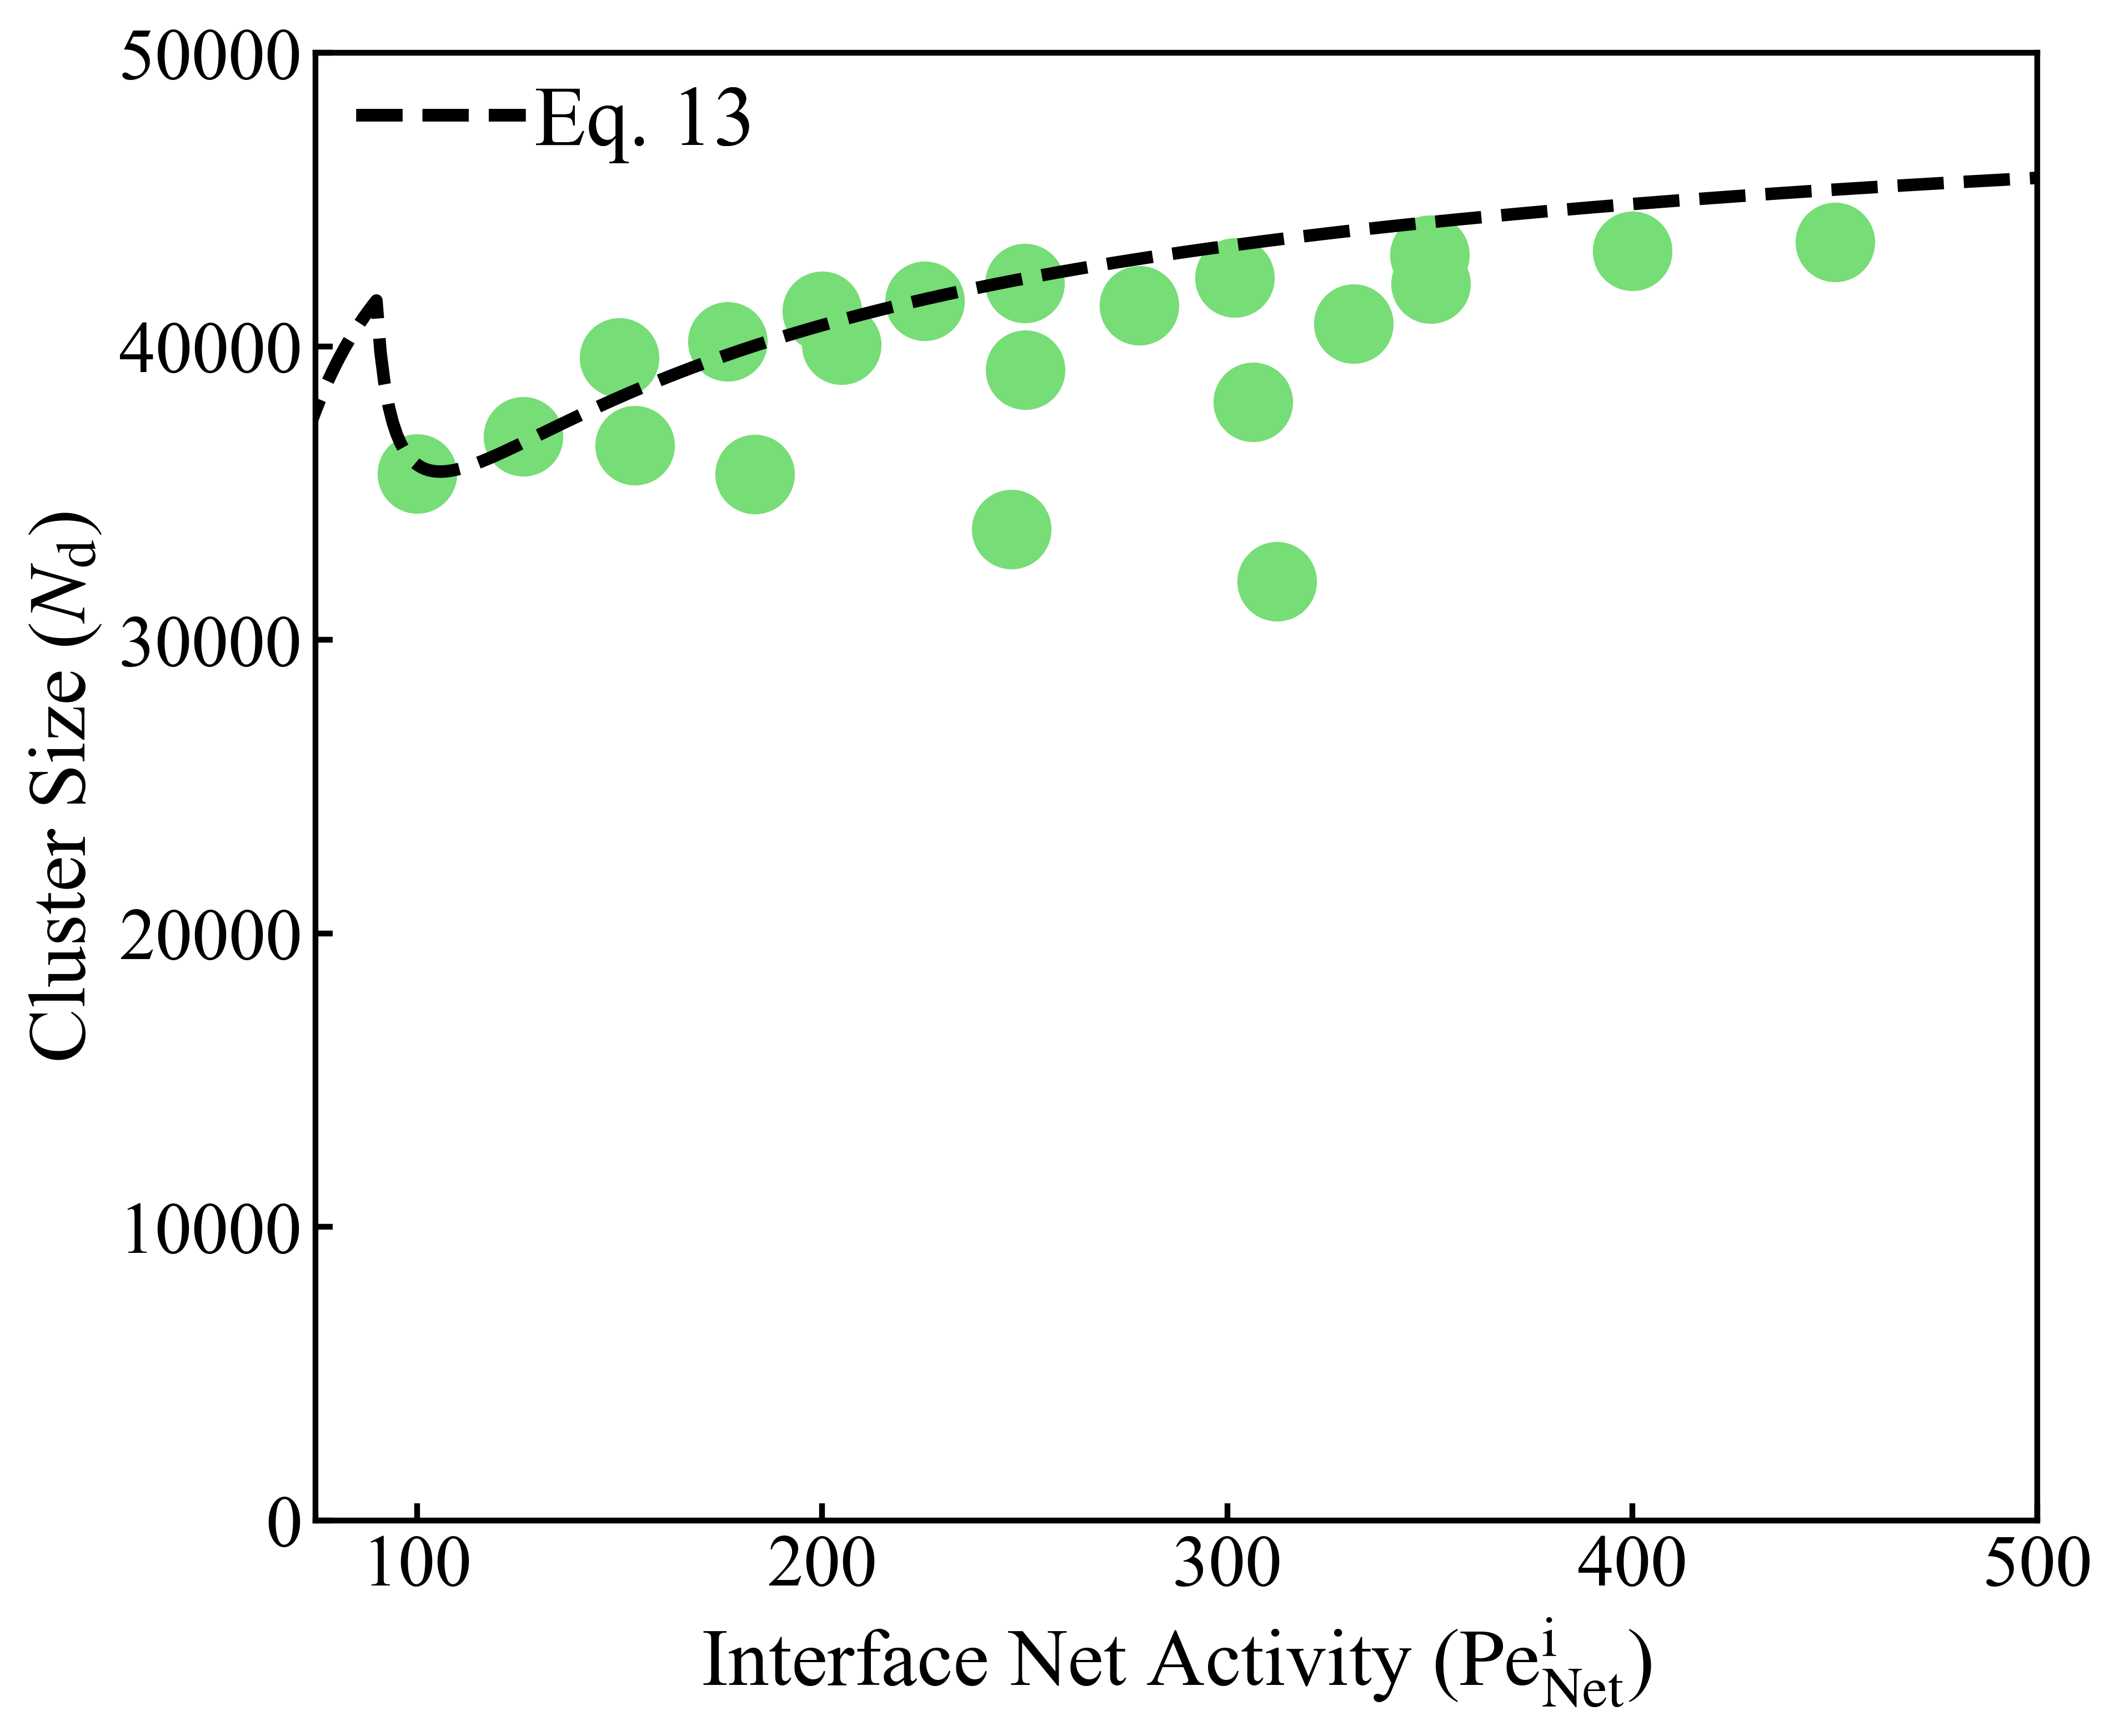

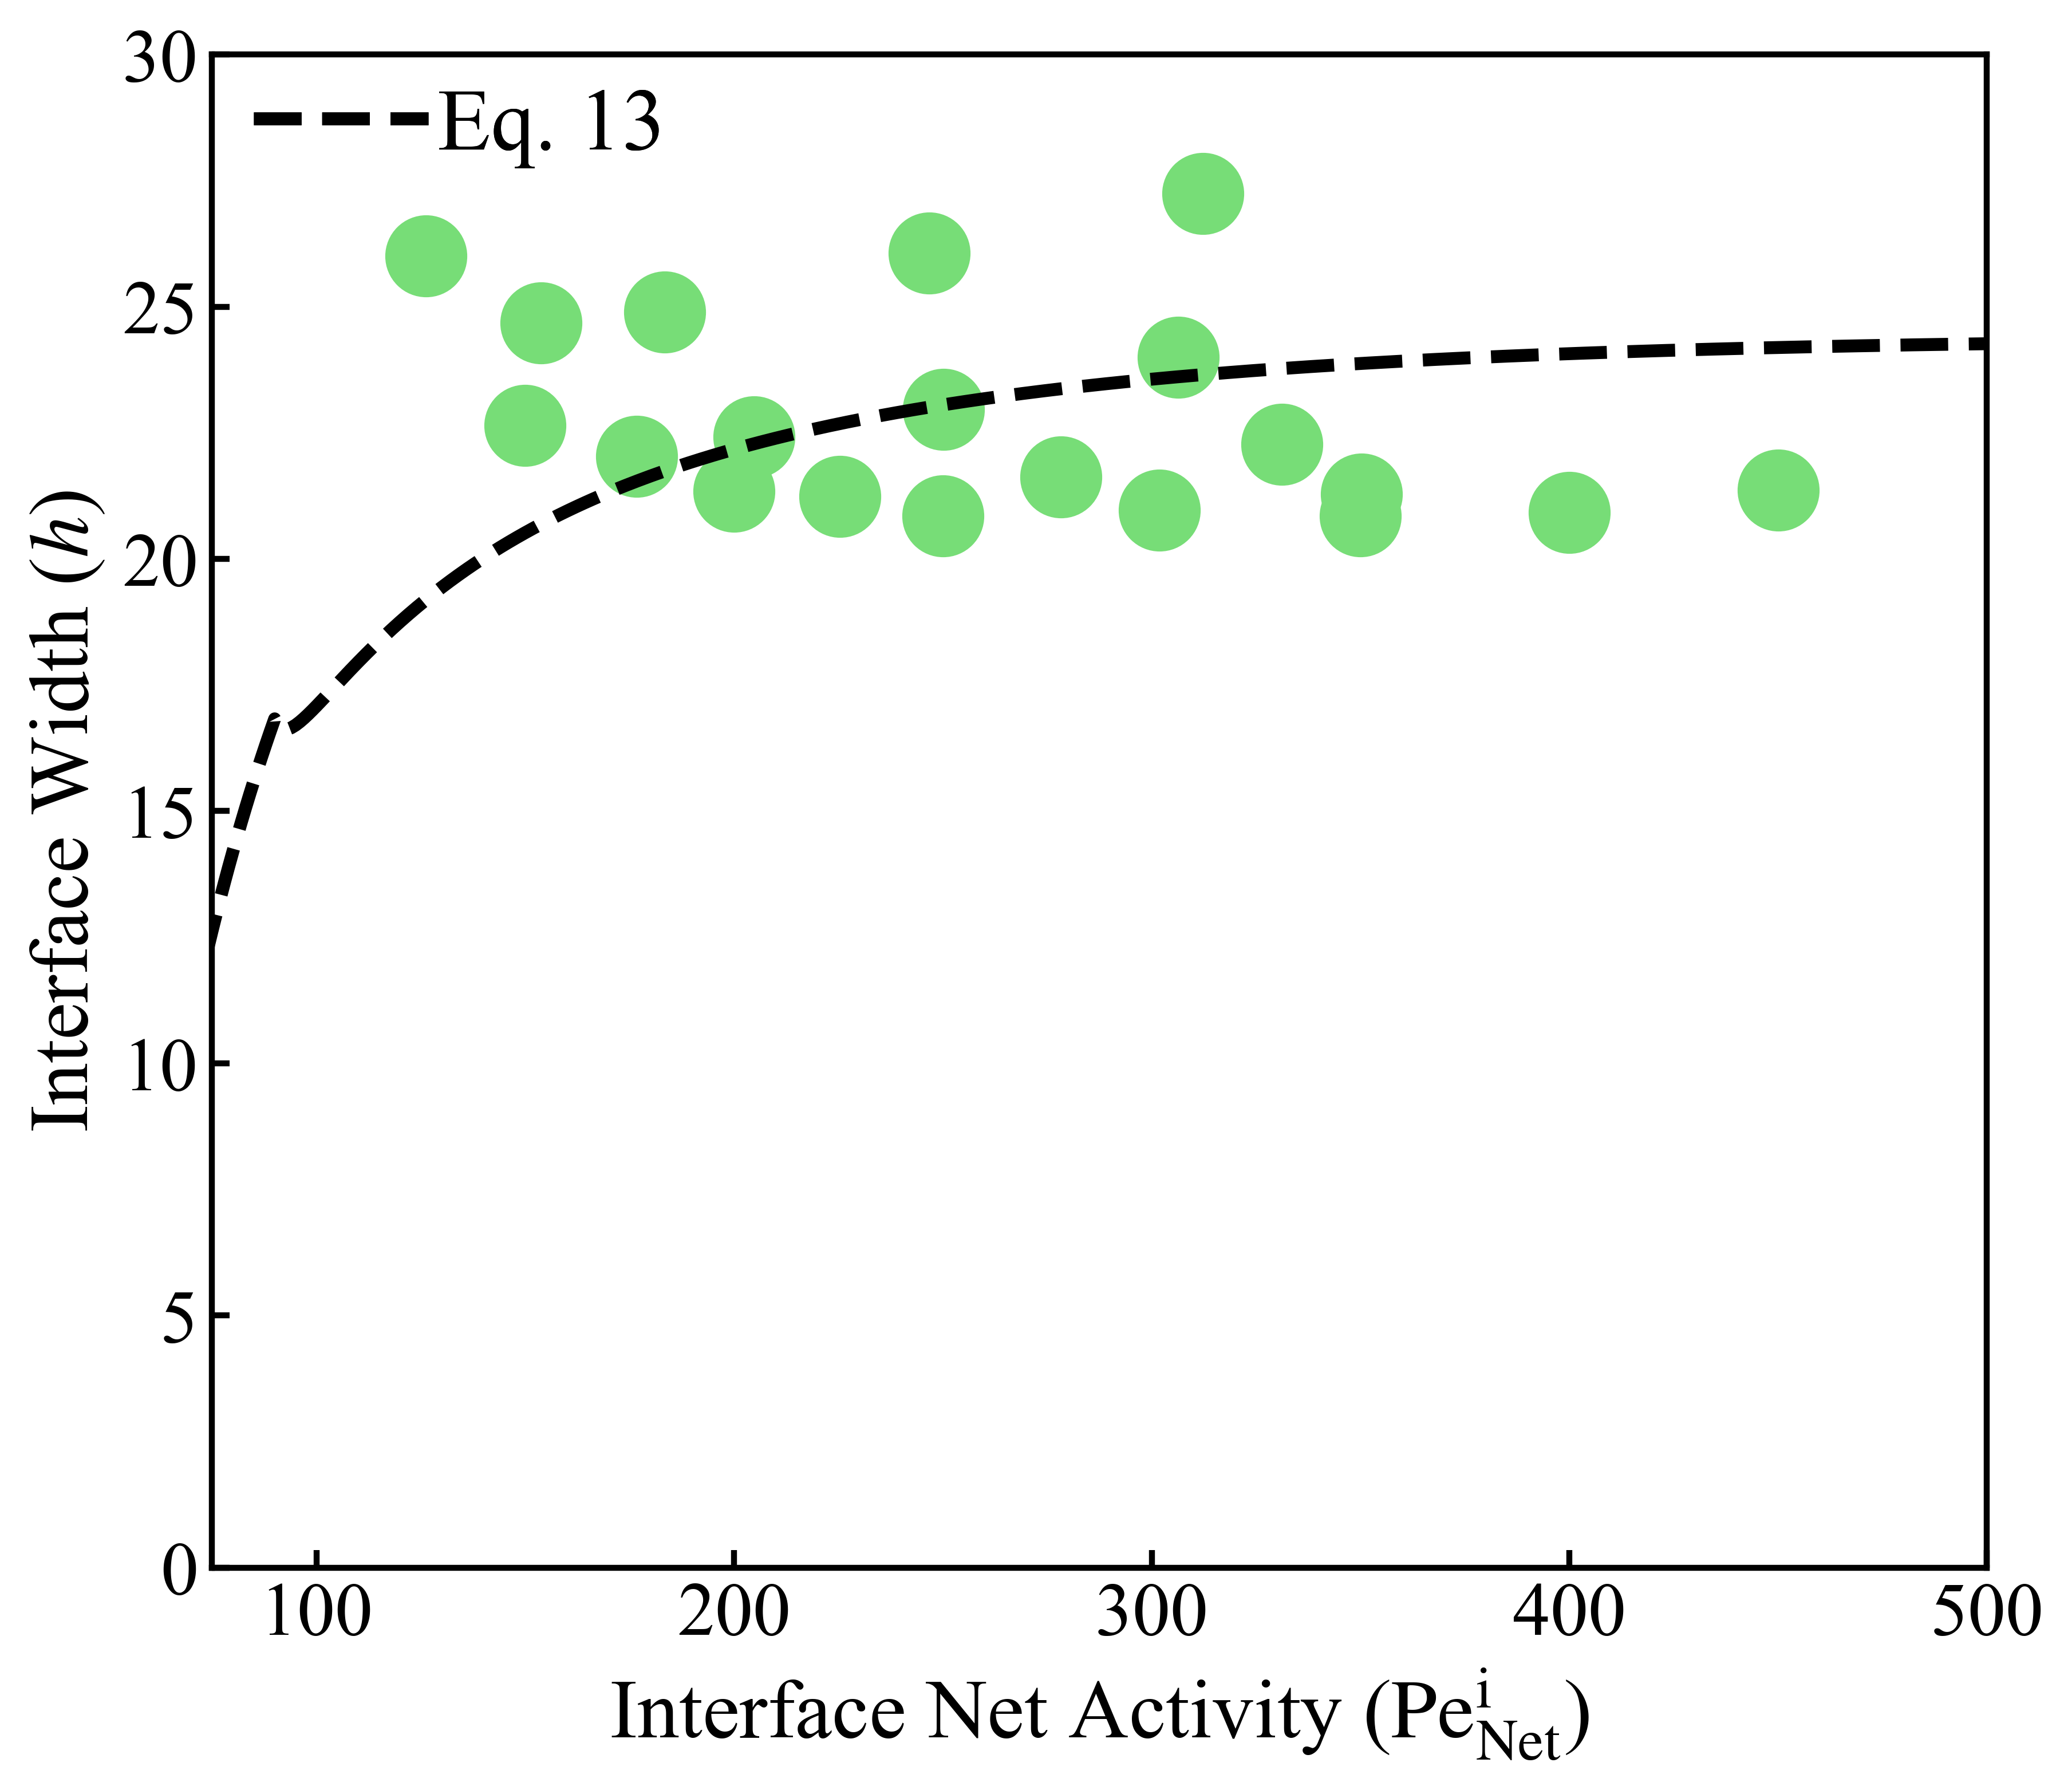

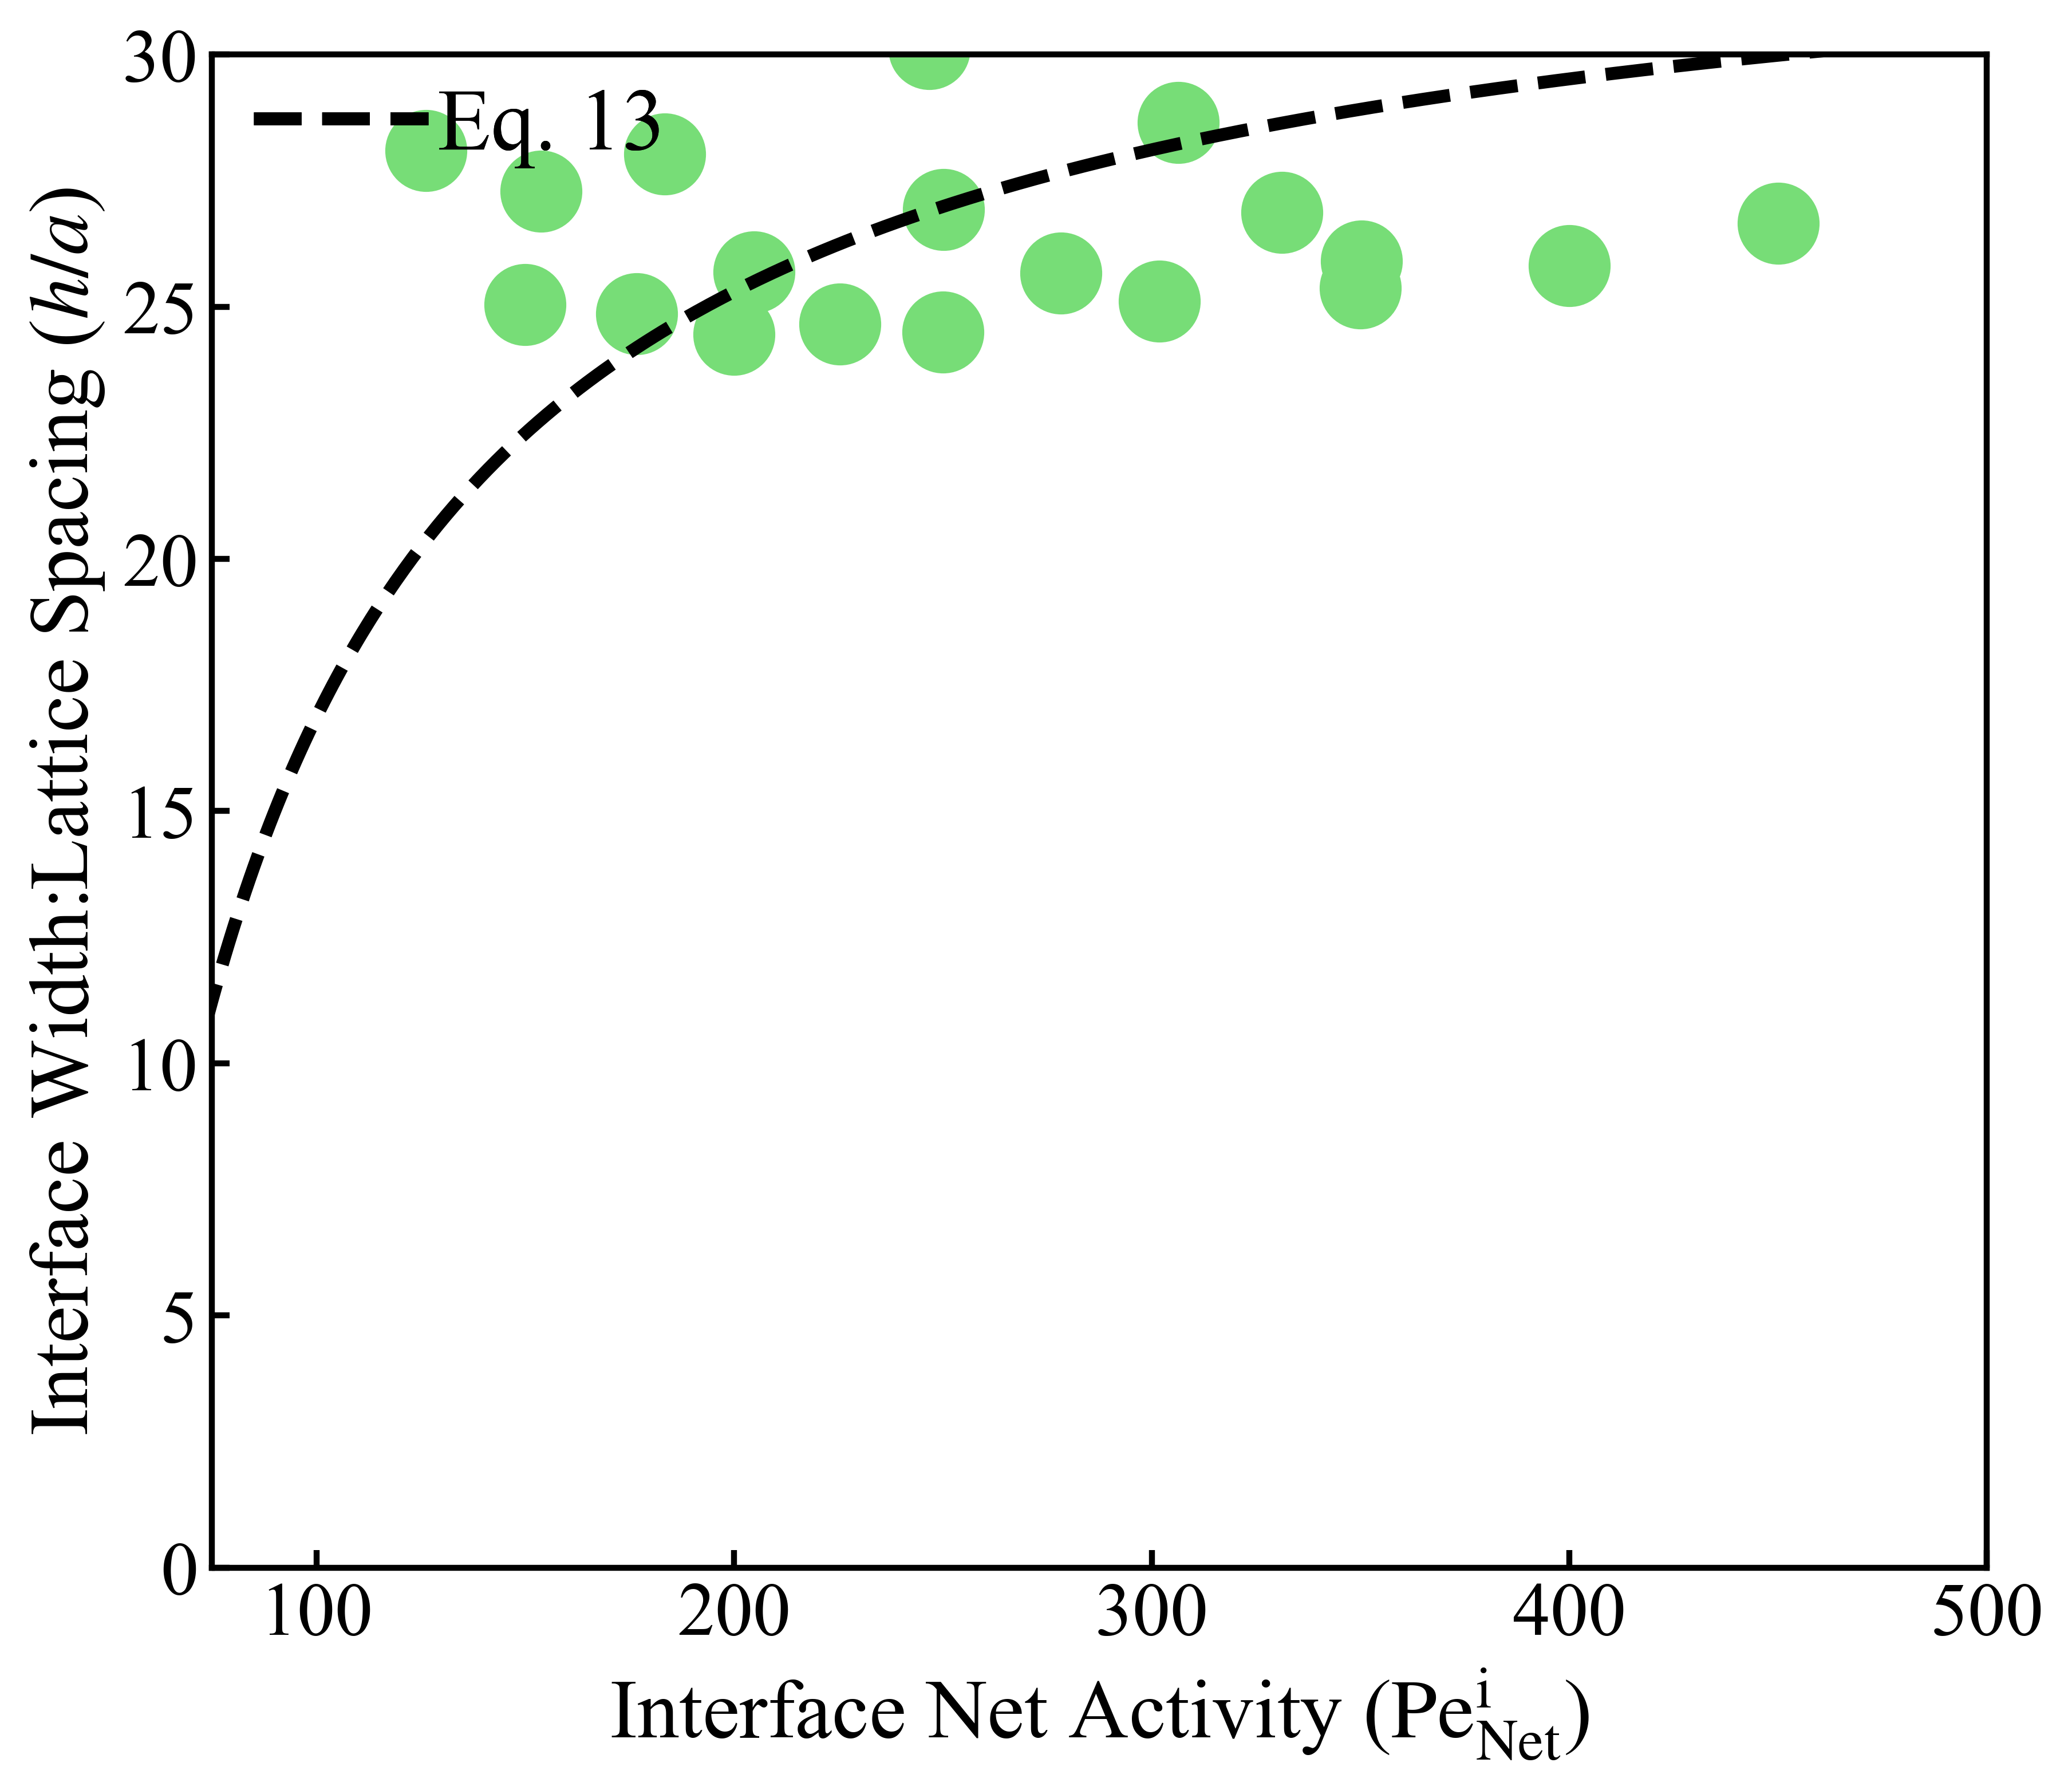

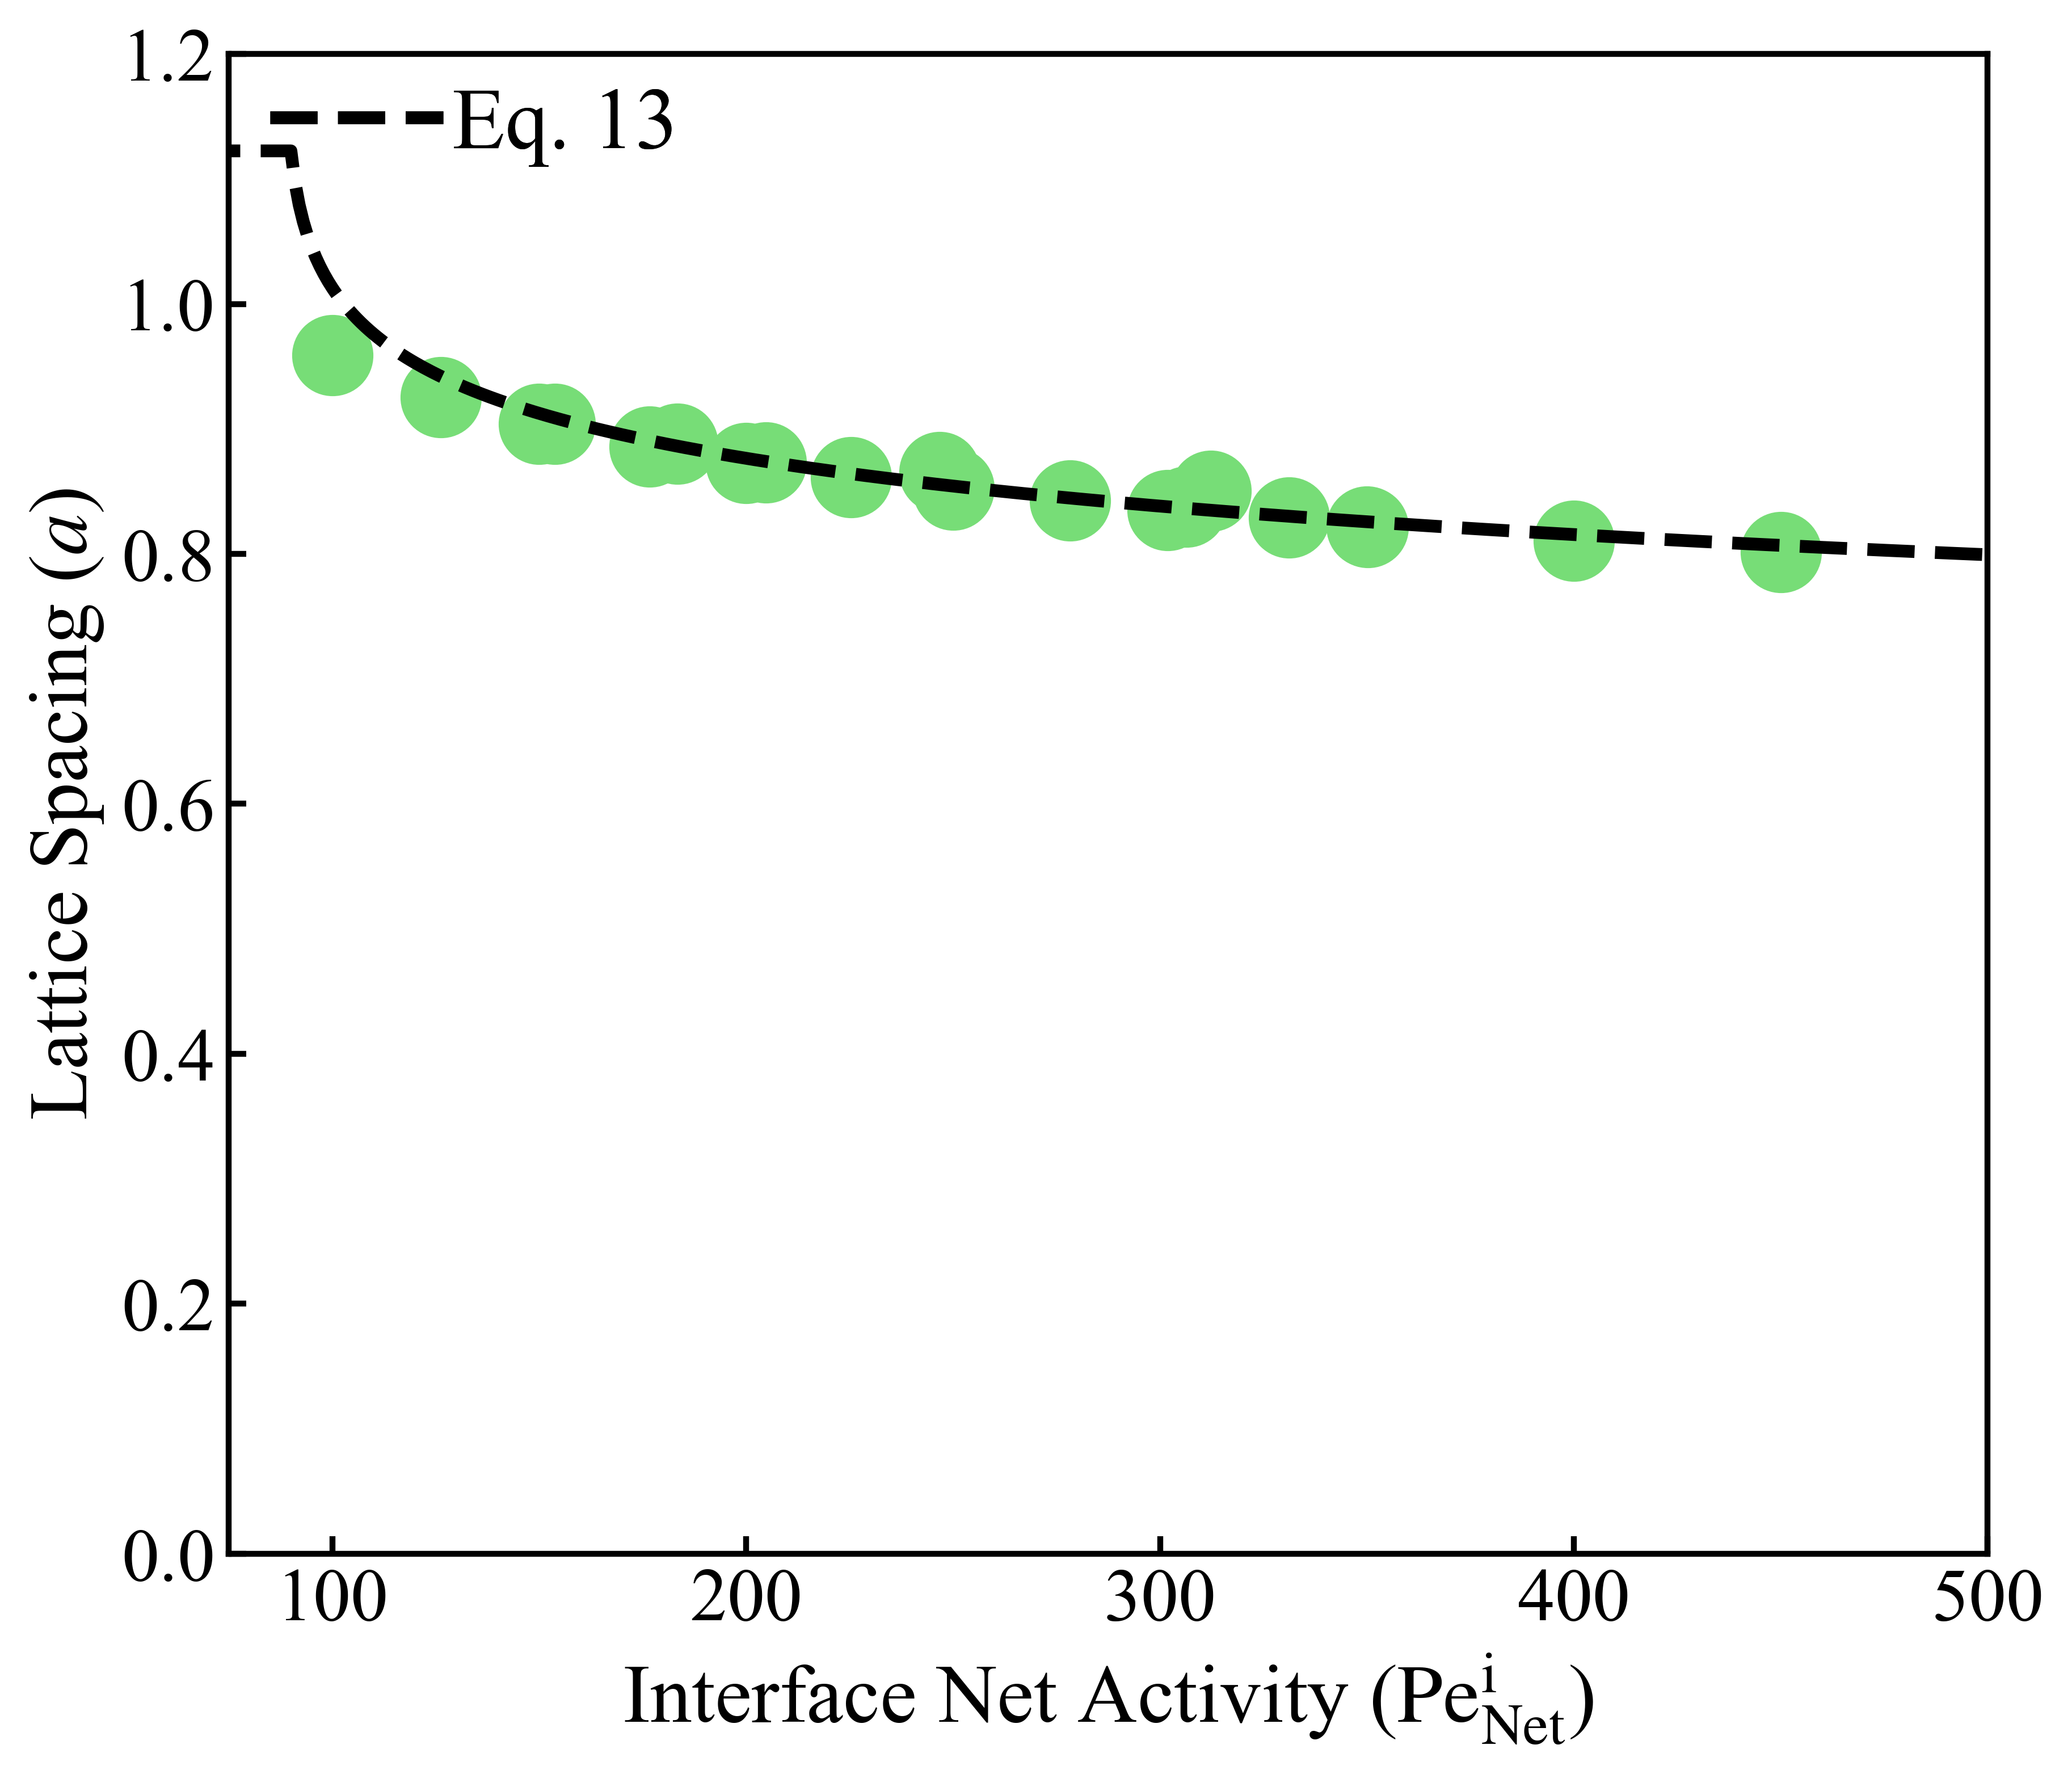

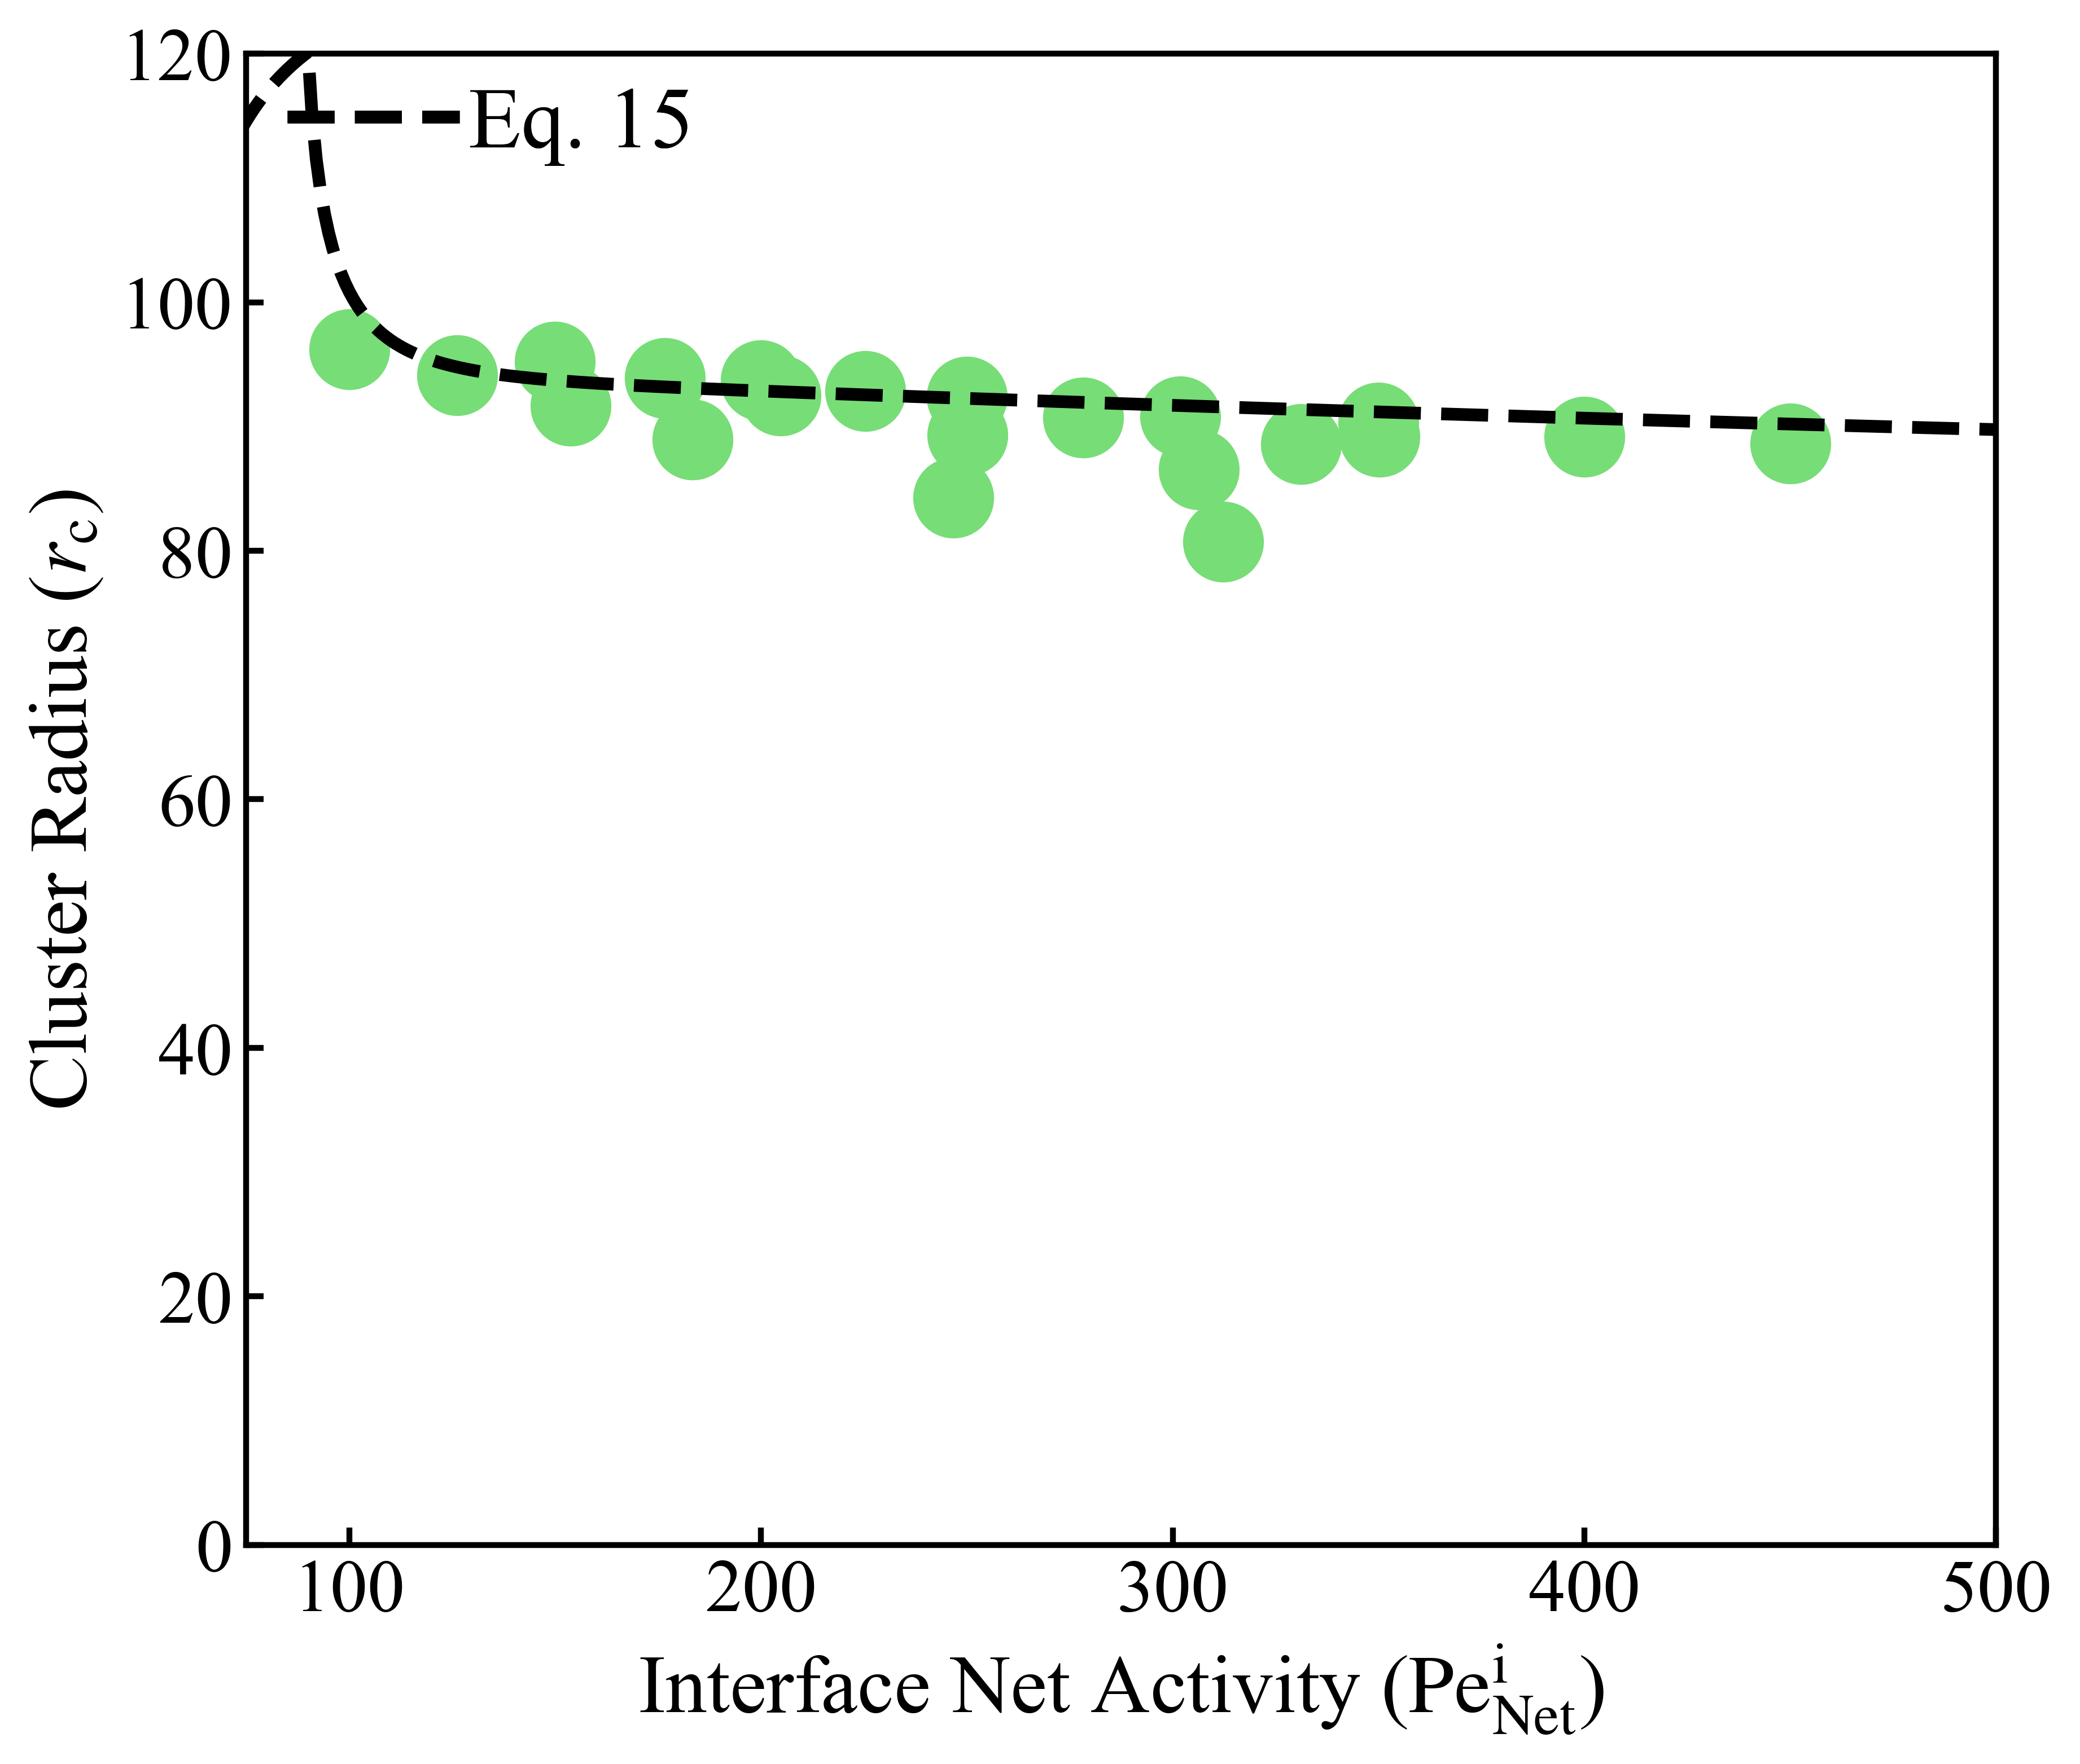

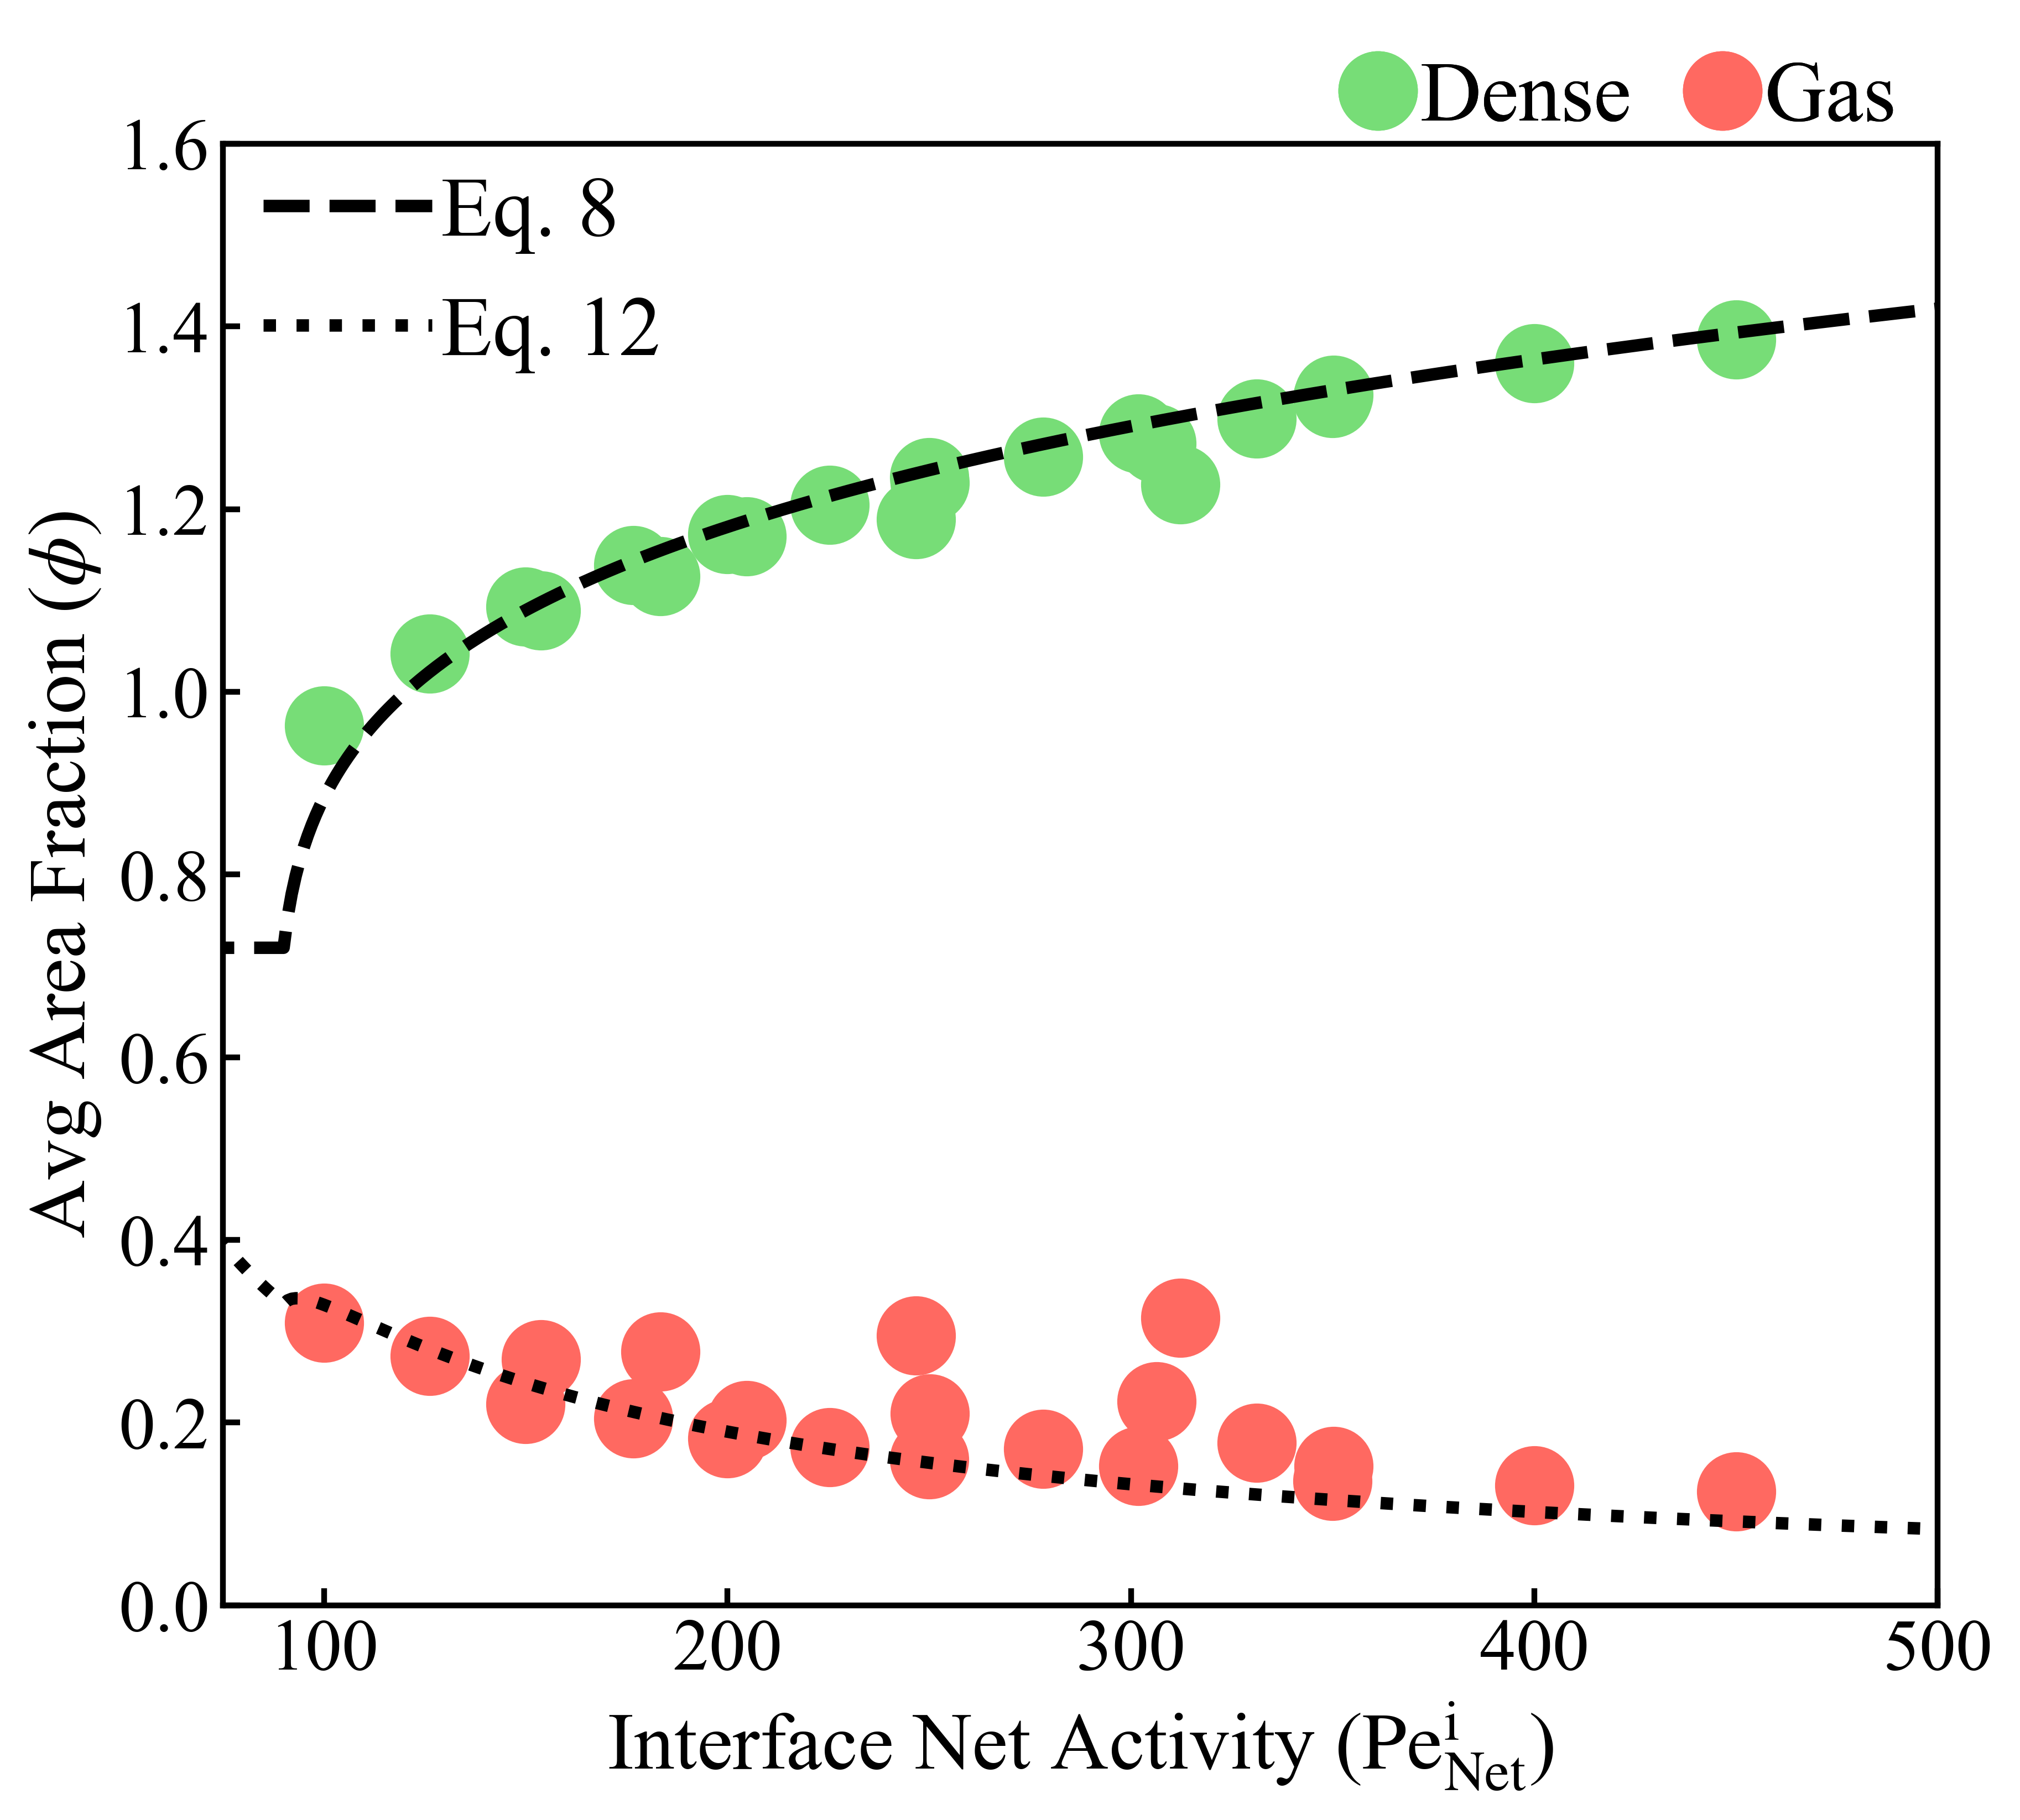

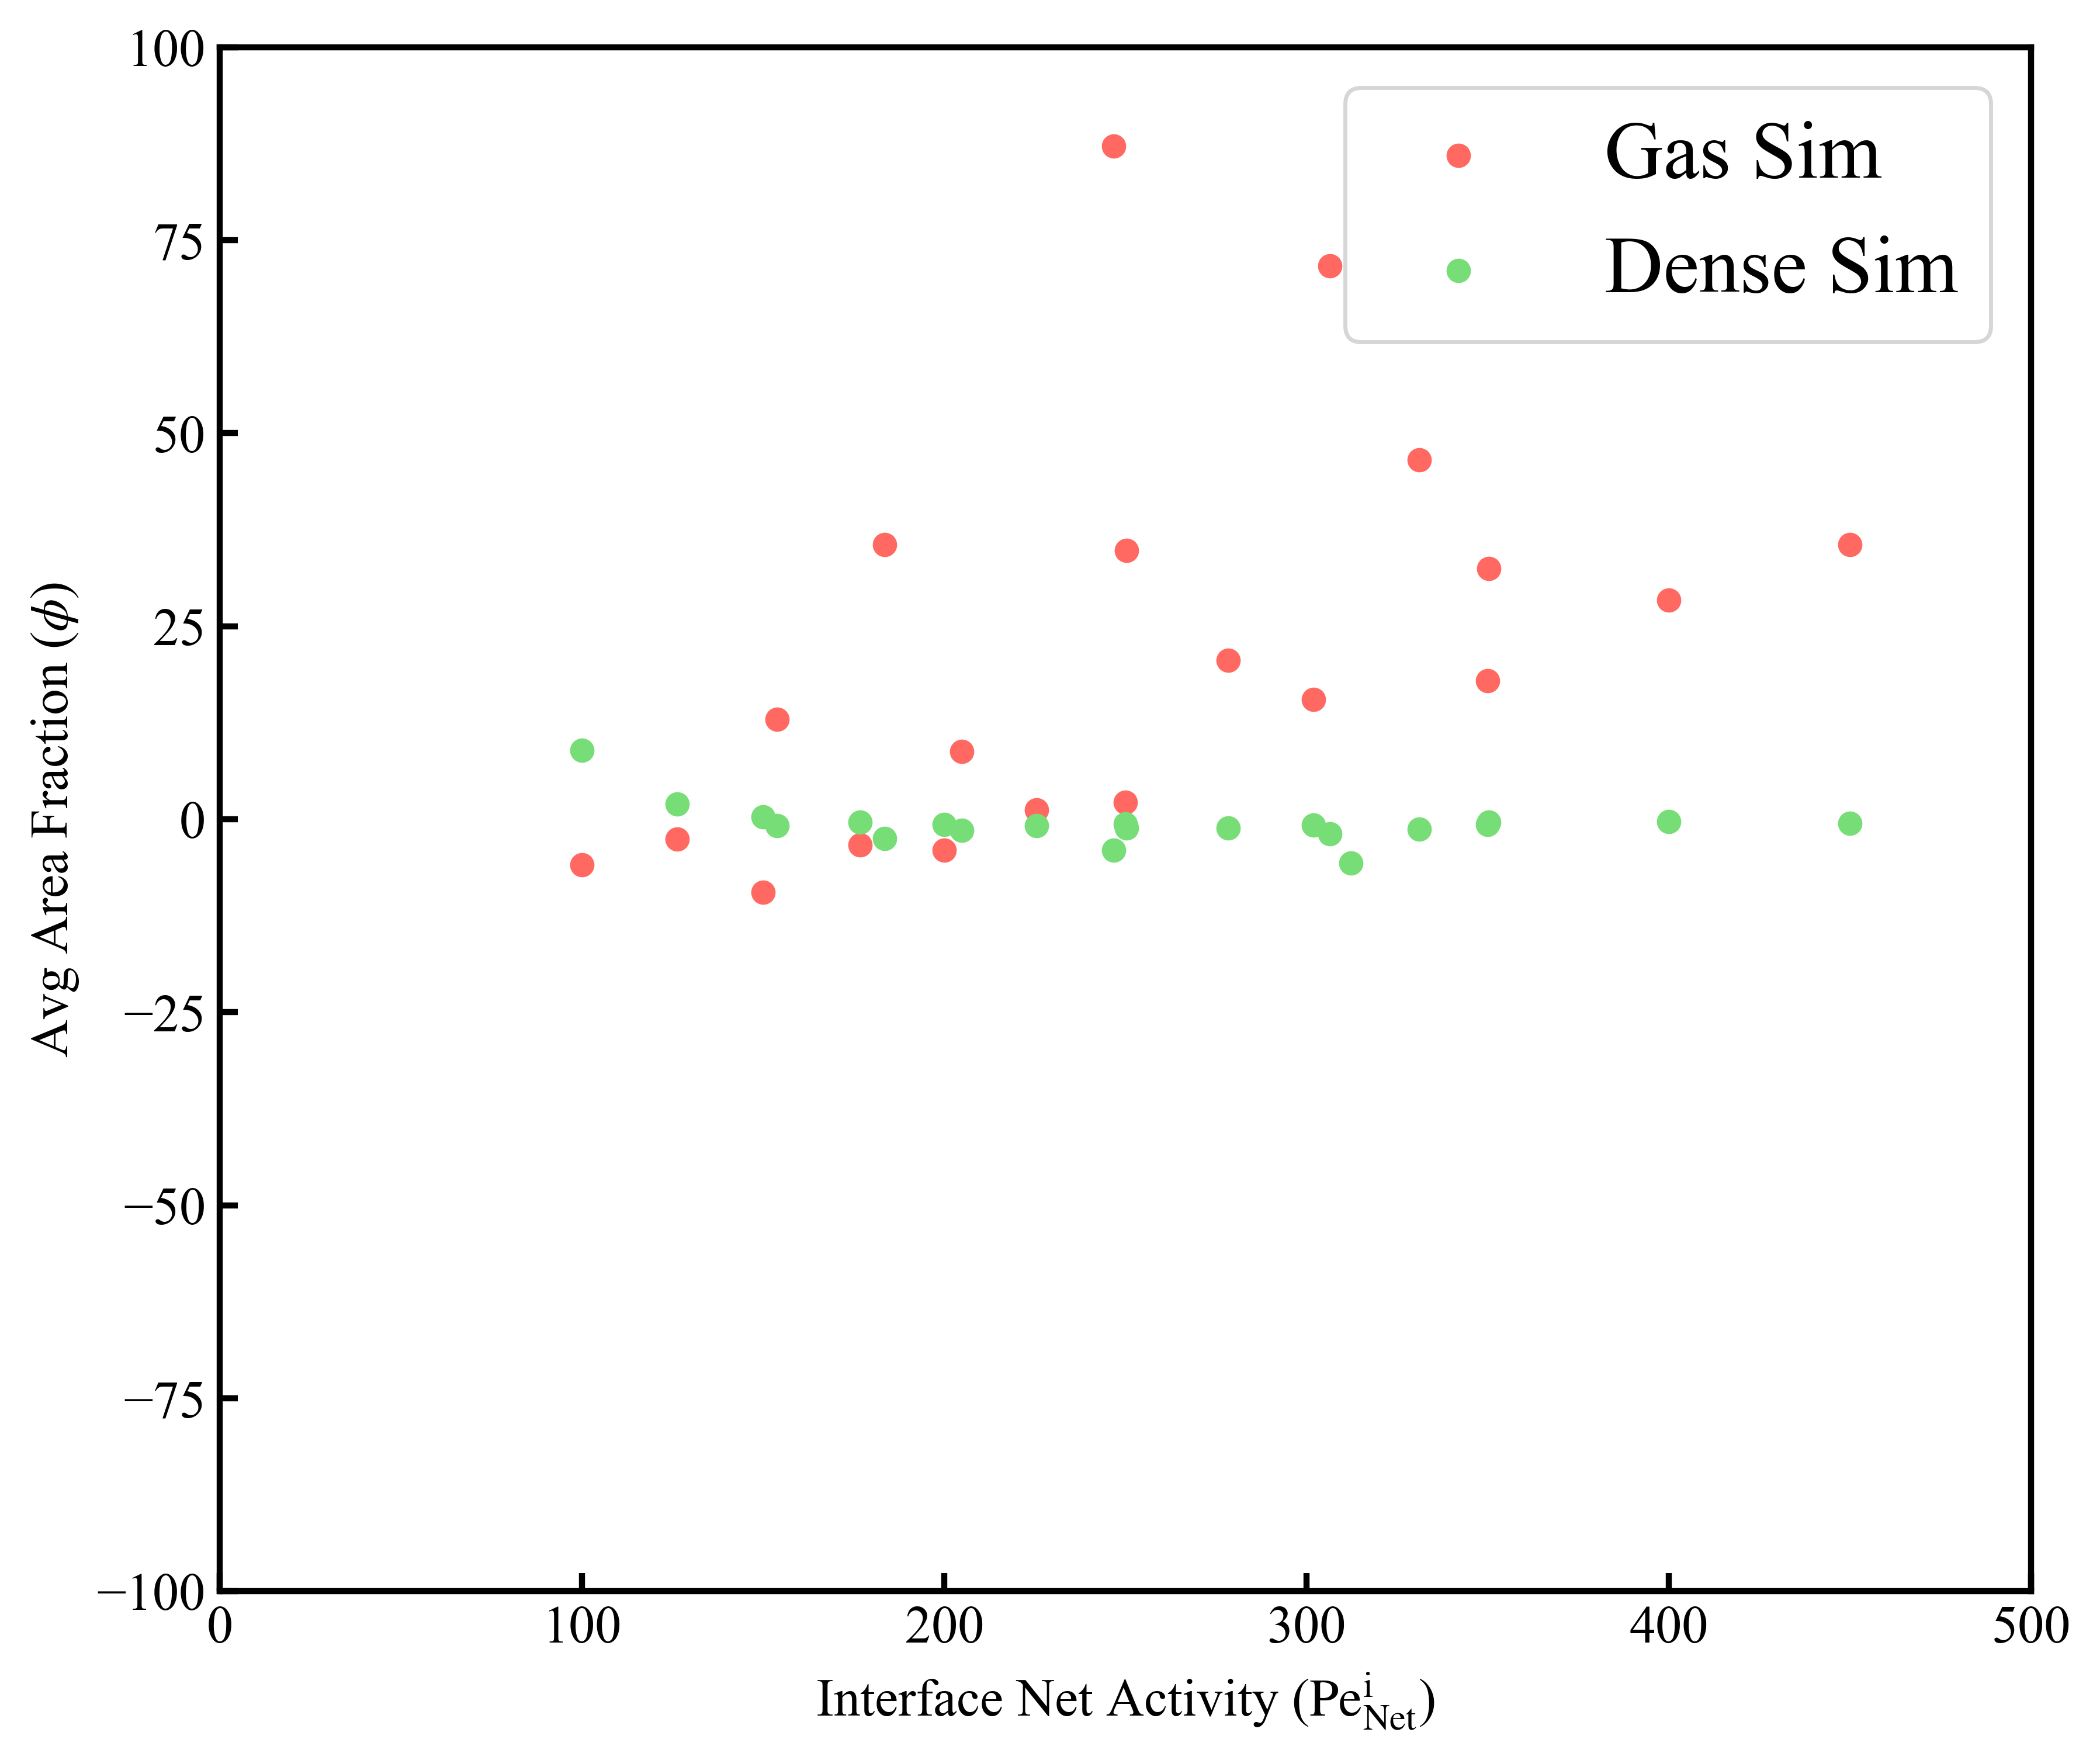

27.243305596980523
36.30589277533046
27.13217357600702
36.179160752254404
15.429149722885105
20.028920321028902
27.079442971121807
36.19474688577091


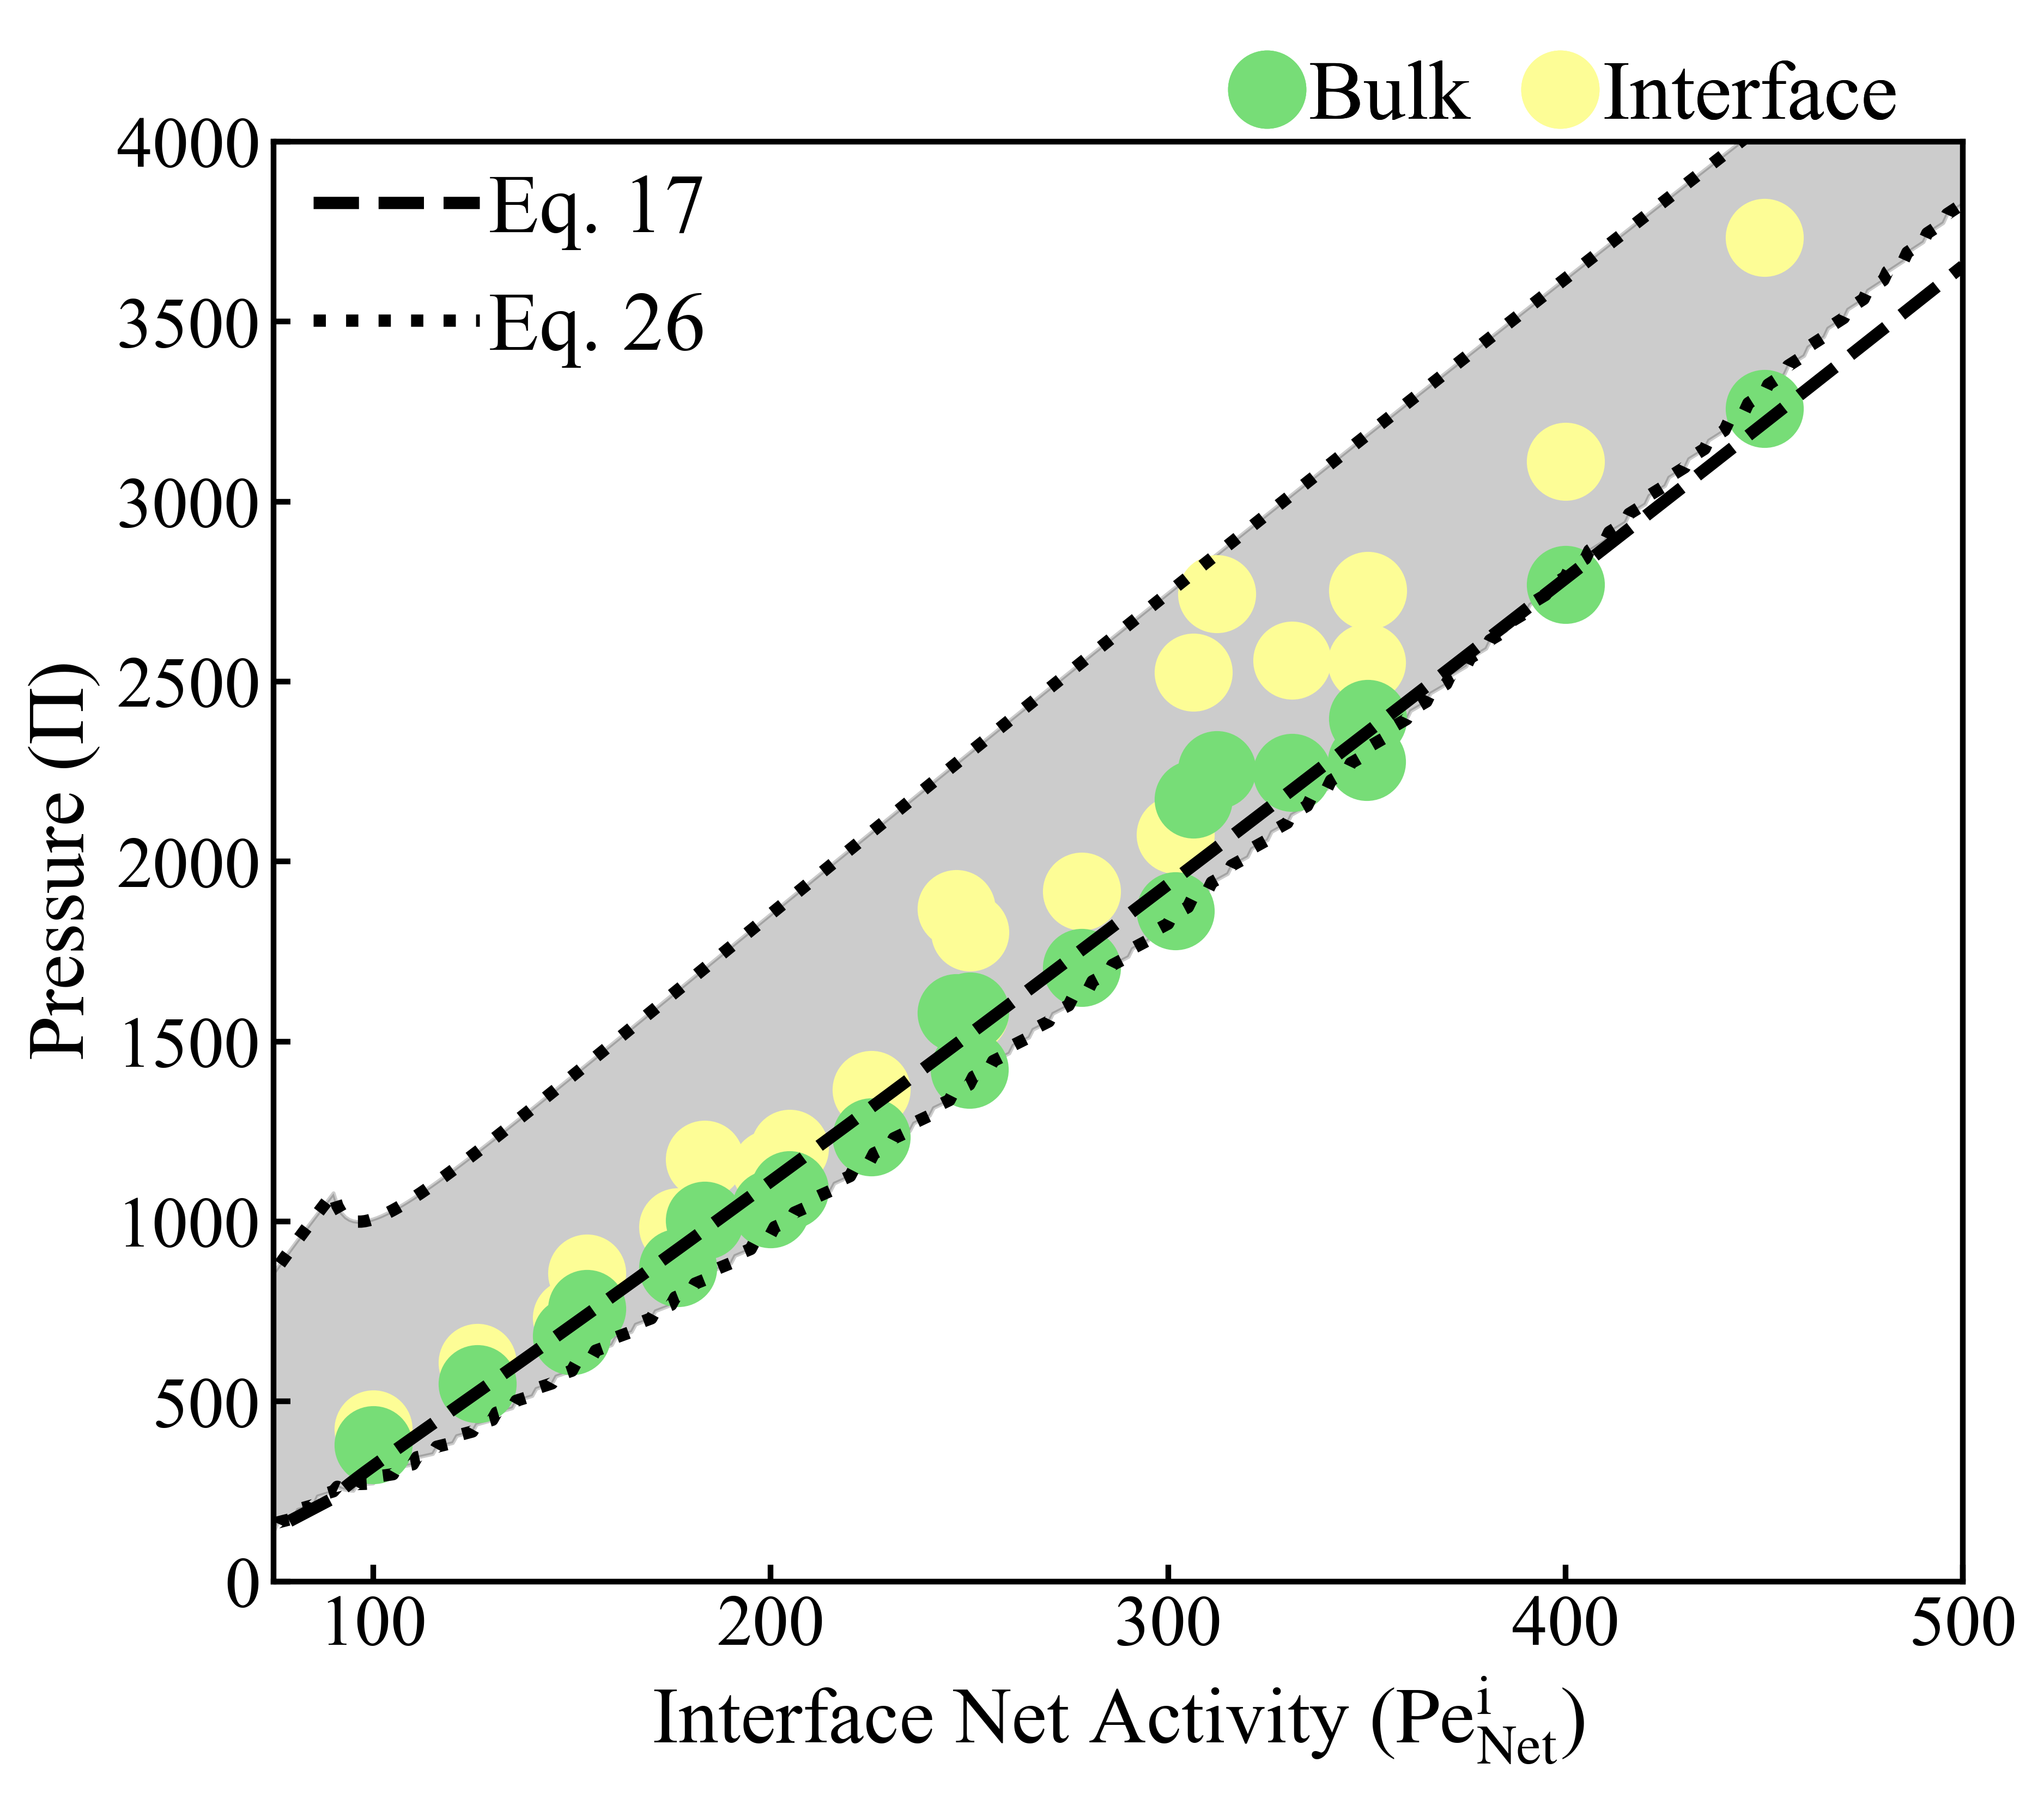

In [89]:
yellow = ("#fdfd96")
green = ("#77dd77")
red = ("#ff6961")
purple = ("#cab2d6")
print(len(int_pe_net))
print(len(avg_clust))
fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, clust_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net, avg_clust, edgecolor=green,facecolor=green,  s=msz*55*0.7)
#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 50000])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Cluster Size ($N_\mathrm{d}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()




fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net, avg_width, edgecolor=green,facecolor=green,  s=msz*55*0.7)
#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 30])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width ($h$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2/lat_theory_mean_int_theory, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net, avg_width/all_lat_time_mean, edgecolor=green,facecolor=green,  s=msz*55*0.7)
#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 30])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width:Lattice Spacing ($h/a$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, lat_theory_mean_int_theory, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net, all_lat_time_mean, edgecolor=green,facecolor=green,  s=msz*55*0.7)
#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.2])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Lattice Spacing ($a$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, rad_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net, avg_rad, edgecolor=green,facecolor=green,  s=msz*55*0.7)
#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 120])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Cluster Radius ($r_\mathrm{c}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 15', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()
    
fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

plt.scatter(int_pe_net, phi_gas_sim, edgecolor=red,facecolor=red,  s=msz*55*0.7, label='Gas Sim')
#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.6])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Avg Area Fraction ($\phi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.8, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)


plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')

plt.scatter(int_pe_net, 100*(phi_gas_sim-phi_gas_theory)/phi_gas_theory, edgecolor=red,facecolor=red,  s=25.0, label='Gas Sim')

plt.scatter(int_pe_net, 100*(avg_area2 * (np.pi/4) - phi_dense_theory)/phi_dense_theory, edgecolor=green, facecolor=green, s=25.0, label='Dense Sim')

ax1.set_xlim([0,500.0])
ax1.set_ylim([-100, 100])
plt.ylabel(r'Avg Area Fraction ($\phi$)')
plt.xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)')
plt.legend(loc = 'upper right')

plt.show()

error = 100*(phi_gas_sim-phi_gas_theory)/phi_gas_theory
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory3)/phi_gas_theory3
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory4)/phi_gas_theory4
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory5)/phi_gas_theory5
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)


fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(int_pe_net, avg_int_theory_arr, color='black', linestyle='dotted', linewidth=1.8*1.8)
ax1.fill_between(int_pe_net_final_arr, press_theory_min_arr, press_theory_max_arr, color='black', alpha=0.2)

plt.scatter(int_pe_net, align_press_arr, edgecolor=yellow,facecolor=yellow,  s=msz*55*0.7, label='Gas Sim')
#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, press_theory2, color='black', linestyle='--', linewidth=1.8*1.8)
plt.plot(int_pe_net_final_arr, press_theory_min_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
plt.plot(int_pe_net_final_arr, press_theory_max_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
plt.scatter(int_pe_net, interpart_press, edgecolor=green, facecolor=green, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 4000])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Bulk', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=yellow,
                      markerfacecolor=yellow,
                      label='Interface', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 17', markerfacecolor='dashed', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 26', markerfacecolor='dotted', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.75, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)


plt.show()




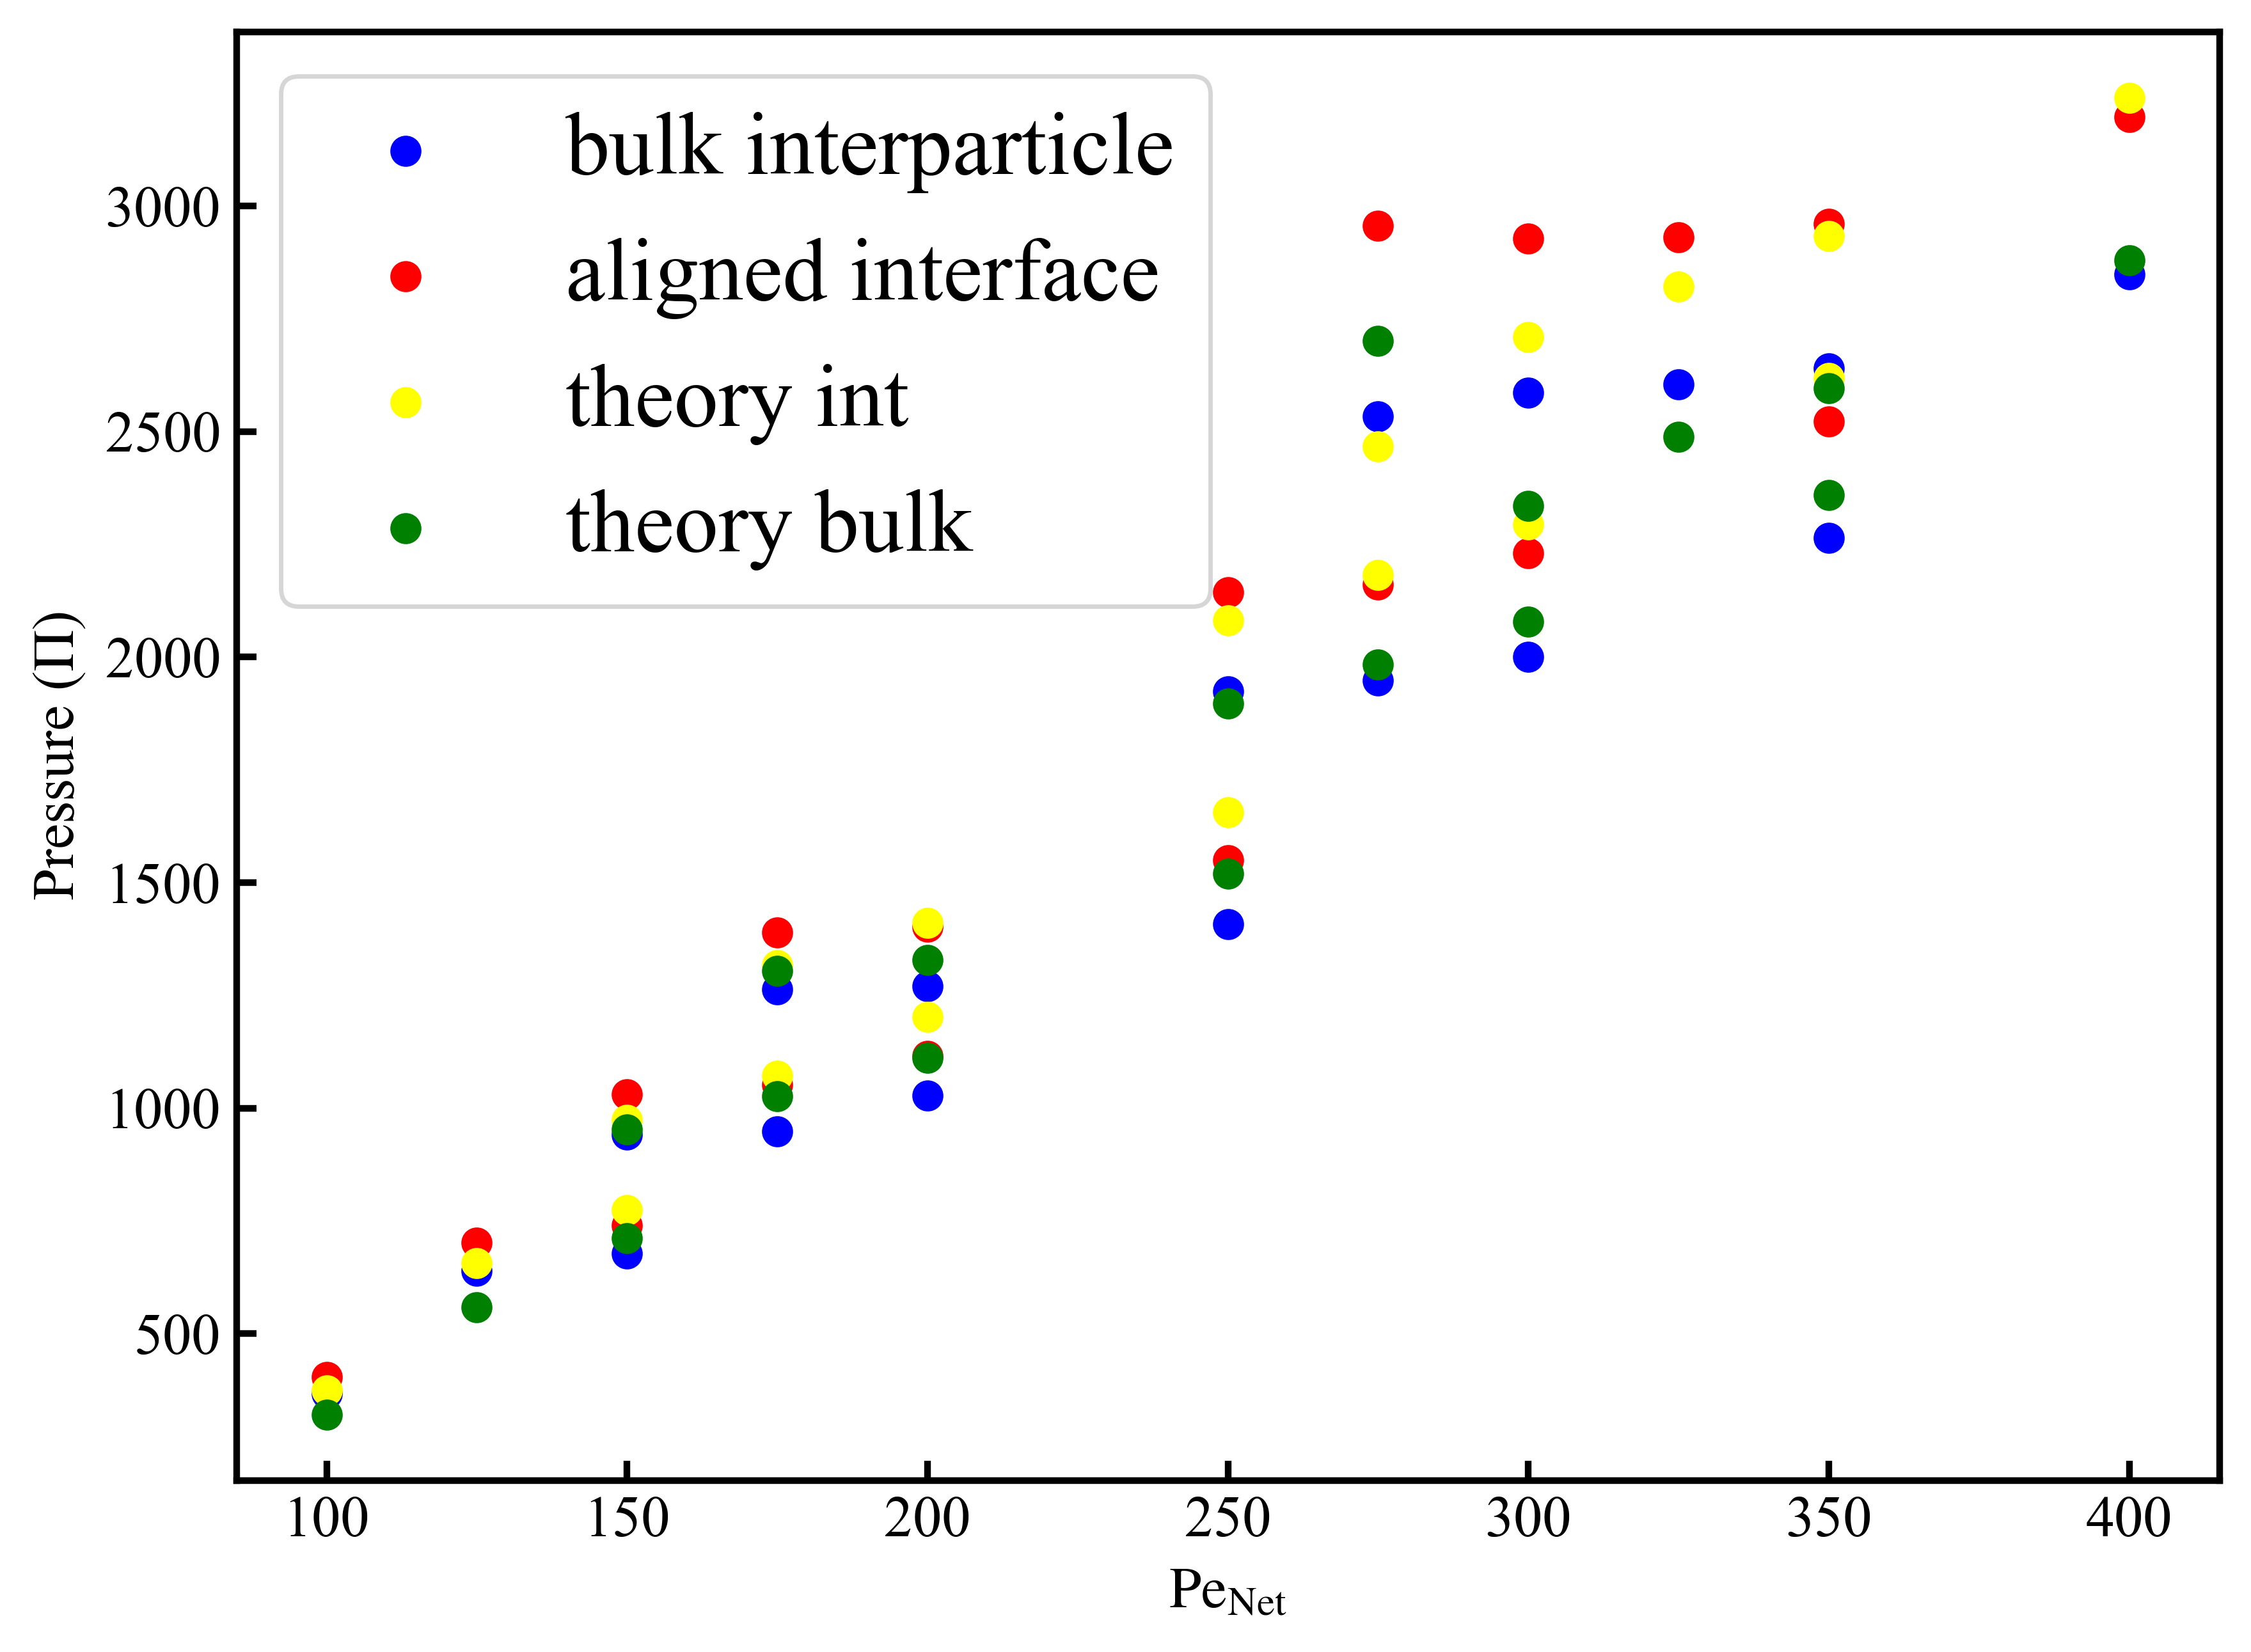

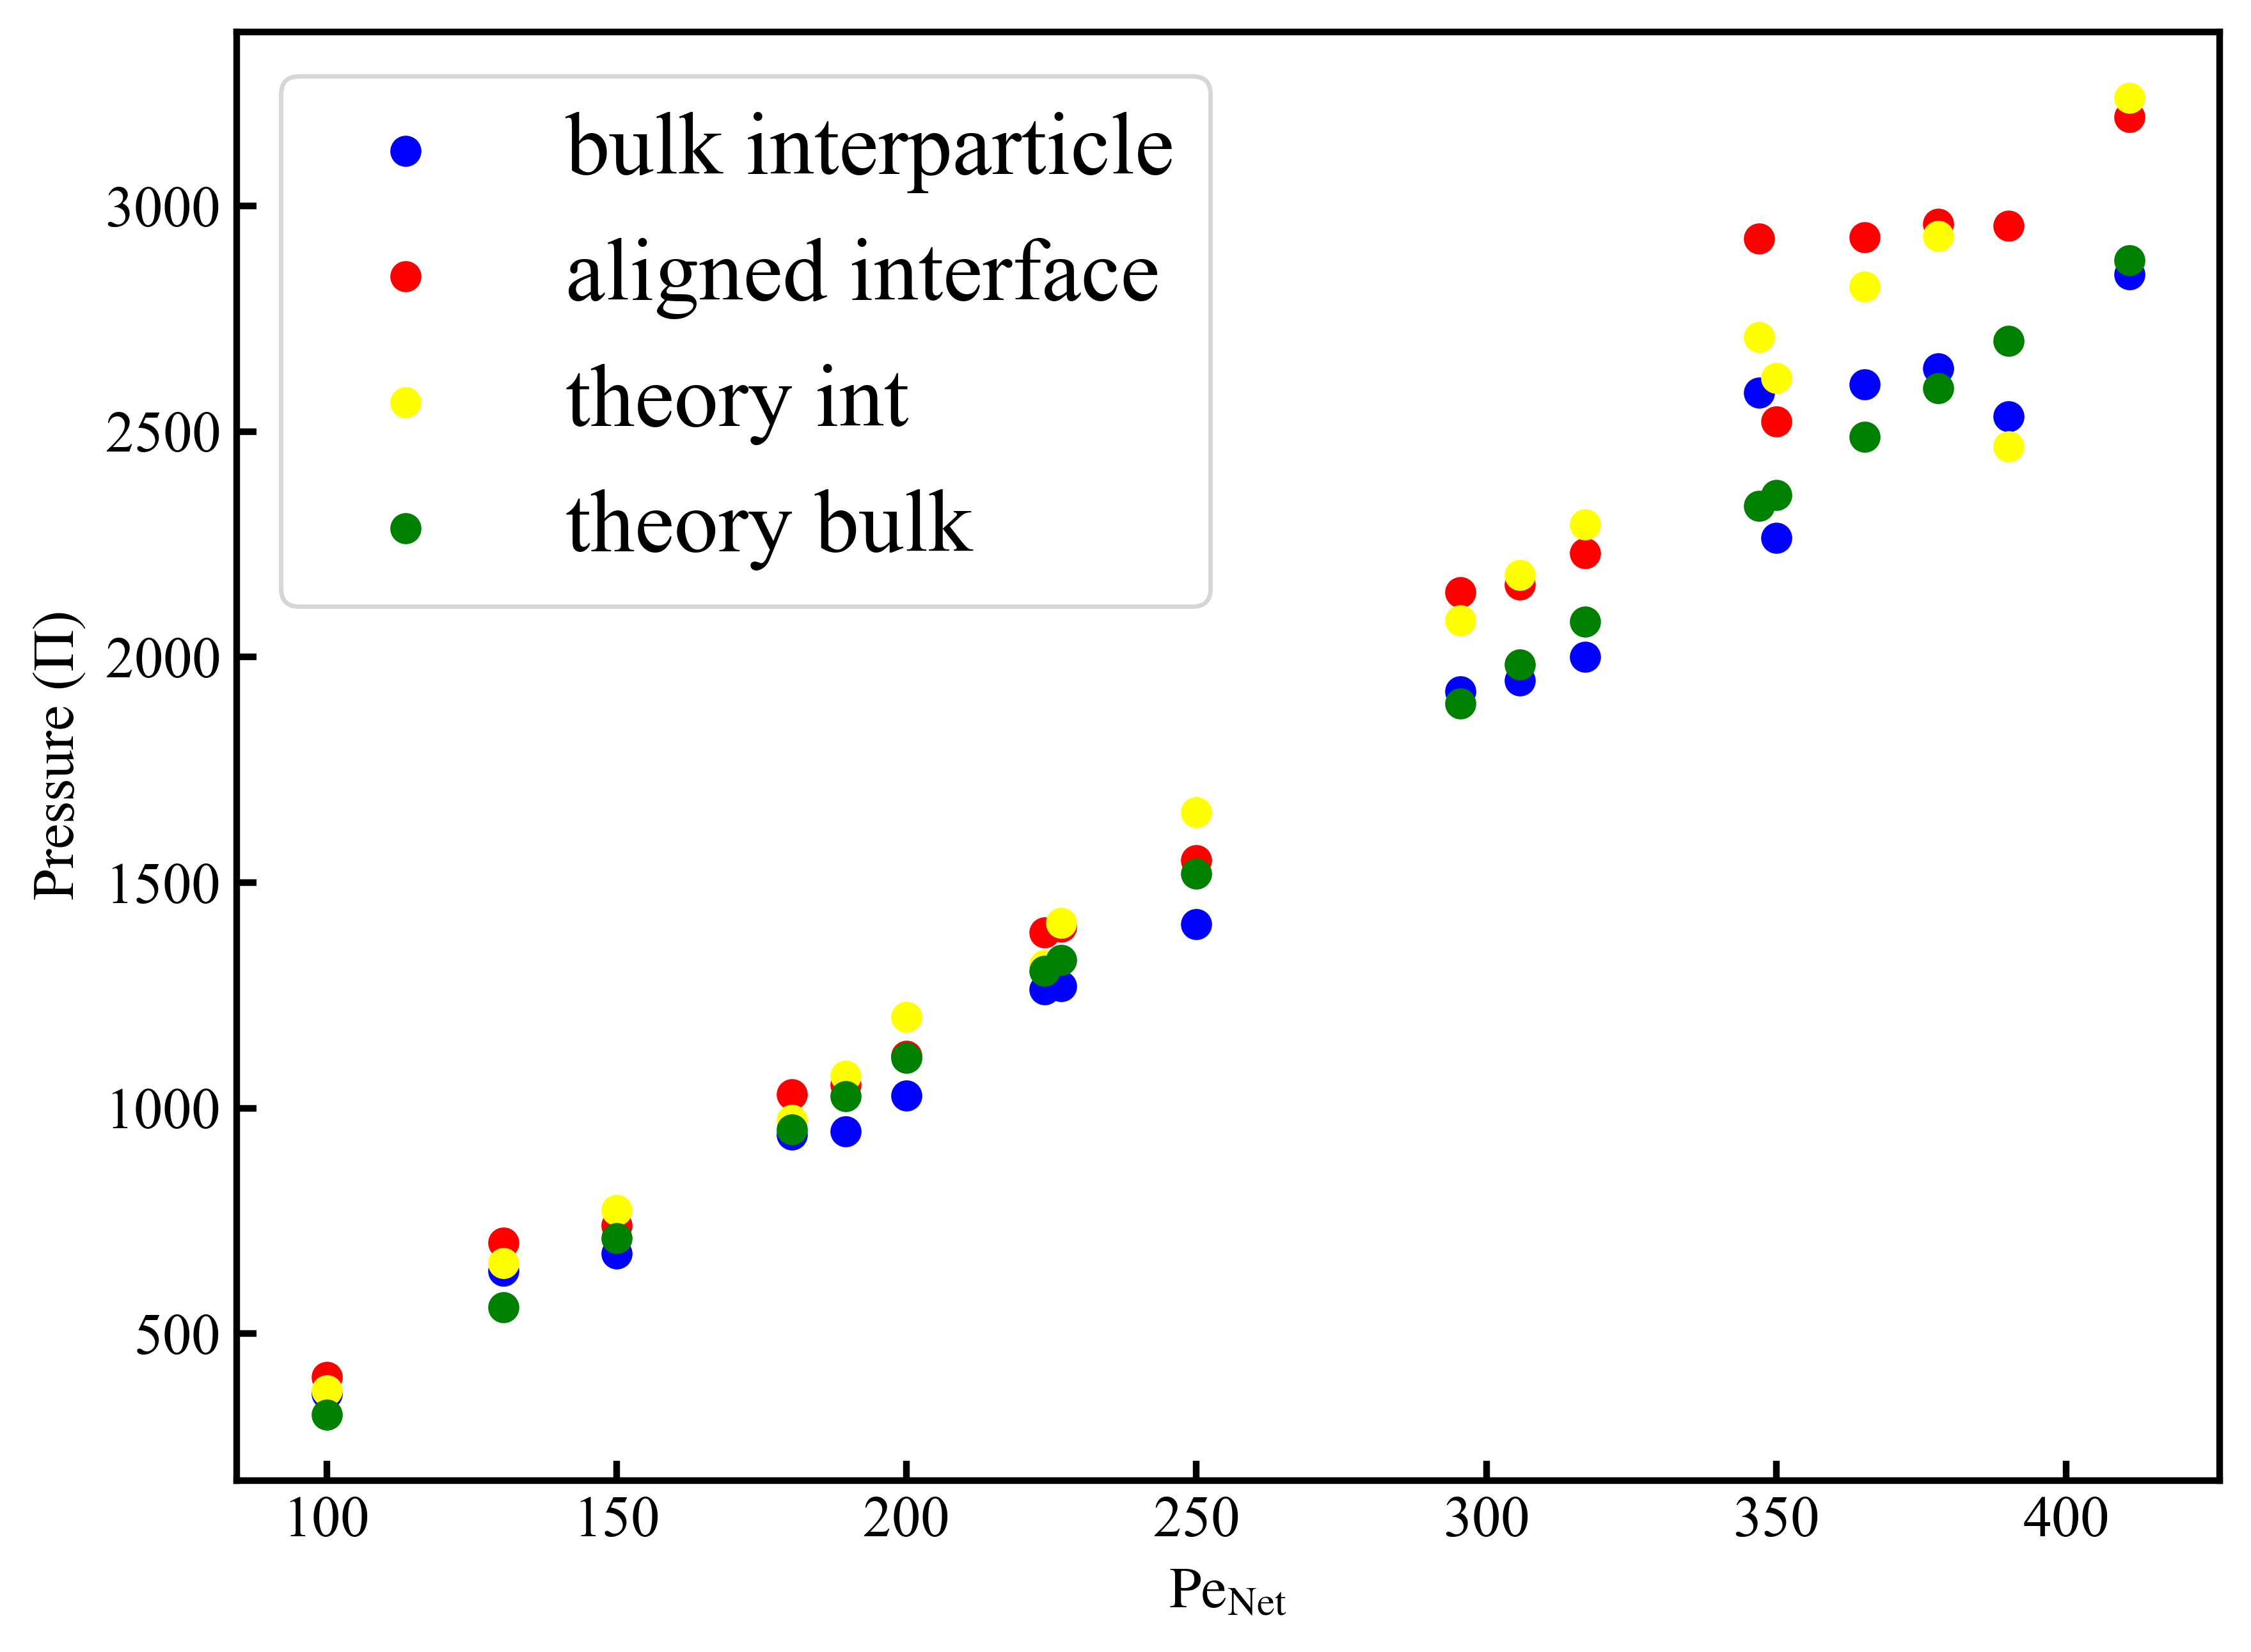

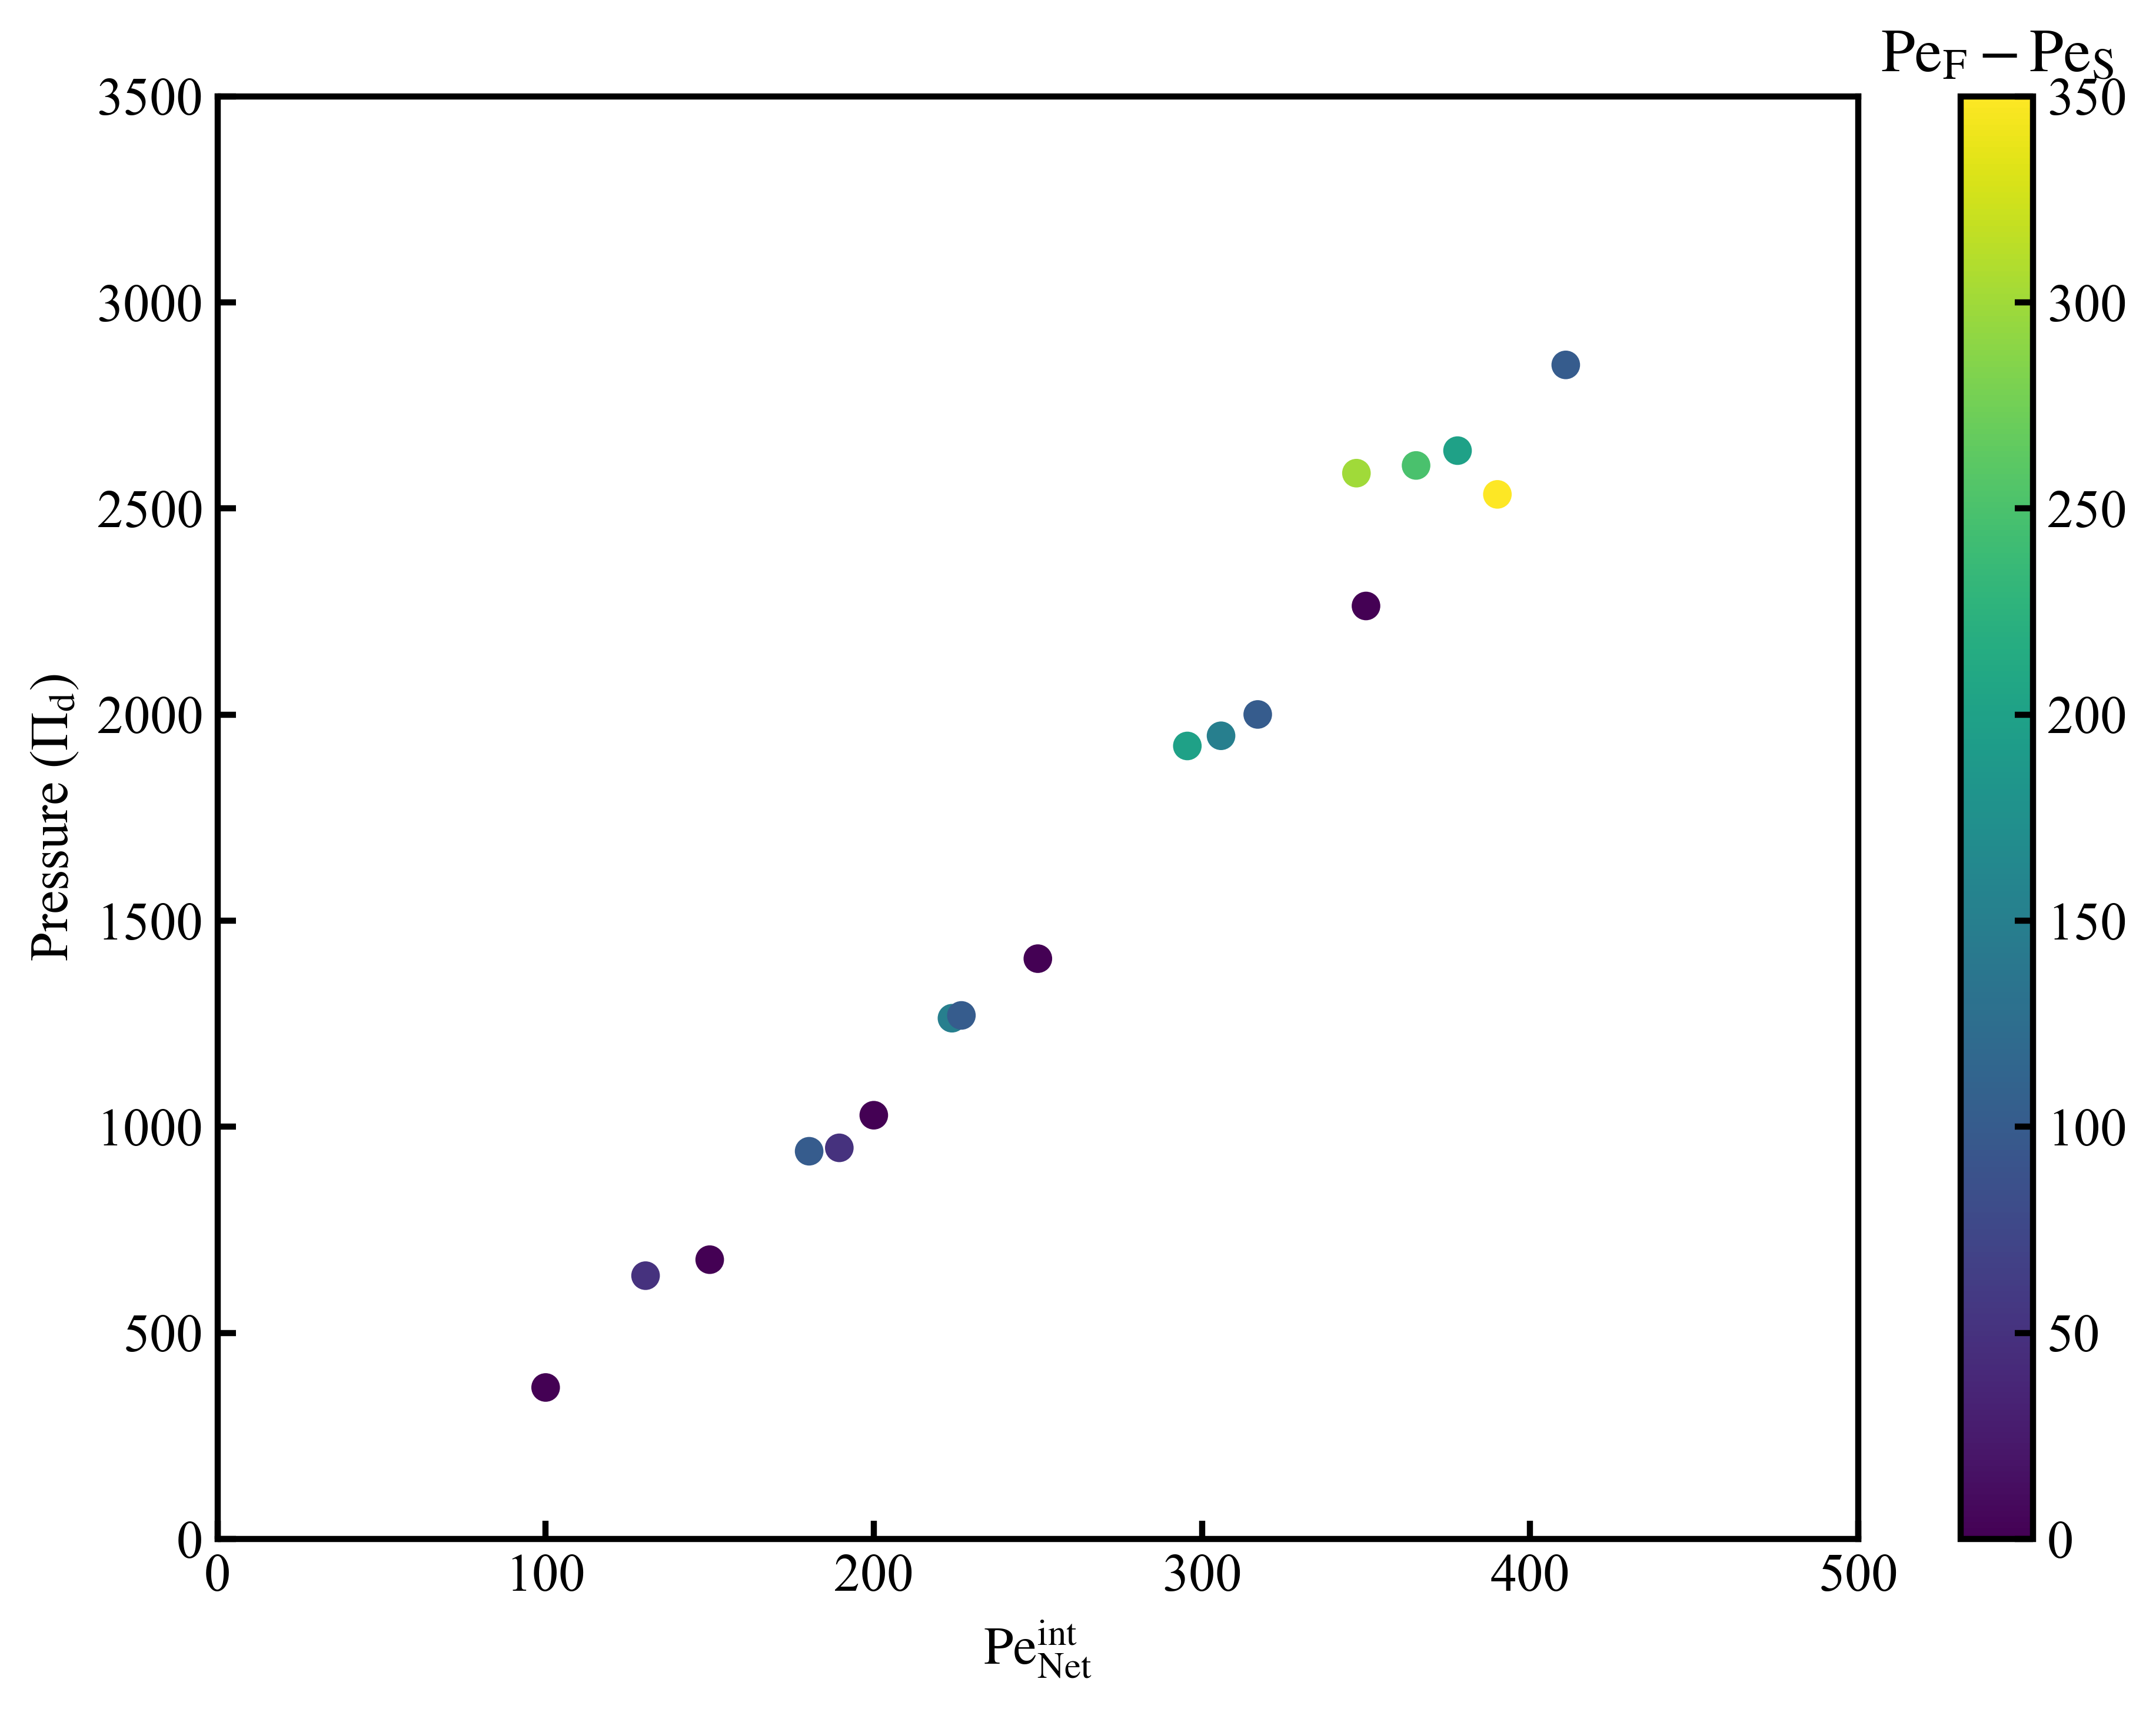

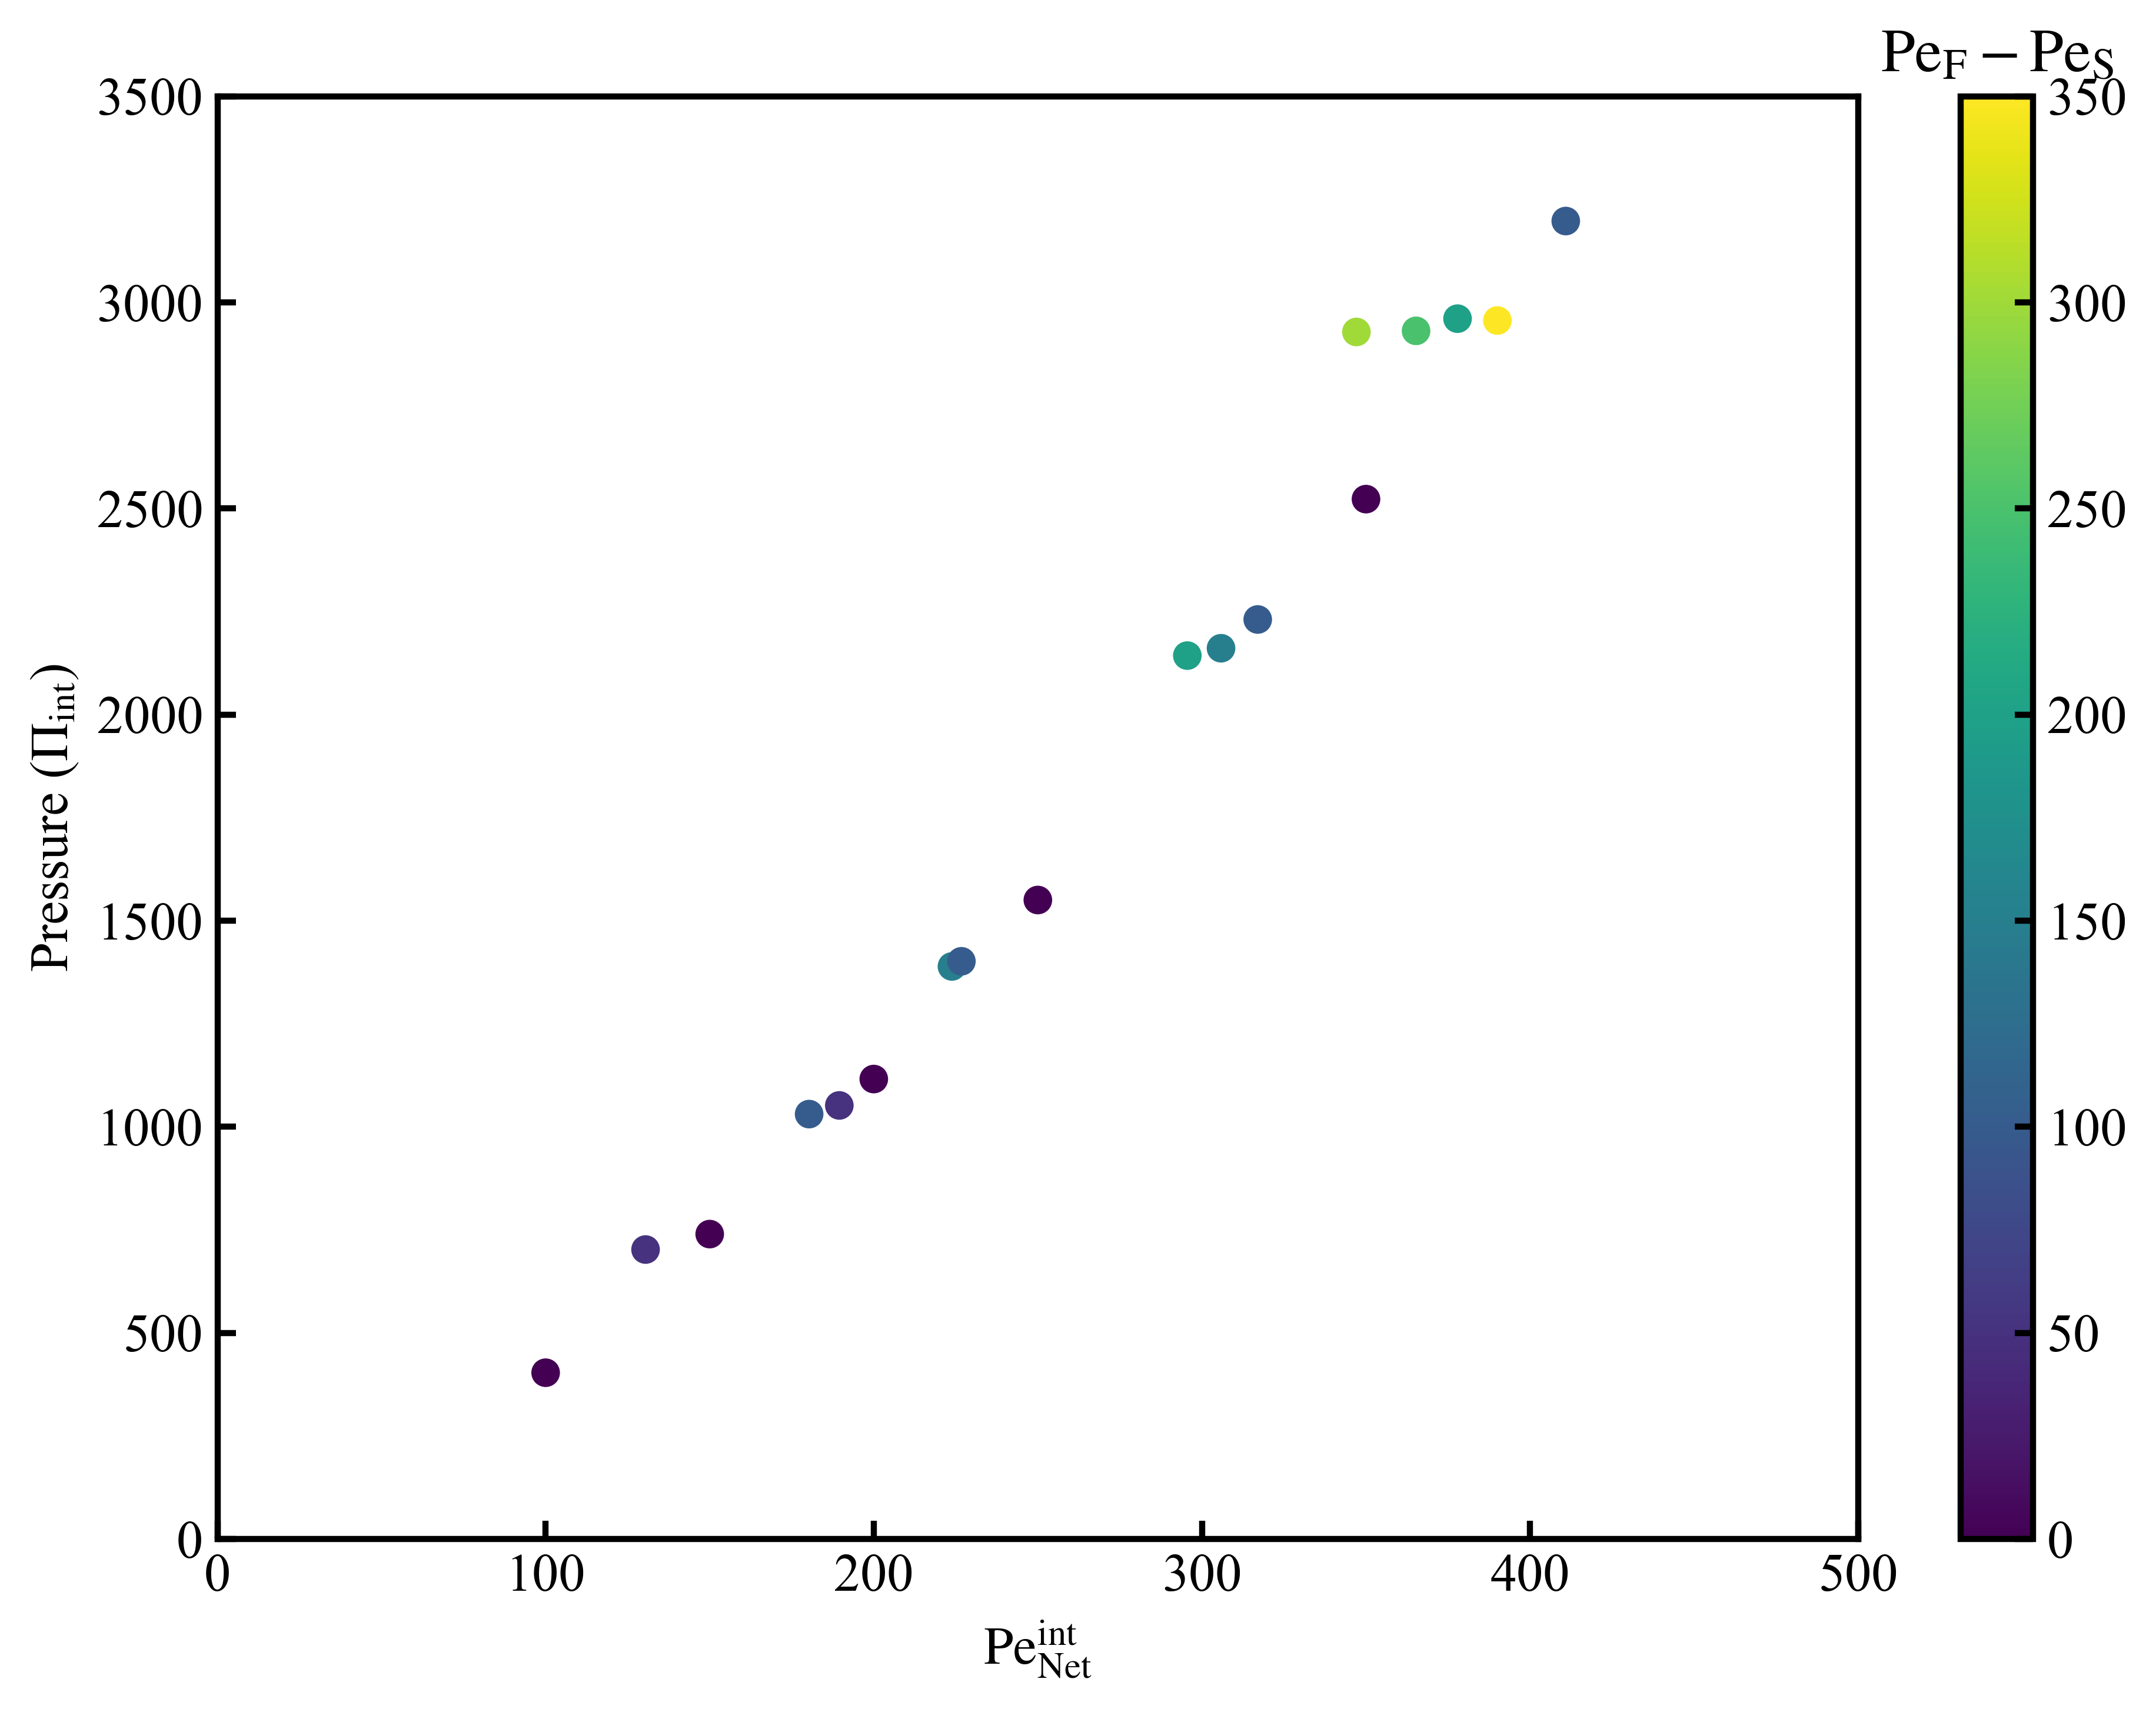

TypeError: 'AxesSubplot' object is not subscriptable

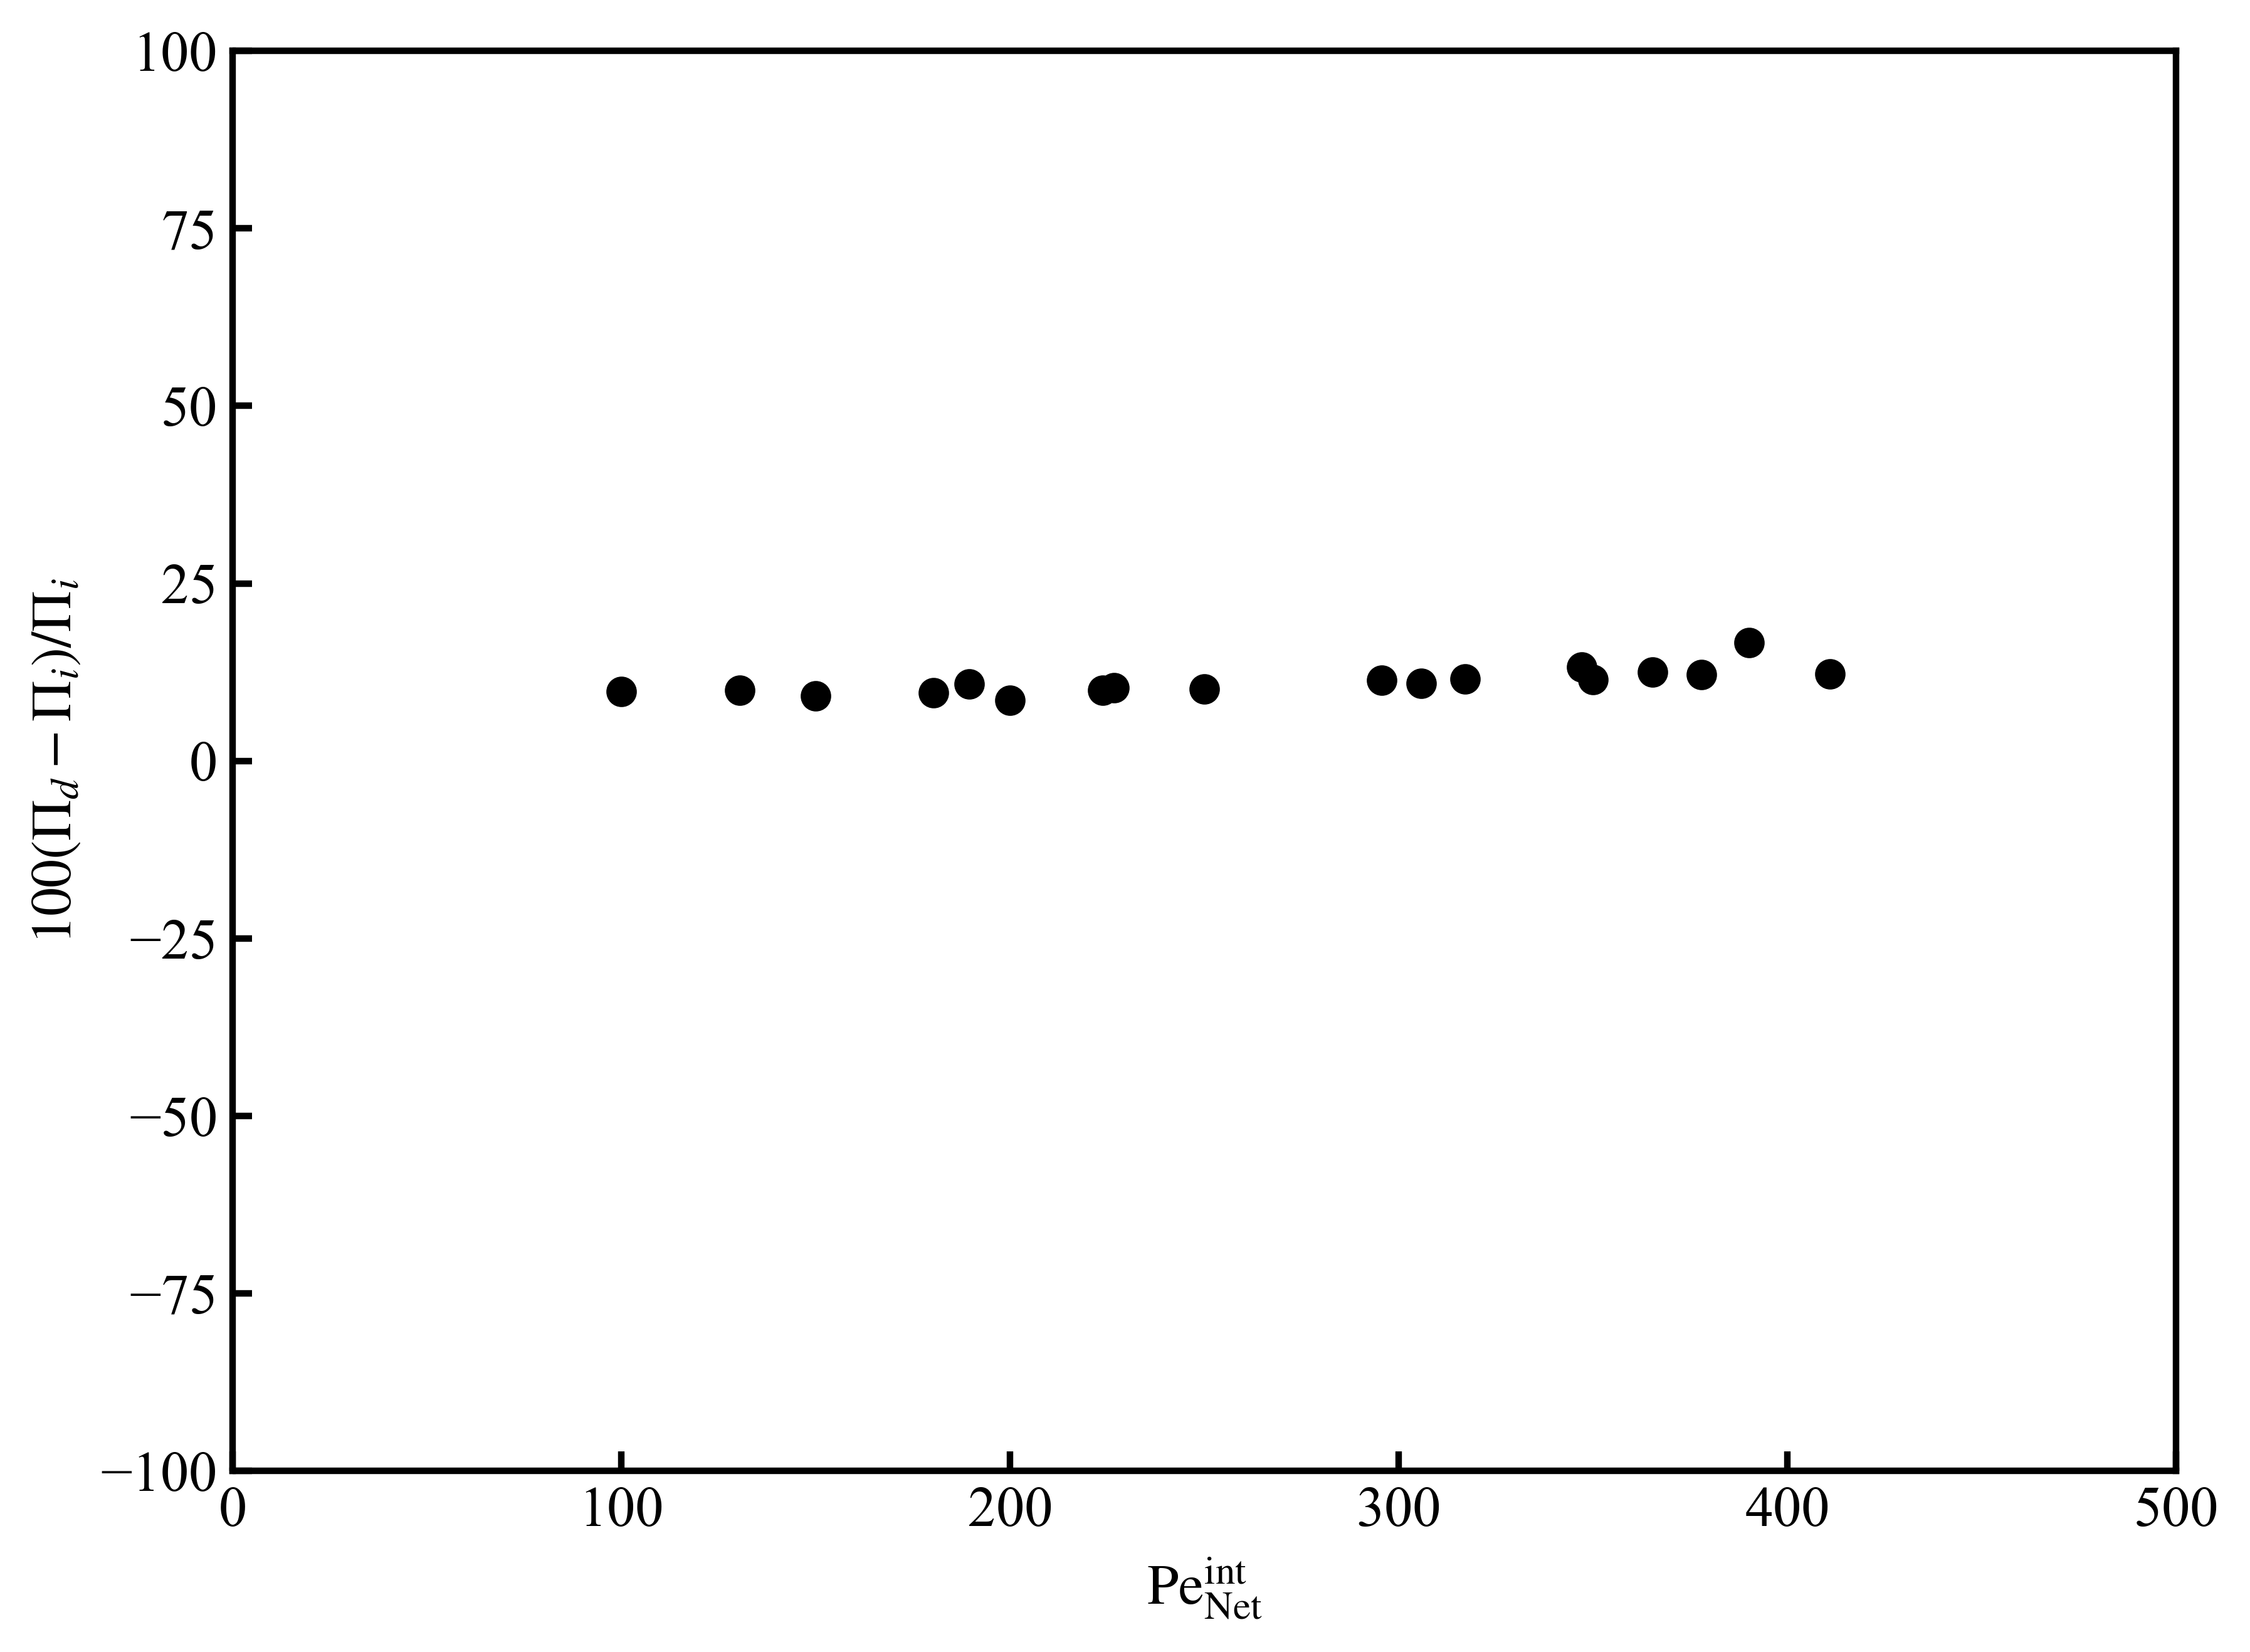

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(interpart_peNet, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(align_peNet, align_press_arr, c='red', label='aligned interface')
plt.scatter(interpart_peNet, avg_int_theory_arr, c='yellow', label='theory int')
plt.scatter(interpart_peNet, avg_bulk_theory_arr, c='green', label='theory bulk')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(int_pe_net, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(int_pe_net, align_press_arr, c='red', label='aligned interface')
plt.scatter(int_pe_net, avg_int_theory_arr, c='yellow', label='theory int')
plt.scatter(int_pe_net, avg_bulk_theory_arr, c='green', label='theory bulk')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

import matplotlib
fig = plt.figure(figsize=(8,6))
im = plt.scatter(int_pe_net, interpart_press, c=pe_dif_arr, cmap='viridis', vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
norm= matplotlib.colors.Normalize(vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))

sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
sm.set_array([])
clb = fig.colorbar(sm)#ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ax=ax2)

clb.ax.set_title(r'$\mathrm{Pe}_\mathrm{F}-\mathrm{Pe}_\mathrm{S}$', fontsize=15)
plt.xlim(0, 500)
plt.ylim(0, 3500)
plt.ylabel(r'Pressure ($\Pi_\mathrm{d}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
im = plt.scatter(int_pe_net, align_press_arr, c=pe_dif_arr, cmap='viridis', vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
norm= matplotlib.colors.Normalize(vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
sm.set_array([])
clb = fig.colorbar(sm)#ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ax=ax2)

clb.ax.set_title(r'$\mathrm{Pe}_\mathrm{F}-\mathrm{Pe}_\mathrm{S}$', fontsize=15)
            
plt.xlim(0, 500)
plt.ylim(0, 3500)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'Pressure ($\Pi_\mathrm{int}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
im = plt.scatter(int_pe_net, ((align_press_arr-interpart_press)/interpart_press)*100, c='black')
 
plt.xlim(0, 500)
plt.ylim(-100, 100)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'$100(\Pi_d - \Pi_i)/\Pi_i$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')

# Make a simulation vs theory legend
leg_three = [Line2D([0], [0], lw=med*1.8, c='k', markeredgecolor='none', label=r'Eq. 6', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=med*1.8, c='k', markeredgecolor='none', label=r'Eq. 7', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax[0].legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax[0].transAxes, bbox_to_anchor=[1.0, 1.03],
             fontsize=fsize*3.2, frameon=False, ncol=1)
ax[0].add_artist(two_leg)

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.scatter(int_pe_net, ((interpart_press-avg_bulk_theory_arr)/avg_bulk_theory_arr)*100, c=green, label='bulk')
plt.scatter(int_pe_net, ((align_press_arr-avg_int_theory_arr)/avg_int_theory_arr)*100, c=yellow, label='interface')

plt.xlim(0, 500)
plt.ylim(-100, 100)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'$100(\Pi_\mathrm{sim} - \Pi_\mathrm{theory})/\Pi_\mathrm{theory}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()